In [1]:
import os.path as osp
import trimesh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn
import torch.nn.functional as F

In [4]:
from tensorboardX import SummaryWriter
from backend import double_pool
from utils_eval import compute_precision, plot_nearest_neighbours

os.environ mode is TOUCH_EMB
eval_forward_touch
  touch_embed
    do_touch_embed = True
  9_iters
    max_iters = 9
  forward_prediction_test
    dataset_name = "touch_data"
    H = 128
    W = 128
    valset = "close_up_touch_and_visual"
    dataset_location = "/home/gauravp/train_files"
    dataset_list_dir = "/home/gauravp/train_files"
    dataset_format = "txt"
  frozen_feat
    do_feat = True
    feat_dim = 32
    do_freeze_feat = True
    feat_init = "04_m64x64x64_p64x64_1e-3_F32_Oc_c1_s1_Ve_d32_c1_mocml_nns2048_nps1024_dl100000_md8_close_up_visual"
    reset_iter = True
  B1
    B = 1
  frozen_forward
    do_touch_feat = True
    do_touch_forward = True
    contextH = 0.1
    contextW = 0.1
    contextD = 0.1
    do_freeze_touch_feat = True
    do_freeze_touch_forward = True
    touch_feat_init = "02_m64x64x64_1e-5_F32f_TF32_tforward_ch.1_cw.1_cd.1_mocml_nns8192_nps1024_dl8192_md4_close_up_touch_and_visualev_re1"
    touch_forward_init = "02_m64x64x64_1e-5_F32f_TF32_tforward_ch.

In [5]:
import hyperparams as hyp

In [7]:
import os
from backend import saverloader, inputs

## Define the network should be same as one used for training

1. For that make sure that the hyperparams are the same

In [8]:
from model_base import Model
from model_touch_embed import TOUCH_EMBED

## Create the model

In [9]:
assert hyp.do_touch_embed
checkpoint_dir = None
log_dir = os.path.join('logs_touch_embed', hyp.name+"_evaluation")
print(log_dir)
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

logs_touch_embed/01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation_evaluation


In [10]:
model = TOUCH_EMBED(checkpoint_dir=checkpoint_dir, log_dir=log_dir)

------ CREATING NEW MODEL ------
01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation
----  I am loading touch embed data ----
Done loading for object is 43e1cabc5dd2fa91fffc97a61124b1a9
Done loading for object is d38295b8d83e8cdec712af445786fe
Done loading for object is ec846432f3ebedf0a6f32a8797e3b9e9
Done loading for object is e6dedae946ff5265a95fb60c110b25aa
Done loading for object is 6661c0b9b9b8450c4ee002d643e7b29e
Done loading for object is 6e884701bfddd1f71e1138649f4c219
Done loading for object is b46e89995f4f9cc5161e440f04bd2a2
Done loading for object is 83827973c79ca7631c9ec1e03e401f54
Done loading for object is 414772162ef70ec29109ad7f9c200d62


In [11]:
# get inputs is called and hence the hyp.emb_3D_num_samples and hyp.sensor_S should be changed here
print(hyp.sensor_S)
print(hyp.emb_3D_num_samples)

200
200


## Testing Procedure:
1. Create the model
2. Load correct weights into the model
3. do the forward pass and collect the results.
4. with the results do eval recall

#### NOTE: this is just the go method of the model but with some twists

## Implementation of the forward pass method, I call the go method here and I will get the model.big_results_list containing the dict of results for both the object on which I will do the eval recall thing

--- Building inference graph ---
using the visual feat net to generate visual feature tensor
down dims:  [64, 128, 256]
up dims:  [256, 128]
using 2d backbone network to generate features from sensor depth image
using context net to turn 3d context grid into 1d feature tensor
freezing visual features
freezing backbone_2D
freezing context net
Instantiating MOC net
------ Start loading weights -----
reading featnet checkpoint...
checkpoints/04_m64x64x64_p64x64_1e-3_F32_Oc_c1_s1_Ve_d32_c1_mocml_nns2048_nps1024_dl100000_md8_close_up_visual
...found checkpoint checkpoints/04_m64x64x64_p64x64_1e-3_F32_Oc_c1_s1_Ve_d32_c1_mocml_nns2048_nps1024_dl100000_md8_close_up_visual/model-20000.pth
copying weights for net.conv3d.0.0.weight
copying weights for net.conv3d.0.0.bias
copying weights for net.conv3d.1.0.weight
copying weights for net.conv3d.1.0.bias
copying weights for net.conv3d.2.0.weight
copying weights for net.conv3d.2.0.bias
copying weights for net.final_feature.weight
copying weights for 

/home/gauravp/pytorch_disco/utils_vox.py:140: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1
t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp7icrm5xv.gif with imageio.
MoviePy - Building file /tmp/tmpzhy48ywb.gif with imageio.
MoviePy - Building file /tmp/tmpdob1dhd0.gif with imageio.


MoviePy - Building file /tmp/tmp8cxm7ytl.gif with imageio.


MoviePy - Building file /tmp/tmp98xenzn9.gif with imageio.
MoviePy - Building file /tmp/tmp3o3rhxji.gif with imageio.
MoviePy - Building file /tmp/tmp43tbw1wr.gif with imageio.
MoviePy - Building file /tmp/tmpdueib_90.gif with imageio.
MoviePy - Building file /tmp/tmpzp6cv5zn.gif with imageio.


MoviePy - Building file /tmp/tmpr4tze2wp.gif with imageio.
MoviePy - Building file /tmp/tmpr1whtxlp.gif with imageio.
MoviePy - Building file /tmp/tmpzsn0vzve.gif with imageio.
MoviePy - Building file /tmp/tmpn8tzw0sj.gif with imageio.


MoviePy - Building file /tmp/tmpo7j7z3o9.gif with imageio.
MoviePy - Building file /tmp/tmpsve54v6h.gif with imageio.
MoviePy - Building file /tmp/tmp1krb_i6b.gif with imageio.
MoviePy - Building file /tmp/tmpp5p16dwa.gif with imageio.
01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   1/   9]; ttime: 27 (0.42, 10.99); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 3551


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmpt2egt0c8.gif with imageio.


MoviePy - Building file /tmp/tmpeb7e2stv.gif with imageio.
MoviePy - Building file /tmp/tmpuwkrfapb.gif with imageio.


MoviePy - Building file /tmp/tmpf0rrzrba.gif with imageio.
MoviePy - Building file /tmp/tmpald0hebd.gif with imageio.


MoviePy - Building file /tmp/tmp7ecxggry.gif with imageio.
MoviePy - Building file /tmp/tmp6mseya7z.gif with imageio.
MoviePy - Building file /tmp/tmpyfk2wv8u.gif with imageio.
MoviePy - Building file /tmp/tmpezfa4m4_.gif with imageio.


MoviePy - Building file /tmp/tmpz_emj9m4.gif with imageio.
MoviePy - Building file /tmp/tmph_z433i2.gif with imageio.
MoviePy - Building file /tmp/tmp15zium7b.gif with imageio.
MoviePy - Building file /tmp/tmpmdkjkp1o.gif with imageio.


MoviePy - Building file /tmp/tmpztcnrt3e.gif with imageio.
MoviePy - Building file /tmp/tmp_26td4mw.gif with imageio.
MoviePy - Building file /tmp/tmpg6risd5a.gif with imageio.
MoviePy - Building file /tmp/tmp70nbzbsj.gif with imageio.
01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   2/   9]; ttime: 38 (0.31, 11.41); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 4955


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmp7twmytoz.gif with imageio.


MoviePy - Building file /tmp/tmpa7m4fcto.gif with imageio.
MoviePy - Building file /tmp/tmpem1unvhm.gif with imageio.


MoviePy - Building file /tmp/tmpvmxgnjj1.gif with imageio.
MoviePy - Building file /tmp/tmpvuje81kj.gif with imageio.


t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp3c7wocem.gif with imageio.
MoviePy - Building file /tmp/tmpehzs3aye.gif with imageio.
MoviePy - Building file /tmp/tmpoptcdmq2.gif with imageio.
MoviePy - Building file /tmp/tmp177605zj.gif with imageio.
MoviePy - Building file /tmp/tmpc4gfhof6.gif with imageio.
MoviePy - Building file /tmp/tmptphgsijb.gif with imageio.
MoviePy - Building file /tmp/tmpihlojbyj.gif with imageio.


MoviePy - Building file /tmp/tmpv34ywuwz.gif with imageio.
MoviePy - Building file /tmp/tmpo1hhpd3m.gif with imageio.
MoviePy - Building file /tmp/tmpw9e2sury.gif with imageio.
MoviePy - Building file /tmp/tmpk4e4i_xq.gif with imageio.
MoviePy - Building file /tmp/tmp48jhbap1.gif with imageio.
01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   3/   9]; ttime: 49 (0.33, 10.61); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 2472


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmpmm9a__5z.gif with imageio.


MoviePy - Building file /tmp/tmpkefrvhn5.gif with imageio.
MoviePy - Building file /tmp/tmp65k_9f5z.gif with imageio.


MoviePy - Building file /tmp/tmpaibp7br5.gif with imageio.
MoviePy - Building file /tmp/tmpjnwscjri.gif with imageio.
MoviePy - Building file /tmp/tmptfj4yniu.gif with imageio.
MoviePy - Building file /tmp/tmpym7q5q6r.gif with imageio.


t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp5akc5iea.gif with imageio.
MoviePy - Building file /tmp/tmpw3r260pt.gif with imageio.
MoviePy - Building file /tmp/tmpvwg2r9mt.gif with imageio.
MoviePy - Building file /tmp/tmp2rcl_bbz.gif with imageio.
MoviePy - Building file /tmp/tmpxf_7h64m.gif with imageio.
MoviePy - Building file /tmp/tmppb5wjkt3.gif with imageio.


MoviePy - Building file /tmp/tmptasftktp.gif with imageio.
MoviePy - Building file /tmp/tmpl1itk7x0.gif with imageio.
MoviePy - Building file /tmp/tmpfivz8iqj.gif with imageio.
MoviePy - Building file /tmp/tmpfwuvhuds.gif with imageio.
01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   4/   9]; ttime: 61 (0.32, 10.96); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 4525


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmp9rfqzi7o.gif with imageio.


t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp7ccxxb89.gif with imageio.
MoviePy - Building file /tmp/tmpscv07x31.gif with imageio.
MoviePy - Building file /tmp/tmpp8m7ivgx.gif with imageio.


MoviePy - Building file /tmp/tmph3a04e98.gif with imageio.
MoviePy - Building file /tmp/tmprj1_8kje.gif with imageio.
MoviePy - Building file /tmp/tmpfcxt6070.gif with imageio.
MoviePy - Building file /tmp/tmpc4o5kb8j.gif with imageio.
MoviePy - Building file /tmp/tmpuhe1vdh1.gif with imageio.
MoviePy - Building file /tmp/tmpsntwmq2z.gif with imageio.


t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmpqn186srg.gif with imageio.
MoviePy - Building file /tmp/tmpx1hkge8e.gif with imageio.
MoviePy - Building file /tmp/tmp86g13jdo.gif with imageio.
MoviePy - Building file /tmp/tmp0magzkfb.gif with imageio.
MoviePy - Building file /tmp/tmpxiz1ugpi.gif with imageio.


MoviePy - Building file /tmp/tmpwutxicn9.gif with imageio.
MoviePy - Building file /tmp/tmpgv1o89u2.gif with imageio.
01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   5/   9]; ttime: 72 (0.32, 11.26); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 5628


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmpadj2n_20.gif with imageio.


MoviePy - Building file /tmp/tmpy2obux43.gif with imageio.
MoviePy - Building file /tmp/tmpe08l5ay7.gif with imageio.


MoviePy - Building file /tmp/tmp4oljr8nw.gif with imageio.
MoviePy - Building file /tmp/tmpfmc7hwq7.gif with imageio.


MoviePy - Building file /tmp/tmpp99a9anl.gif with imageio.
MoviePy - Building file /tmp/tmpwnn77a66.gif with imageio.
MoviePy - Building file /tmp/tmpmwwms7ub.gif with imageio.
MoviePy - Building file /tmp/tmppghw5cev.gif with imageio.
MoviePy - Building file /tmp/tmpnwc4odm4.gif with imageio.
MoviePy - Building file /tmp/tmp9lmv5pnn.gif with imageio.


MoviePy - Building file /tmp/tmpev8eoltx.gif with imageio.
MoviePy - Building file /tmp/tmpwtlcd44i.gif with imageio.
MoviePy - Building file /tmp/tmpjuylajxq.gif with imageio.
MoviePy - Building file /tmp/tmpkn3v19hb.gif with imageio.
MoviePy - Building file /tmp/tmpk1plrmjw.gif with imageio.
MoviePy - Building file /tmp/tmp5b1_z5t_.gif with imageio.


01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   6/   9]; ttime: 84 (0.33, 11.63); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 5452


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmpps7biw2c.gif with imageio.


MoviePy - Building file /tmp/tmp14yanom8.gif with imageio.
MoviePy - Building file /tmp/tmpcsipjr55.gif with imageio.


t:   0%|          | 0/1 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp1lrk9awd.gif with imageio.
MoviePy - Building file /tmp/tmpuzi96088.gif with imageio.
MoviePy - Building file /tmp/tmpe7wfwqax.gif with imageio.
MoviePy - Building file /tmp/tmphsc30nku.gif with imageio.


MoviePy - Building file /tmp/tmpxetcw4qw.gif with imageio.
MoviePy - Building file /tmp/tmp69m9pbxn.gif with imageio.
MoviePy - Building file /tmp/tmpoh6_rc9c.gif with imageio.
MoviePy - Building file /tmp/tmpwpc7w3q_.gif with imageio.
MoviePy - Building file /tmp/tmpsjj_8y2y.gif with imageio.


MoviePy - Building file /tmp/tmpmg8ksx06.gif with imageio.
MoviePy - Building file /tmp/tmpyuyfgfpw.gif with imageio.
MoviePy - Building file /tmp/tmpughcalny.gif with imageio.
MoviePy - Building file /tmp/tmpj8wgfzkq.gif with imageio.
MoviePy - Building file /tmp/tmpyhezkawb.gif with imageio.


  max_open_warning, RuntimeWarning)



01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   7/   9]; ttime: 96 (0.34, 11.90); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 4860


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmp_9pogczd.gif with imageio.


t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp8ej_aygz.gif with imageio.
MoviePy - Building file /tmp/tmps25478iz.gif with imageio.
MoviePy - Building file /tmp/tmpg4mu9u8_.gif with imageio.


MoviePy - Building file /tmp/tmp5kiukv4q.gif with imageio.
MoviePy - Building file /tmp/tmpc5shpnng.gif with imageio.
MoviePy - Building file /tmp/tmpk5mpm8mw.gif with imageio.
MoviePy - Building file /tmp/tmpaofc012q.gif with imageio.
MoviePy - Building file /tmp/tmpkey71ugm.gif with imageio.
MoviePy - Building file /tmp/tmpiexmbalc.gif with imageio.


t:   0%|          | 0/5 [00:00<?, ?it/s, now=None]

MoviePy - Building file /tmp/tmp074x82r6.gif with imageio.
MoviePy - Building file /tmp/tmp4gj655bj.gif with imageio.
MoviePy - Building file /tmp/tmpeivucekh.gif with imageio.
MoviePy - Building file /tmp/tmpsy1945bl.gif with imageio.


MoviePy - Building file /tmp/tmp5fo0_8yd.gif with imageio.
MoviePy - Building file /tmp/tmpd4tdh_dv.gif with imageio.
MoviePy - Building file /tmp/tmplukuxm9_.gif with imageio.


  max_open_warning, RuntimeWarning)



01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   8/   9]; ttime: 107 (0.32, 10.29); loss: 0.000 (val)
val: set_num 1; log_this 1; set_do_backprop 0; 
Length visual cameras = 51
Number of touch locations = 3551


  base = torch.range(0, B-1, dtype=torch.int32, device=torch.device('cuda'))*dim1

                                                  

do_moc = False	 do_touch_embed = True	                            moco_init_flag = True
MoviePy - Building file /tmp/tmpmagjad9_.gif with imageio.


MoviePy - Building file /tmp/tmp1ui8oqdg.gif with imageio.
MoviePy - Building file /tmp/tmpiru5cmtt.gif with imageio.
MoviePy - Building file /tmp/tmp3cchd32s.gif with imageio.


MoviePy - Building file /tmp/tmpywdyseiu.gif with imageio.
MoviePy - Building file /tmp/tmp7gicbc36.gif with imageio.
MoviePy - Building file /tmp/tmpopn9i_4z.gif with imageio.
MoviePy - Building file /tmp/tmpwc6_ksdb.gif with imageio.
MoviePy - Building file /tmp/tmpfyi1g6ji.gif with imageio.
MoviePy - Building file /tmp/tmphea0kpas.gif with imageio.


MoviePy - Building file /tmp/tmpa5ixehp0.gif with imageio.
MoviePy - Building file /tmp/tmpdakj6y19.gif with imageio.
MoviePy - Building file /tmp/tmp1ydsf8g_.gif with imageio.


MoviePy - Building file /tmp/tmp9njhyeej.gif with imageio.
MoviePy - Building file /tmp/tmpdbpyu94f.gif with imageio.
MoviePy - Building file /tmp/tmp5sodfnqm.gif with imageio.
MoviePy - Building file /tmp/tmpfaejqphg.gif with imageio.


  max_open_warning, RuntimeWarning)



01_m64x64x64_F32f_TF32_tforward_ch.1_cw.1_cd.1_close_up_touch_and_visual_ev_re1_evaluation; [   9/   9]; ttime: 120 (0.33, 12.84); loss: 0.000 (val)


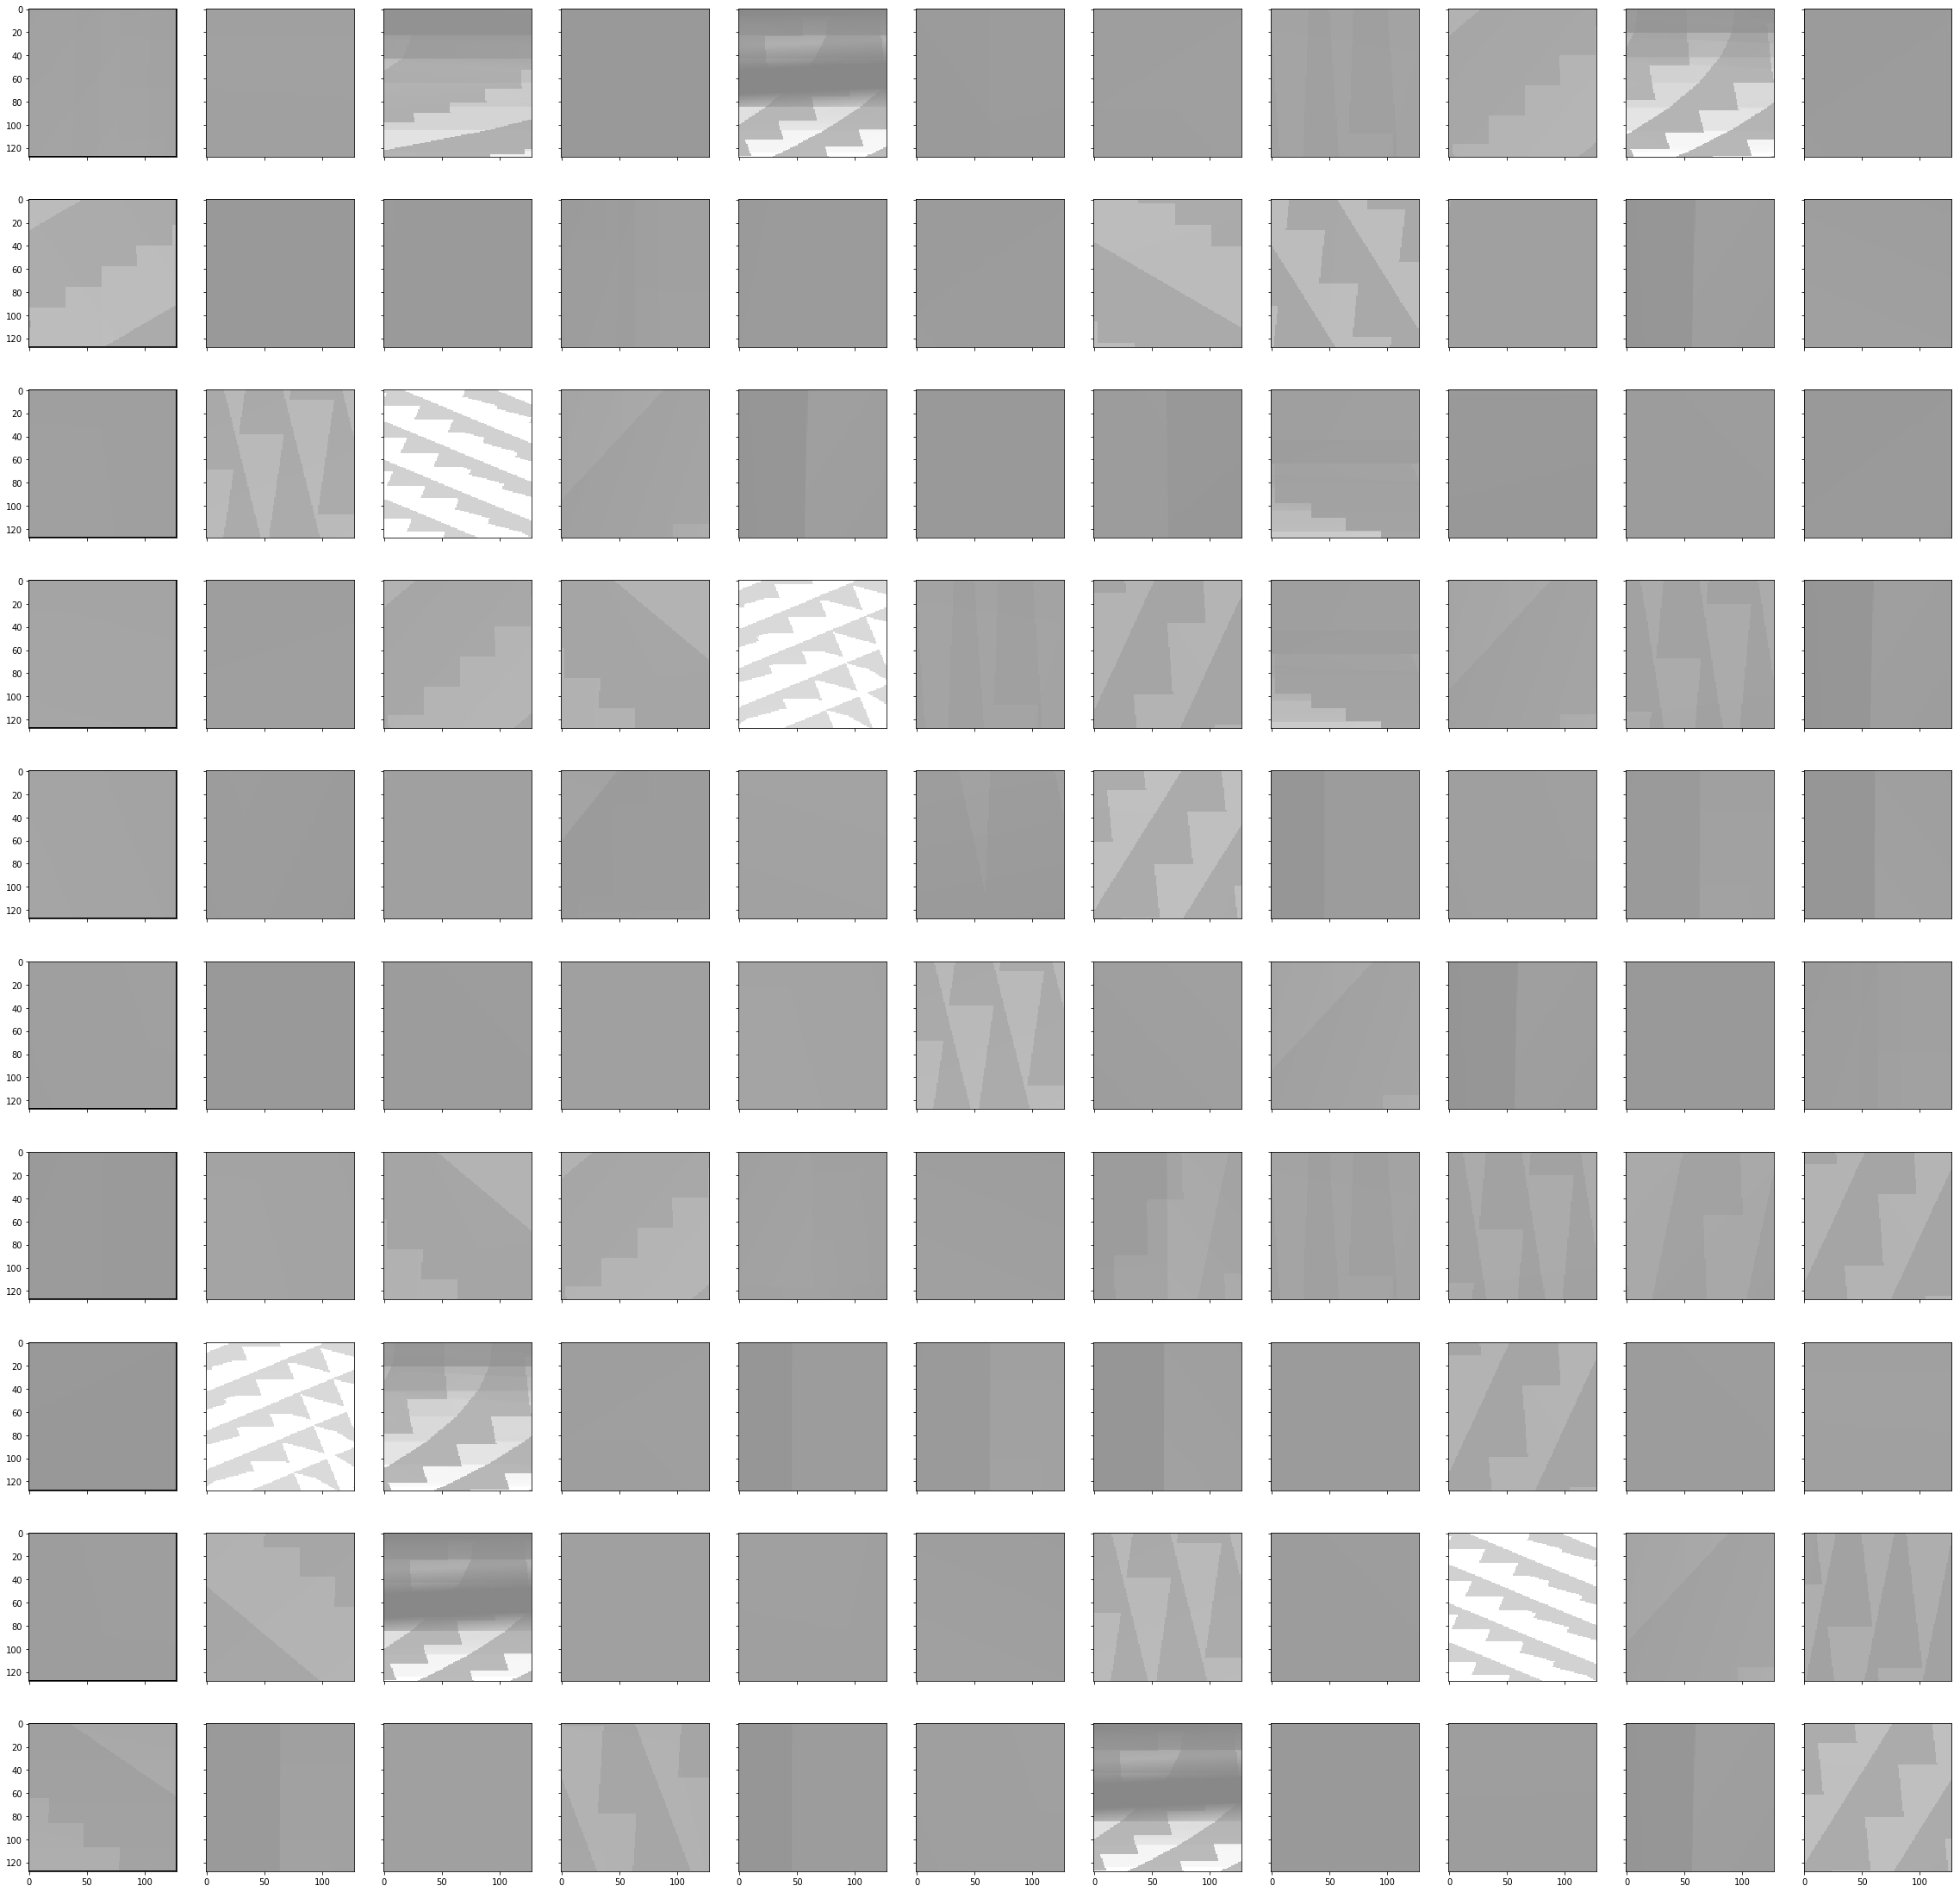

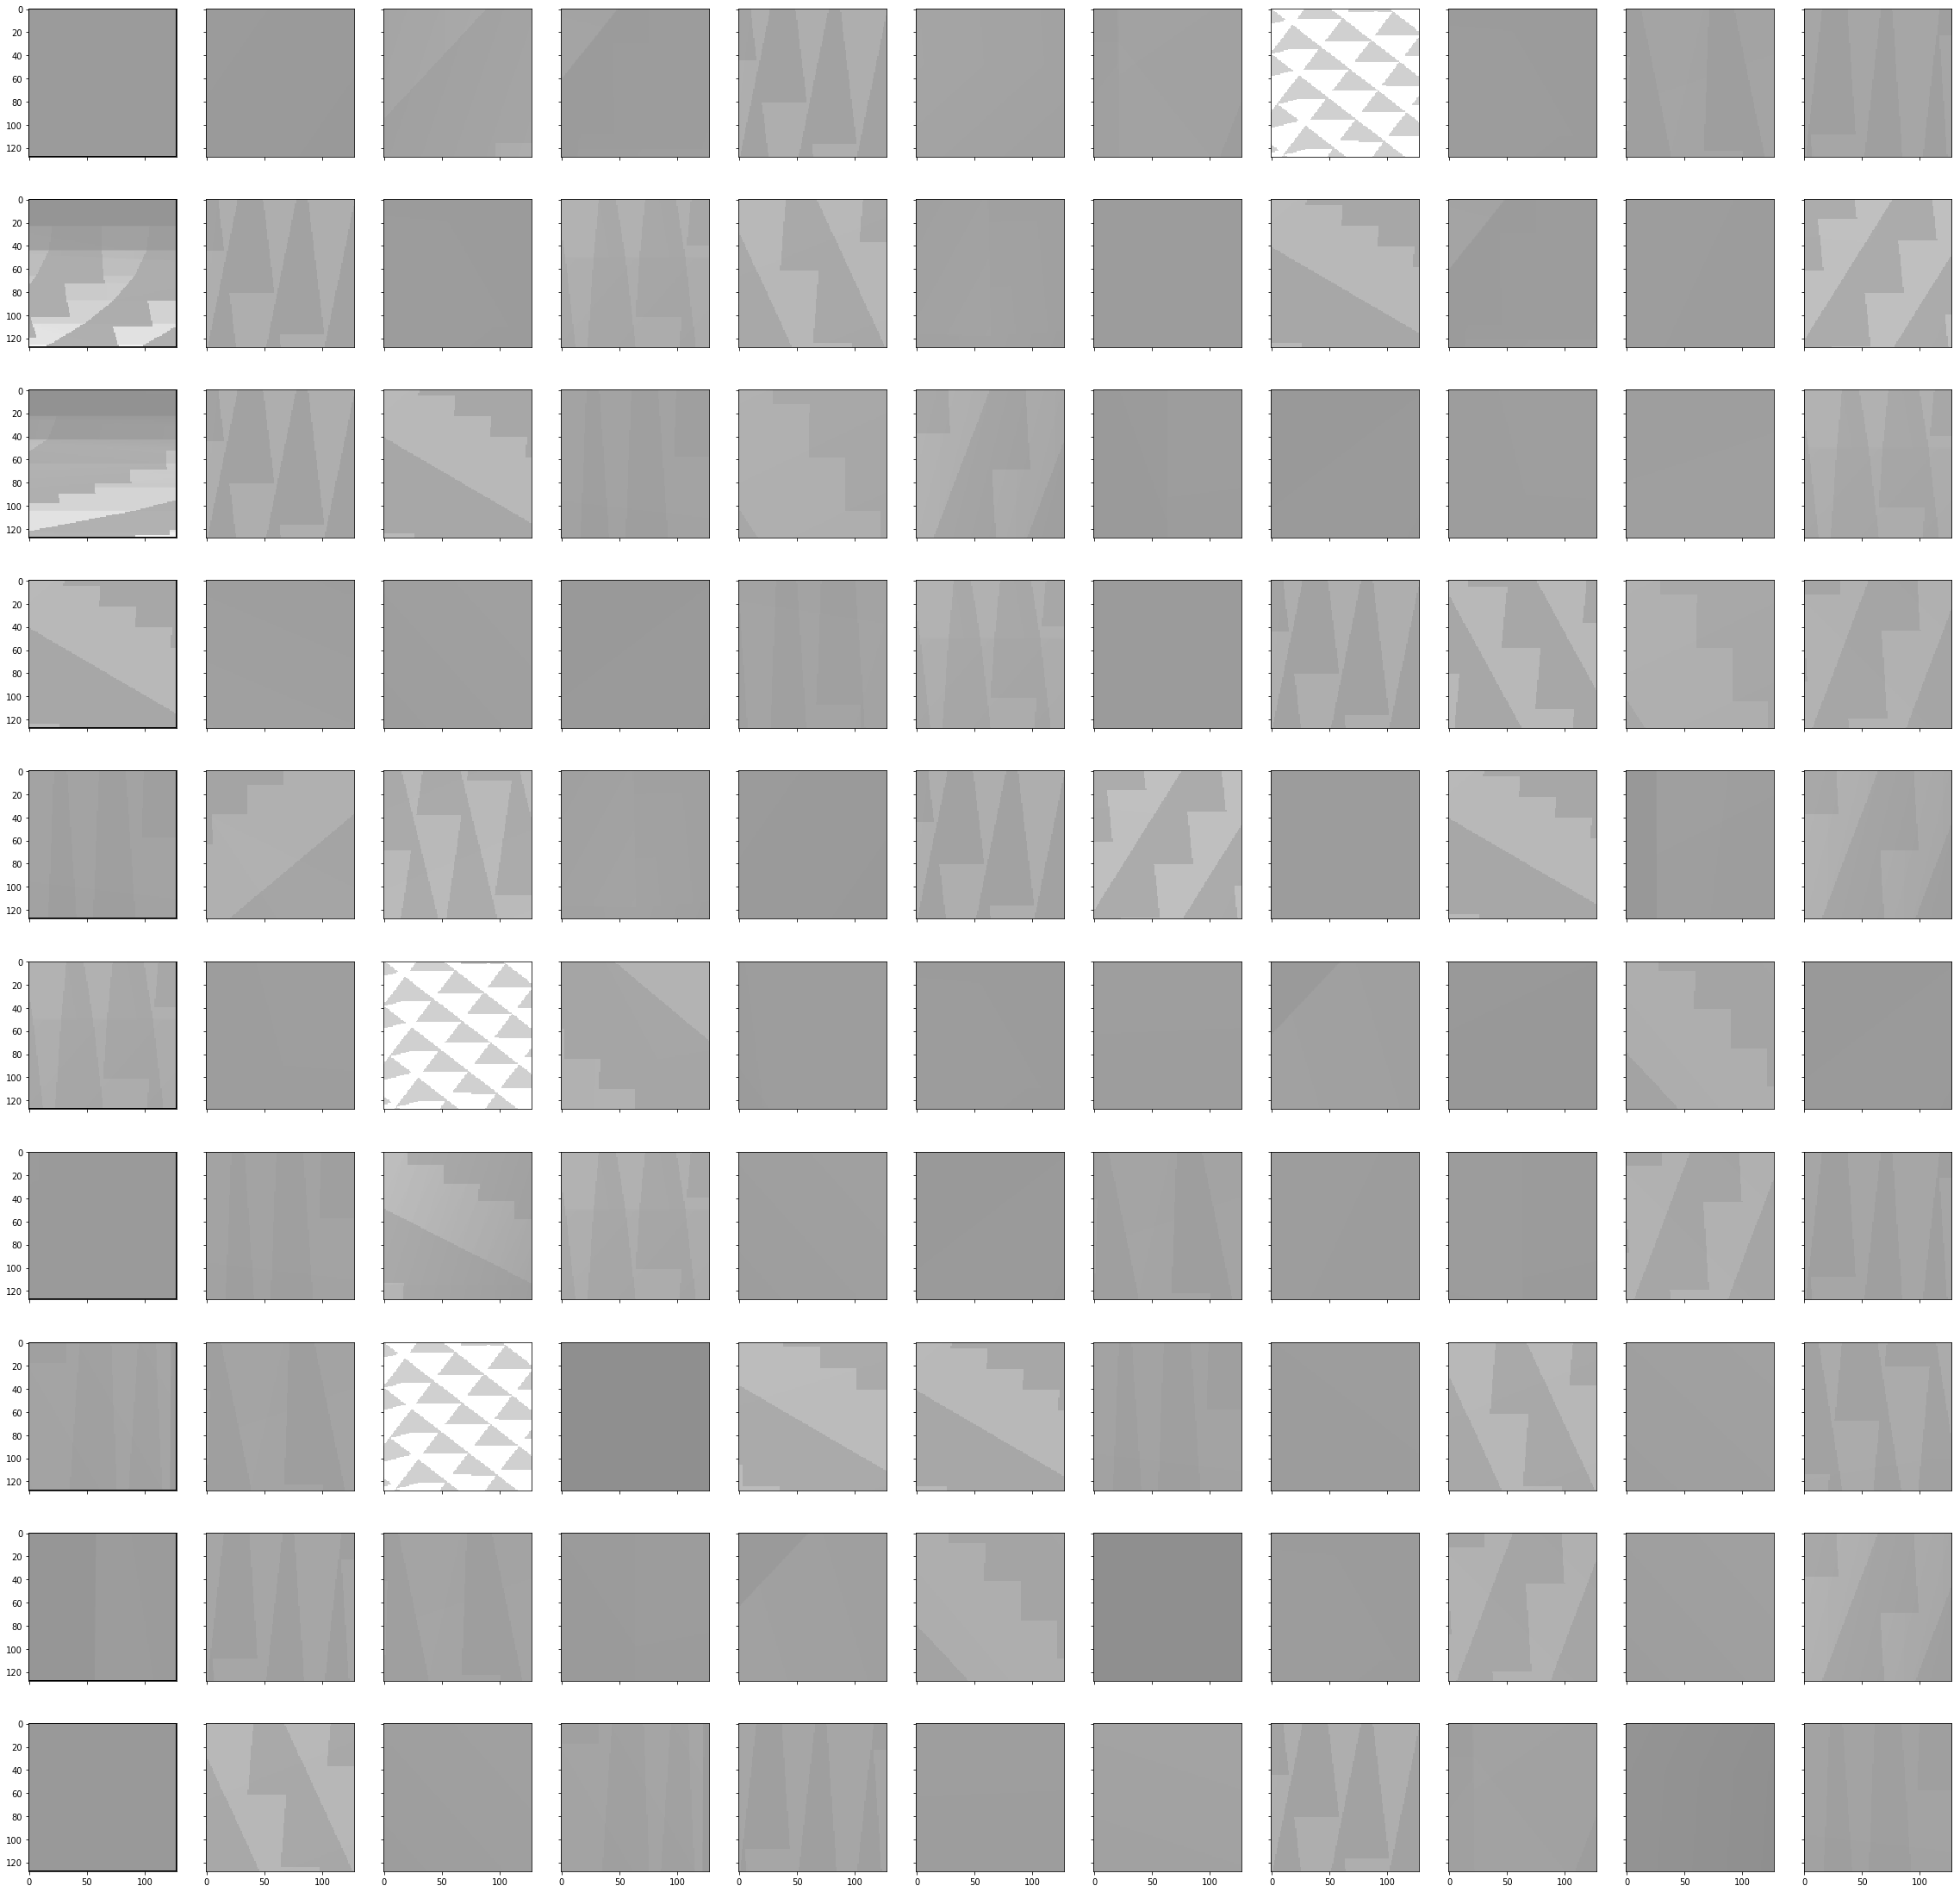

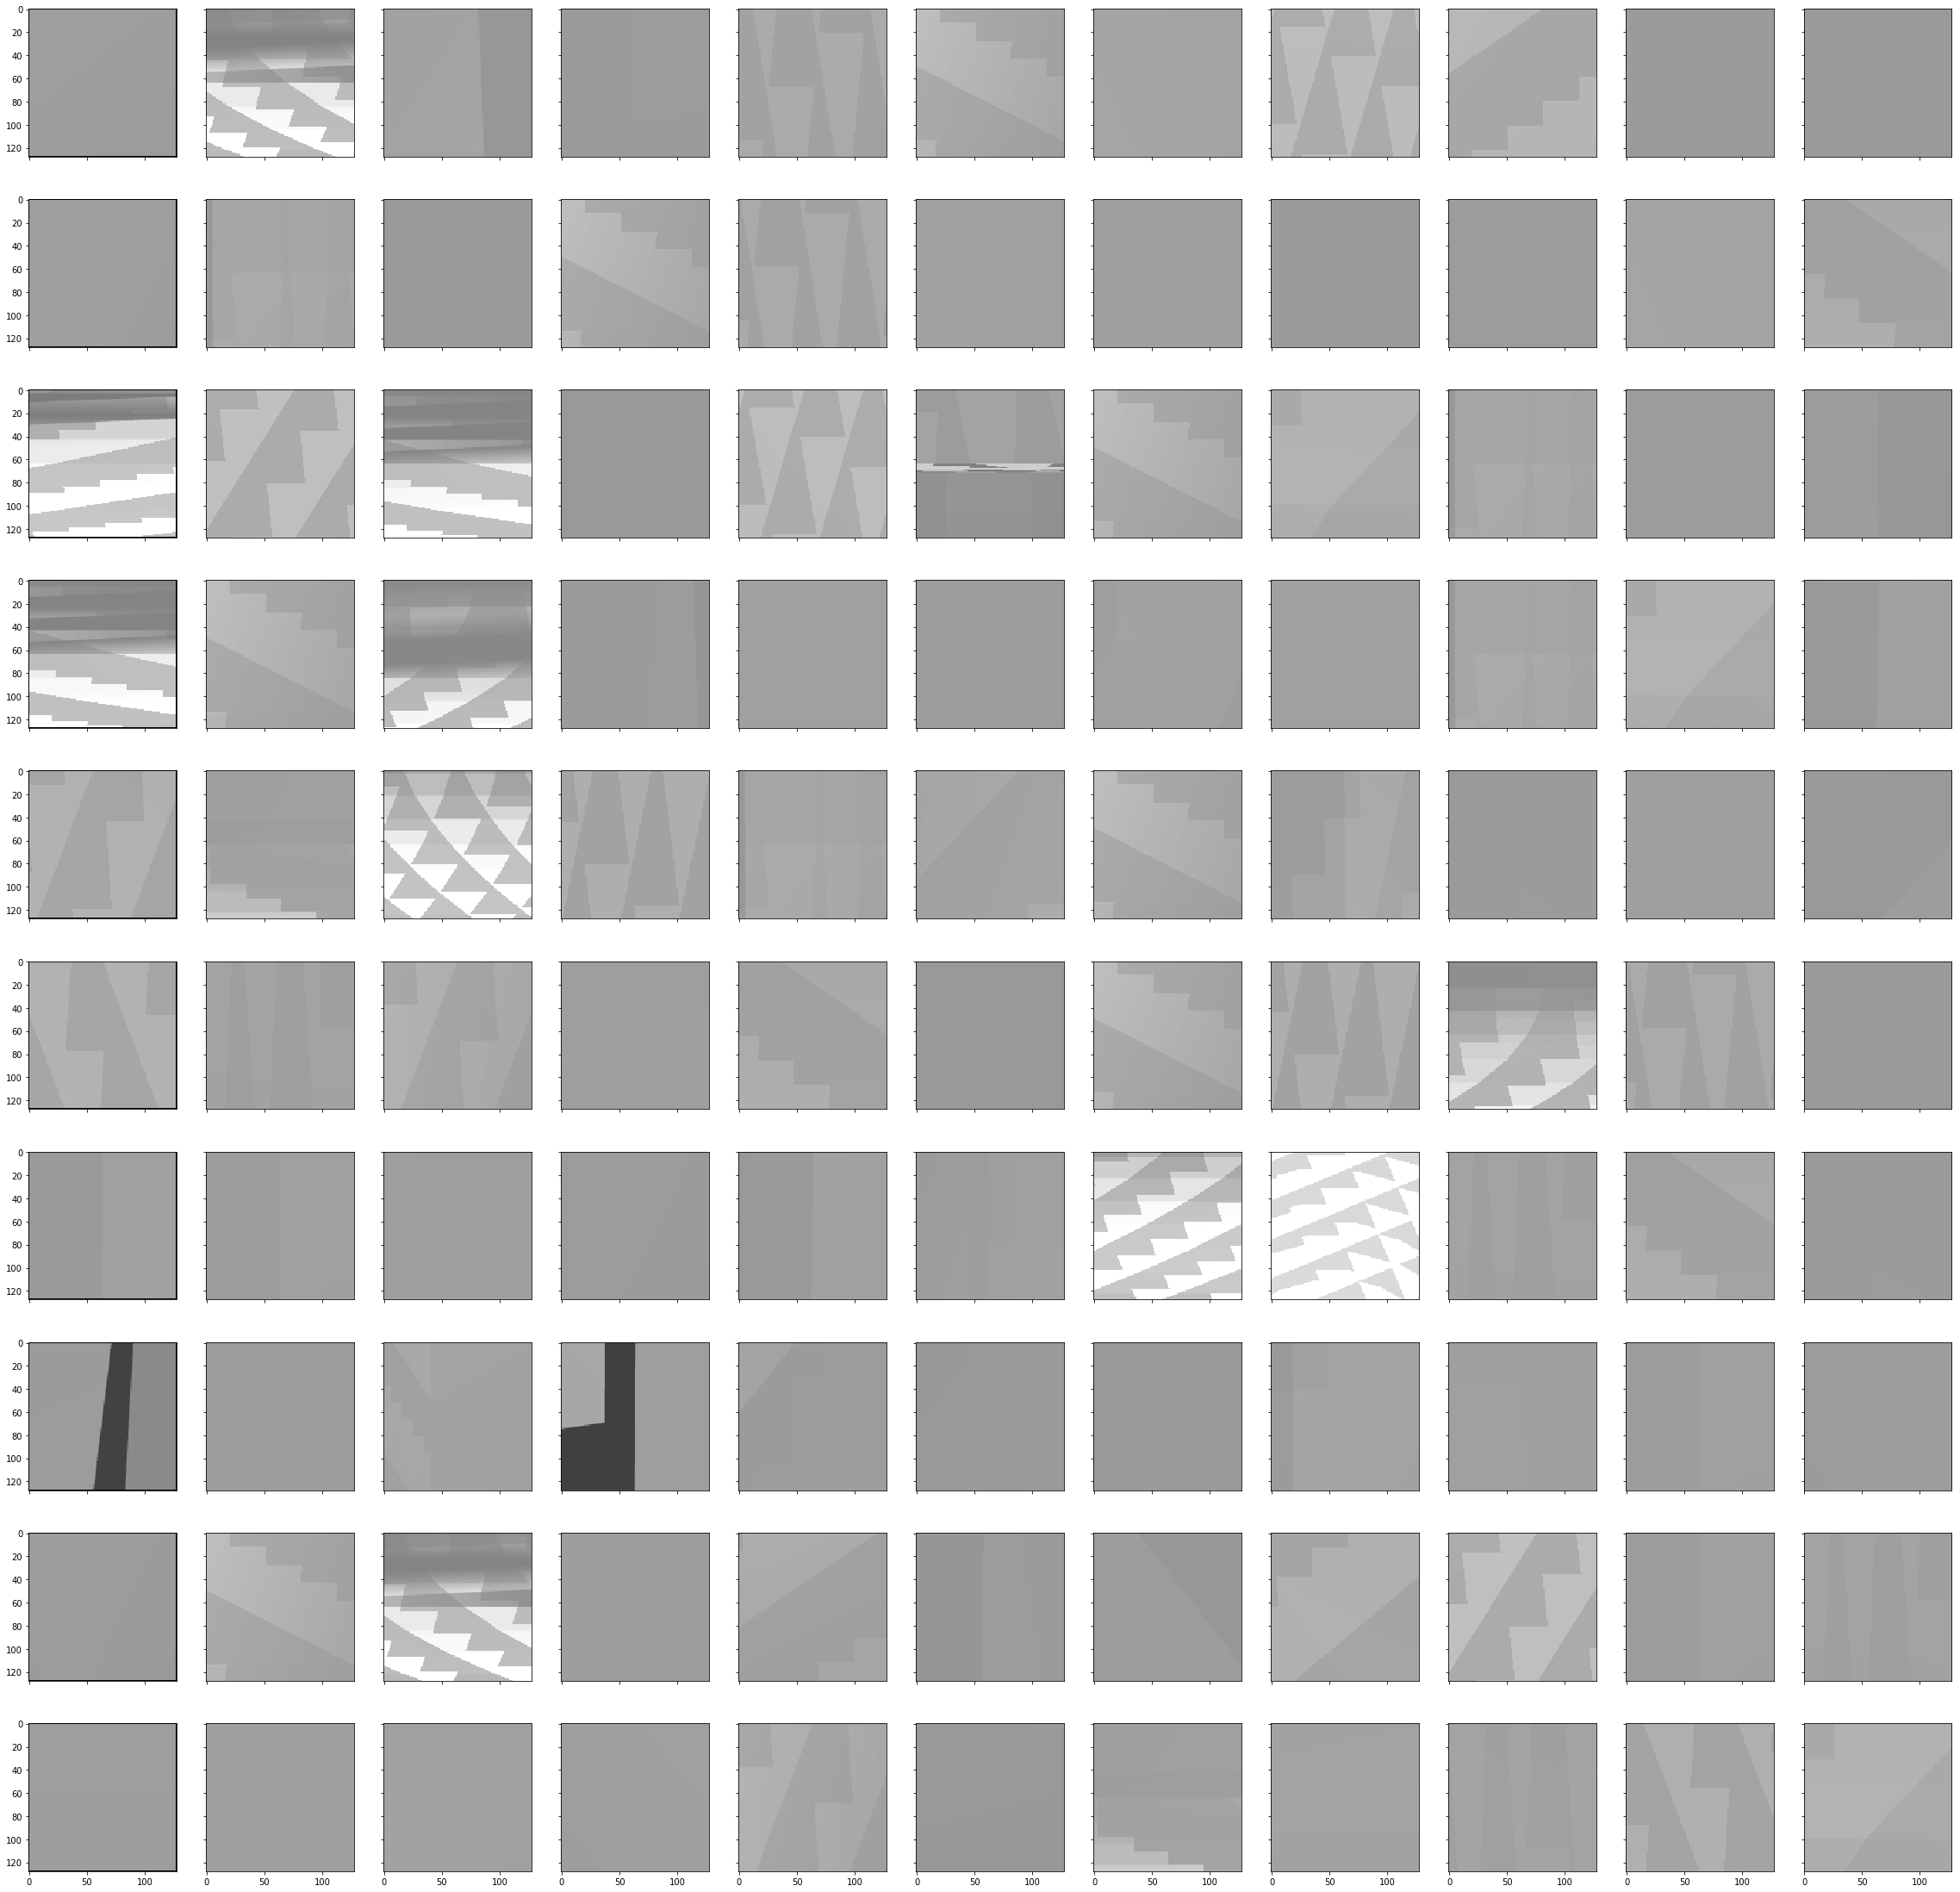

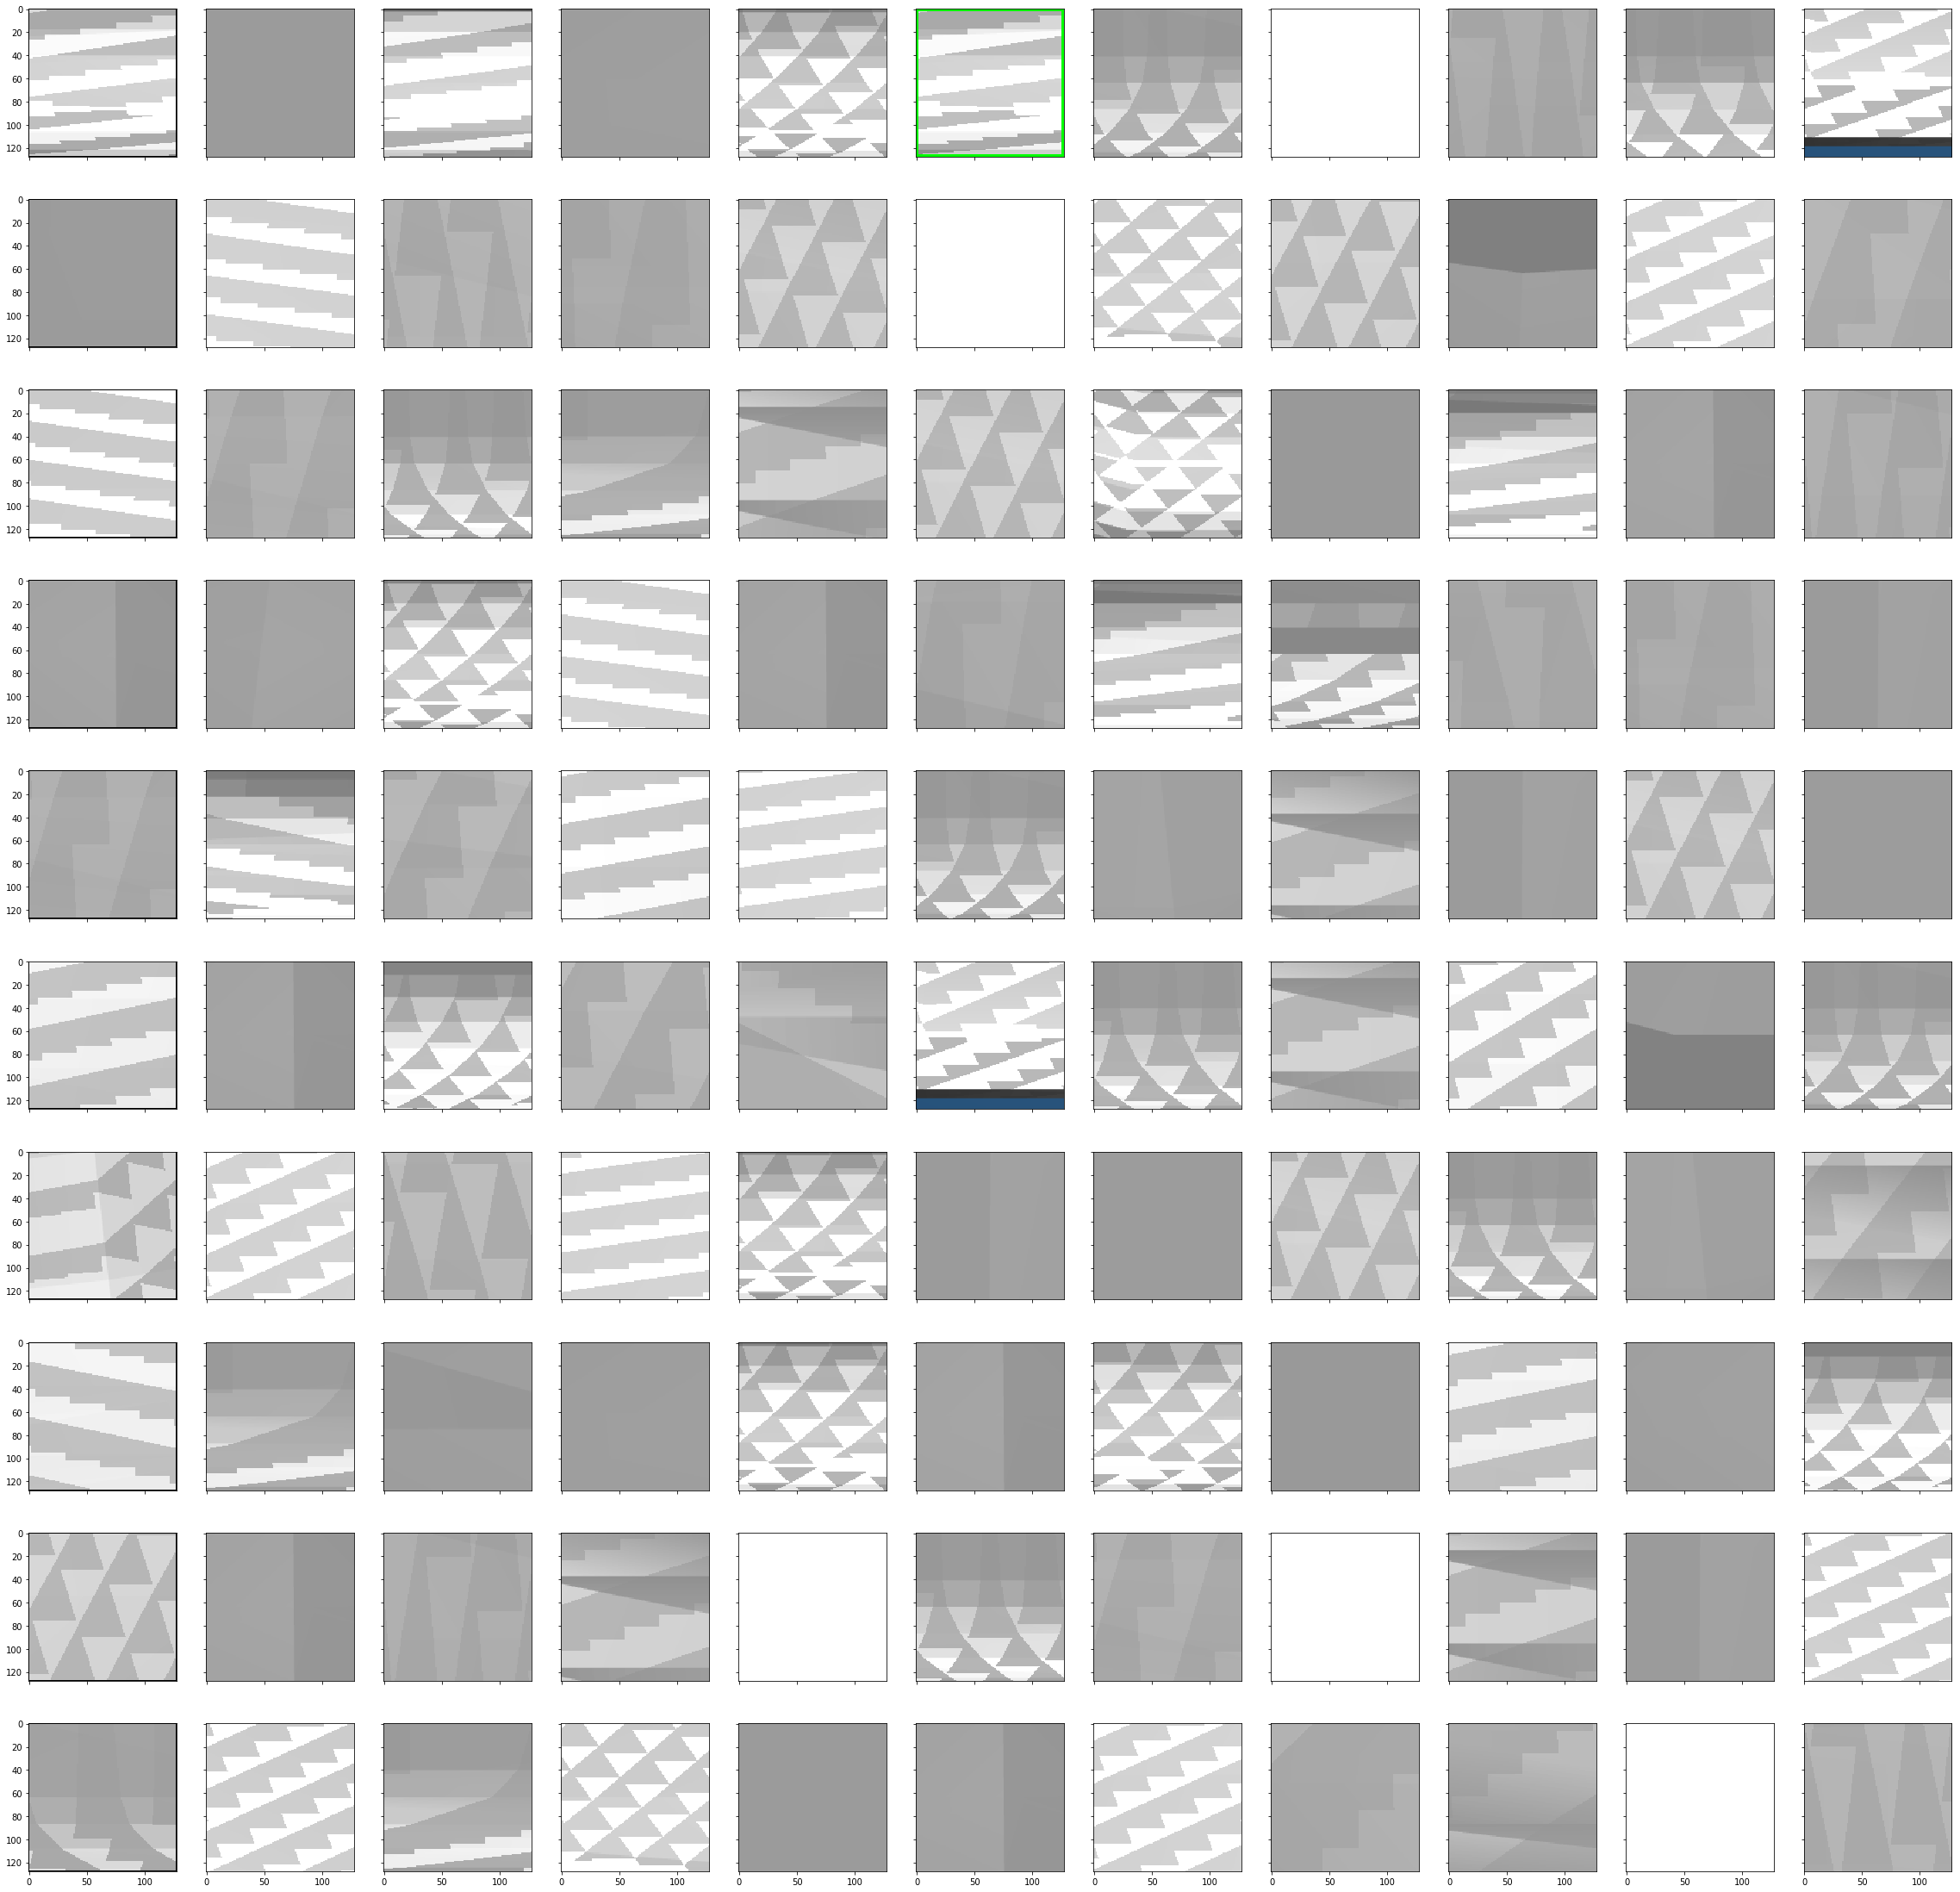

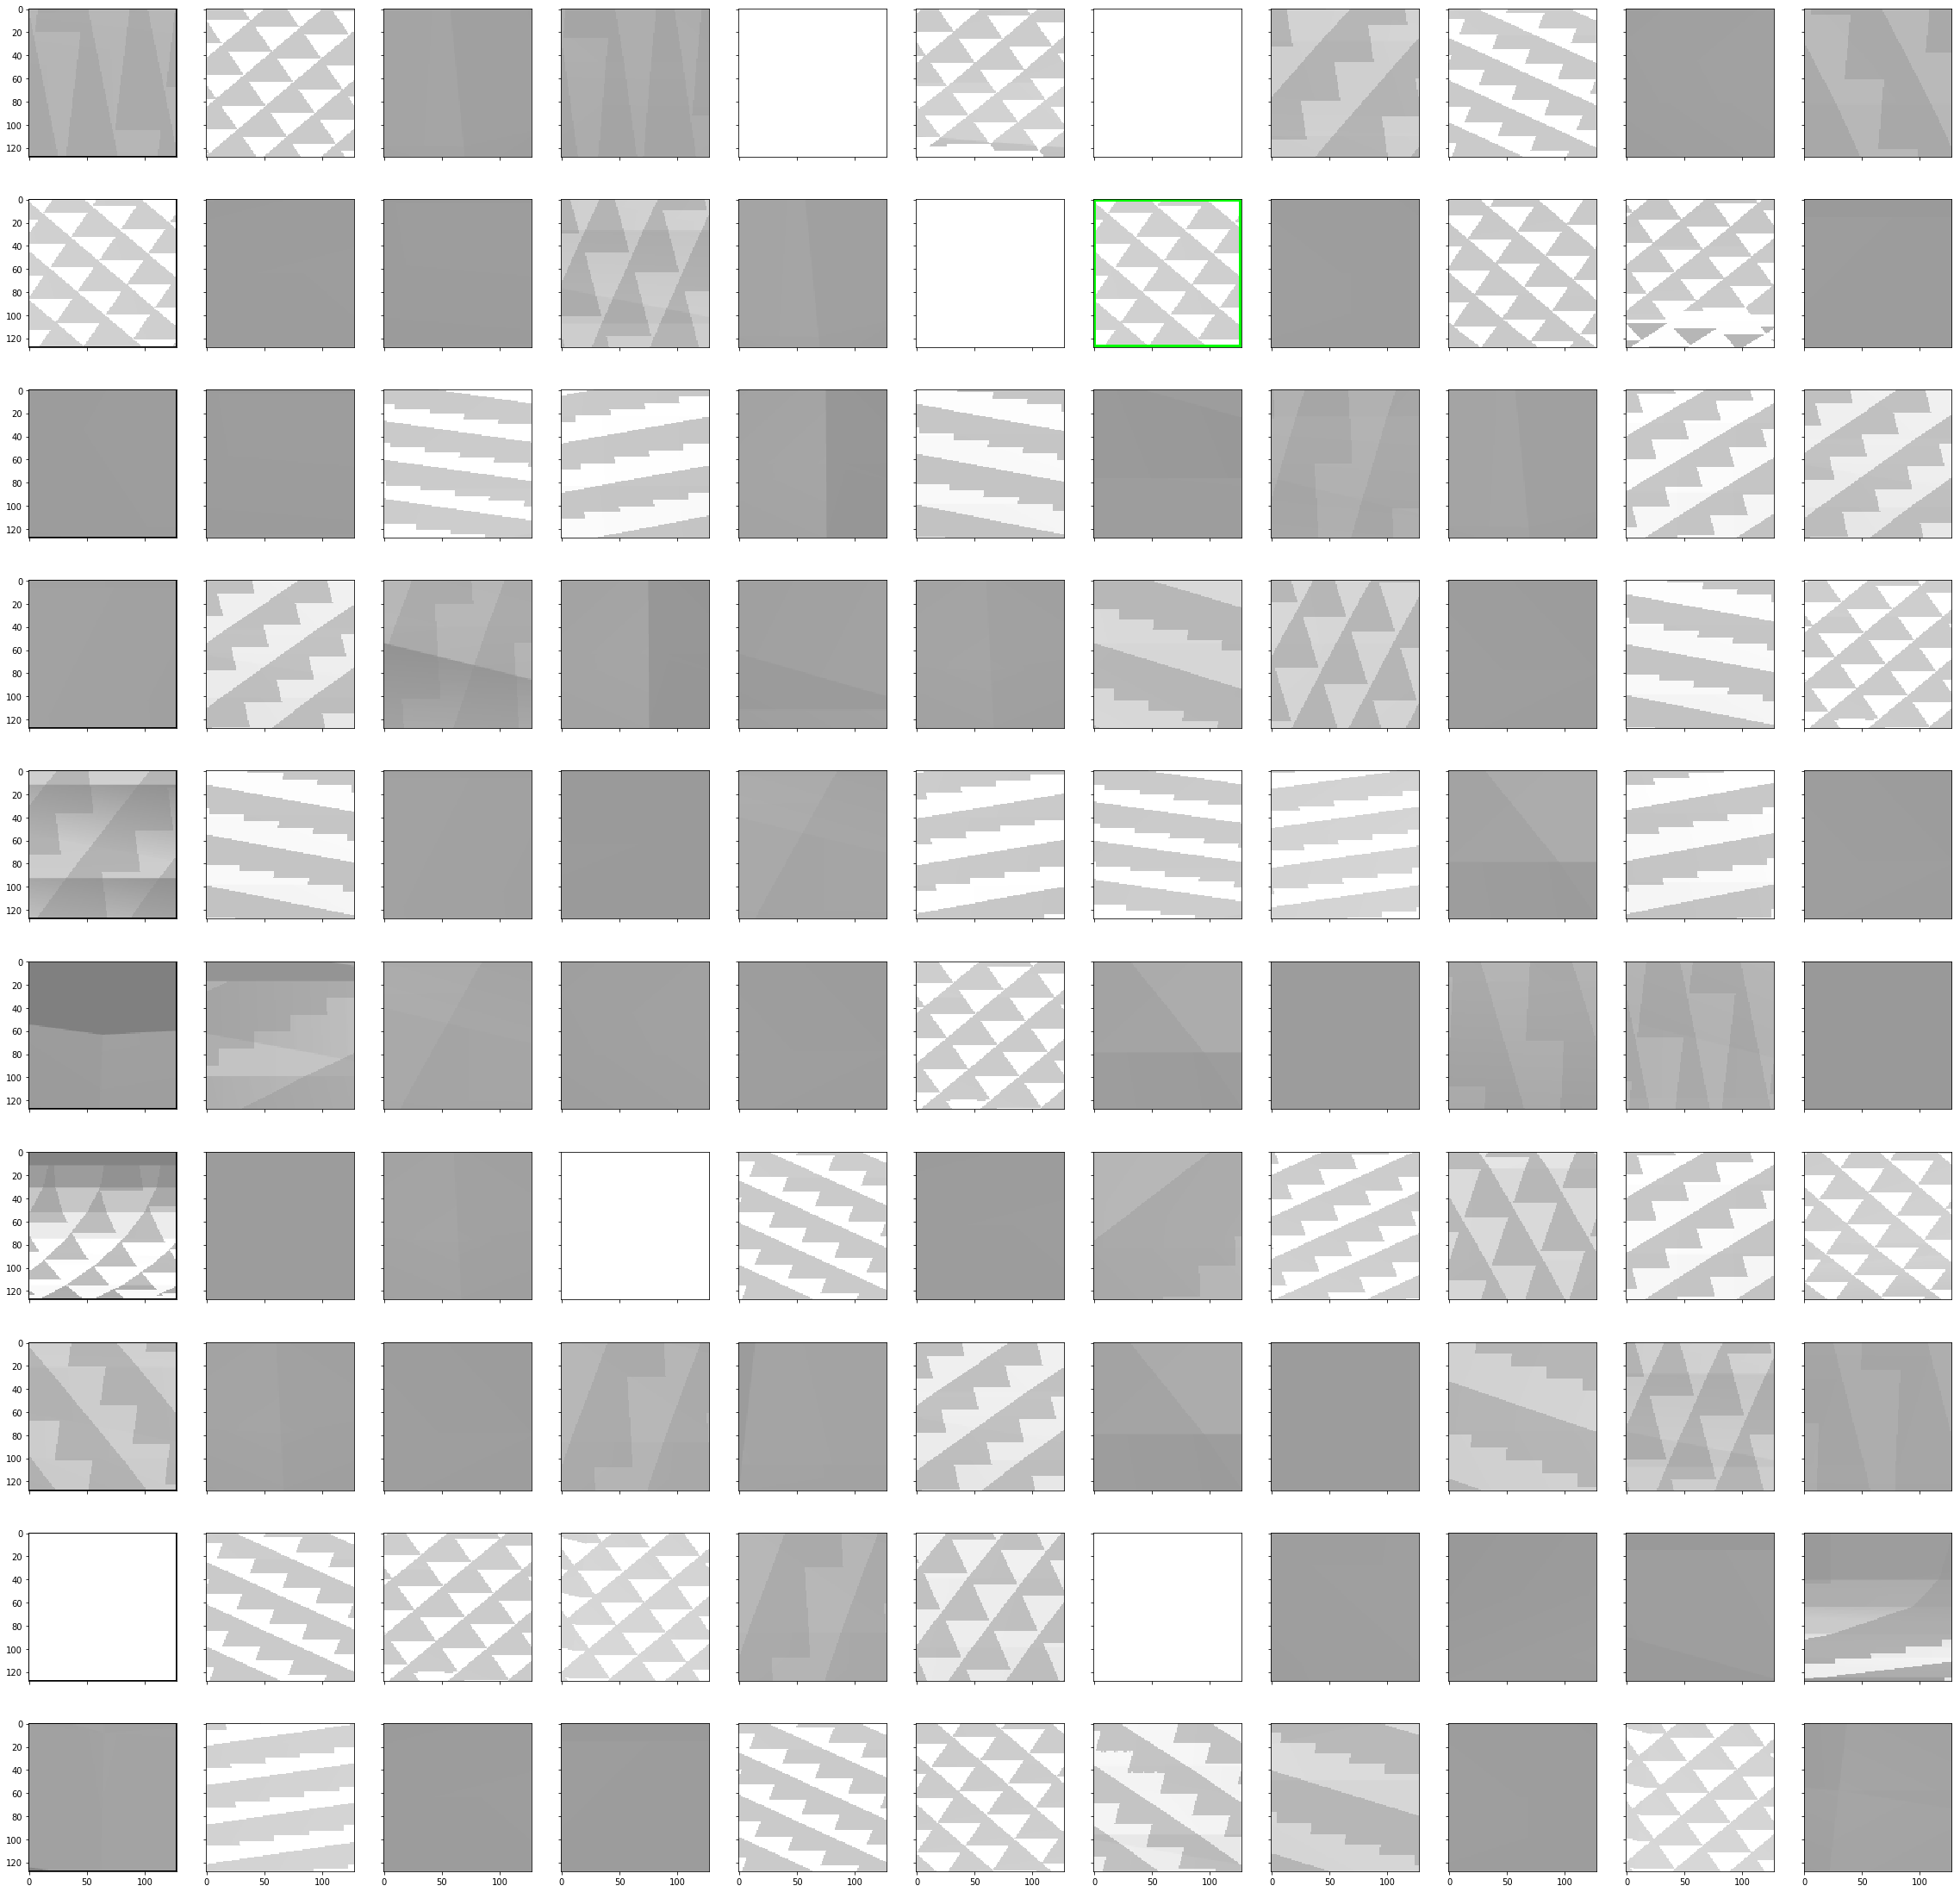

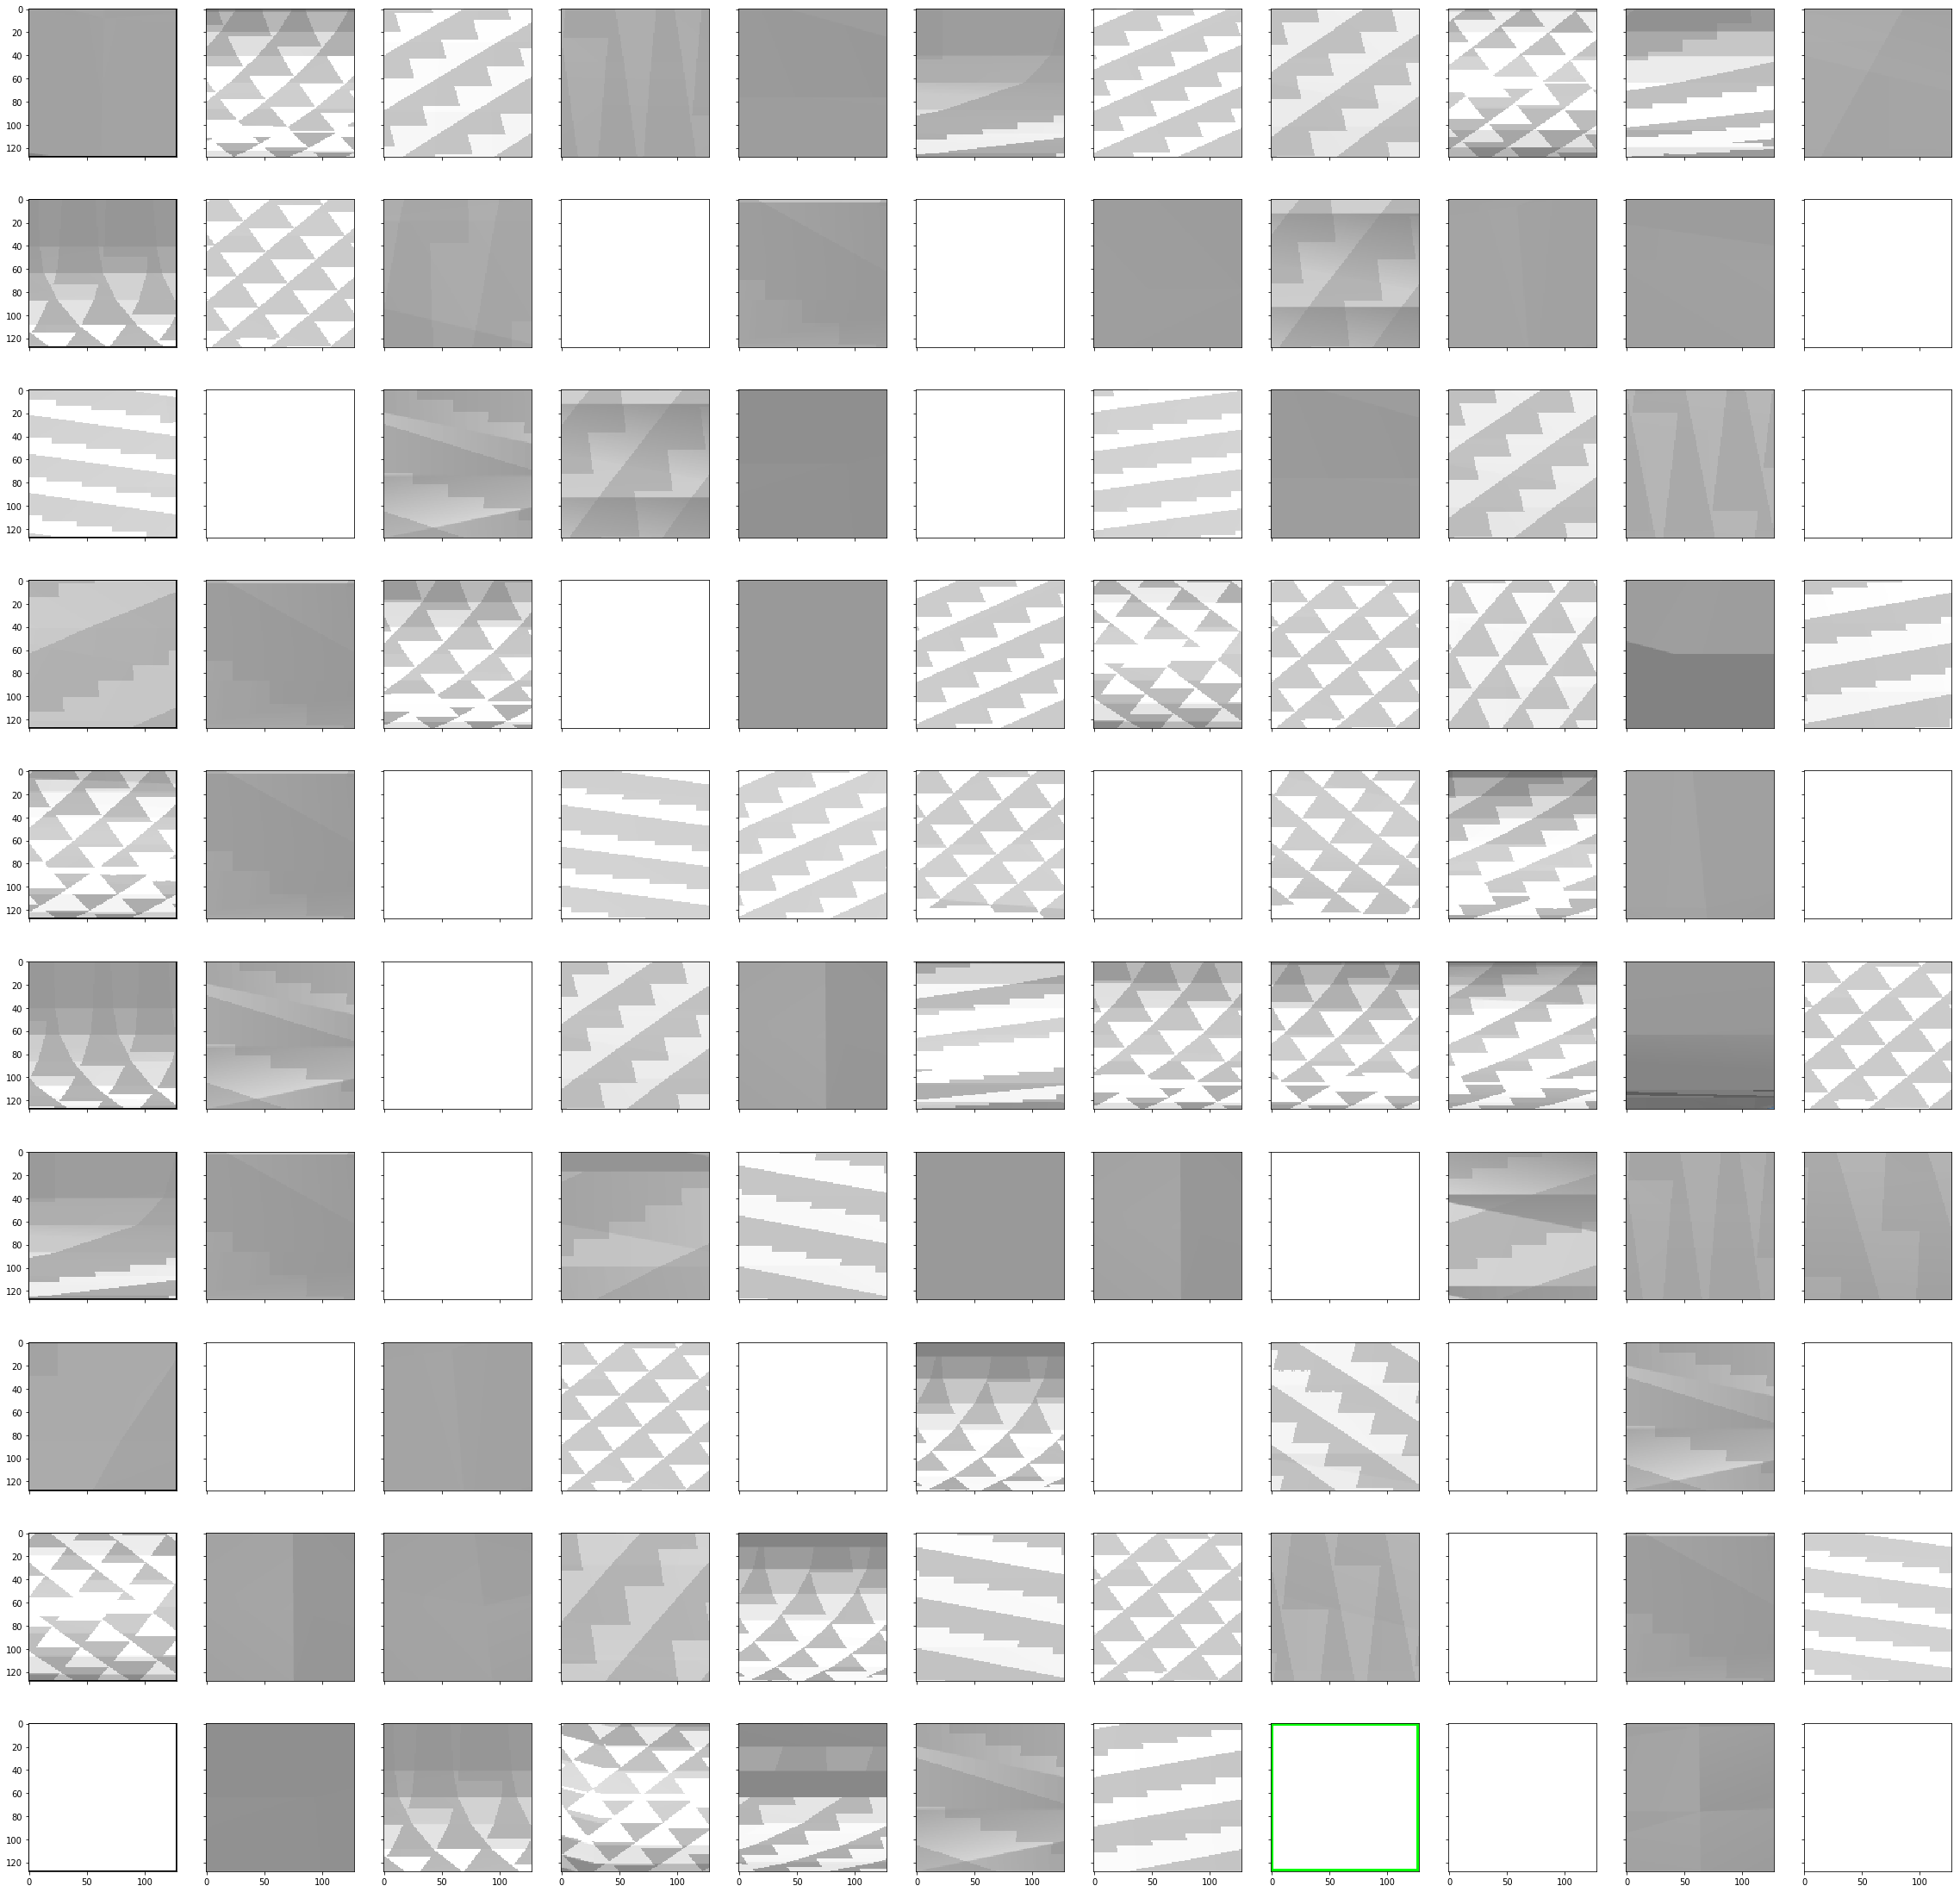

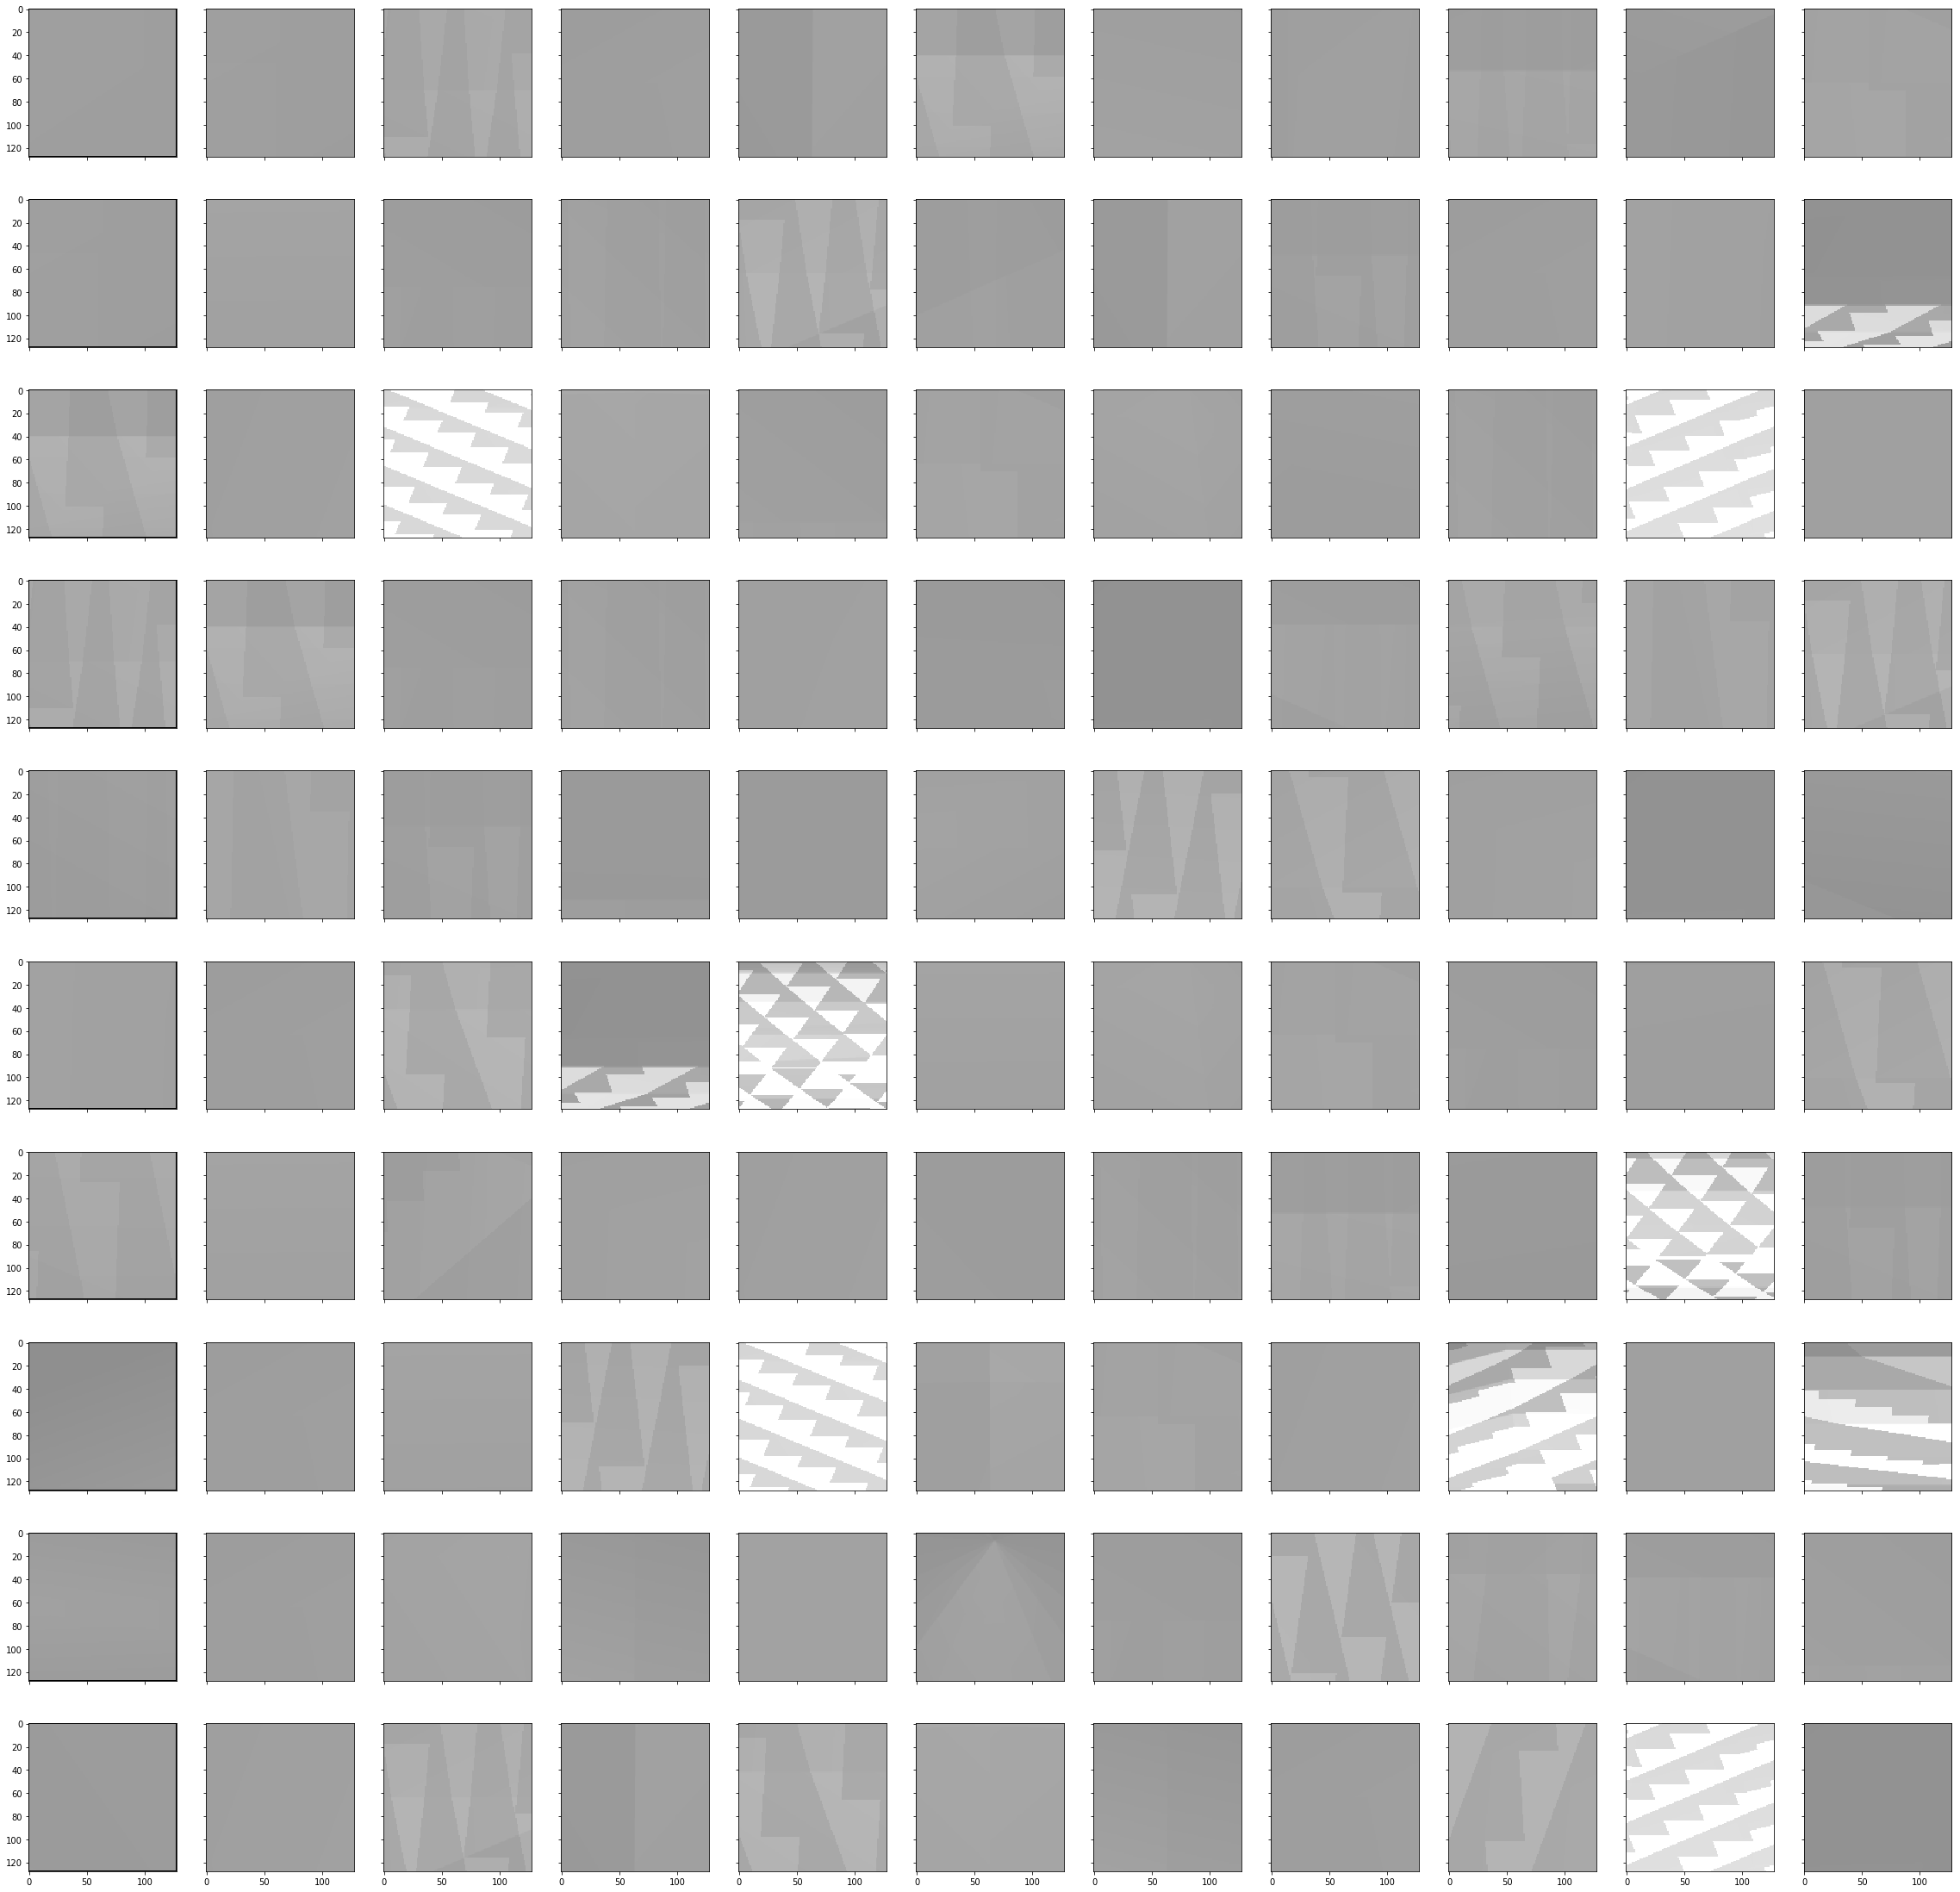

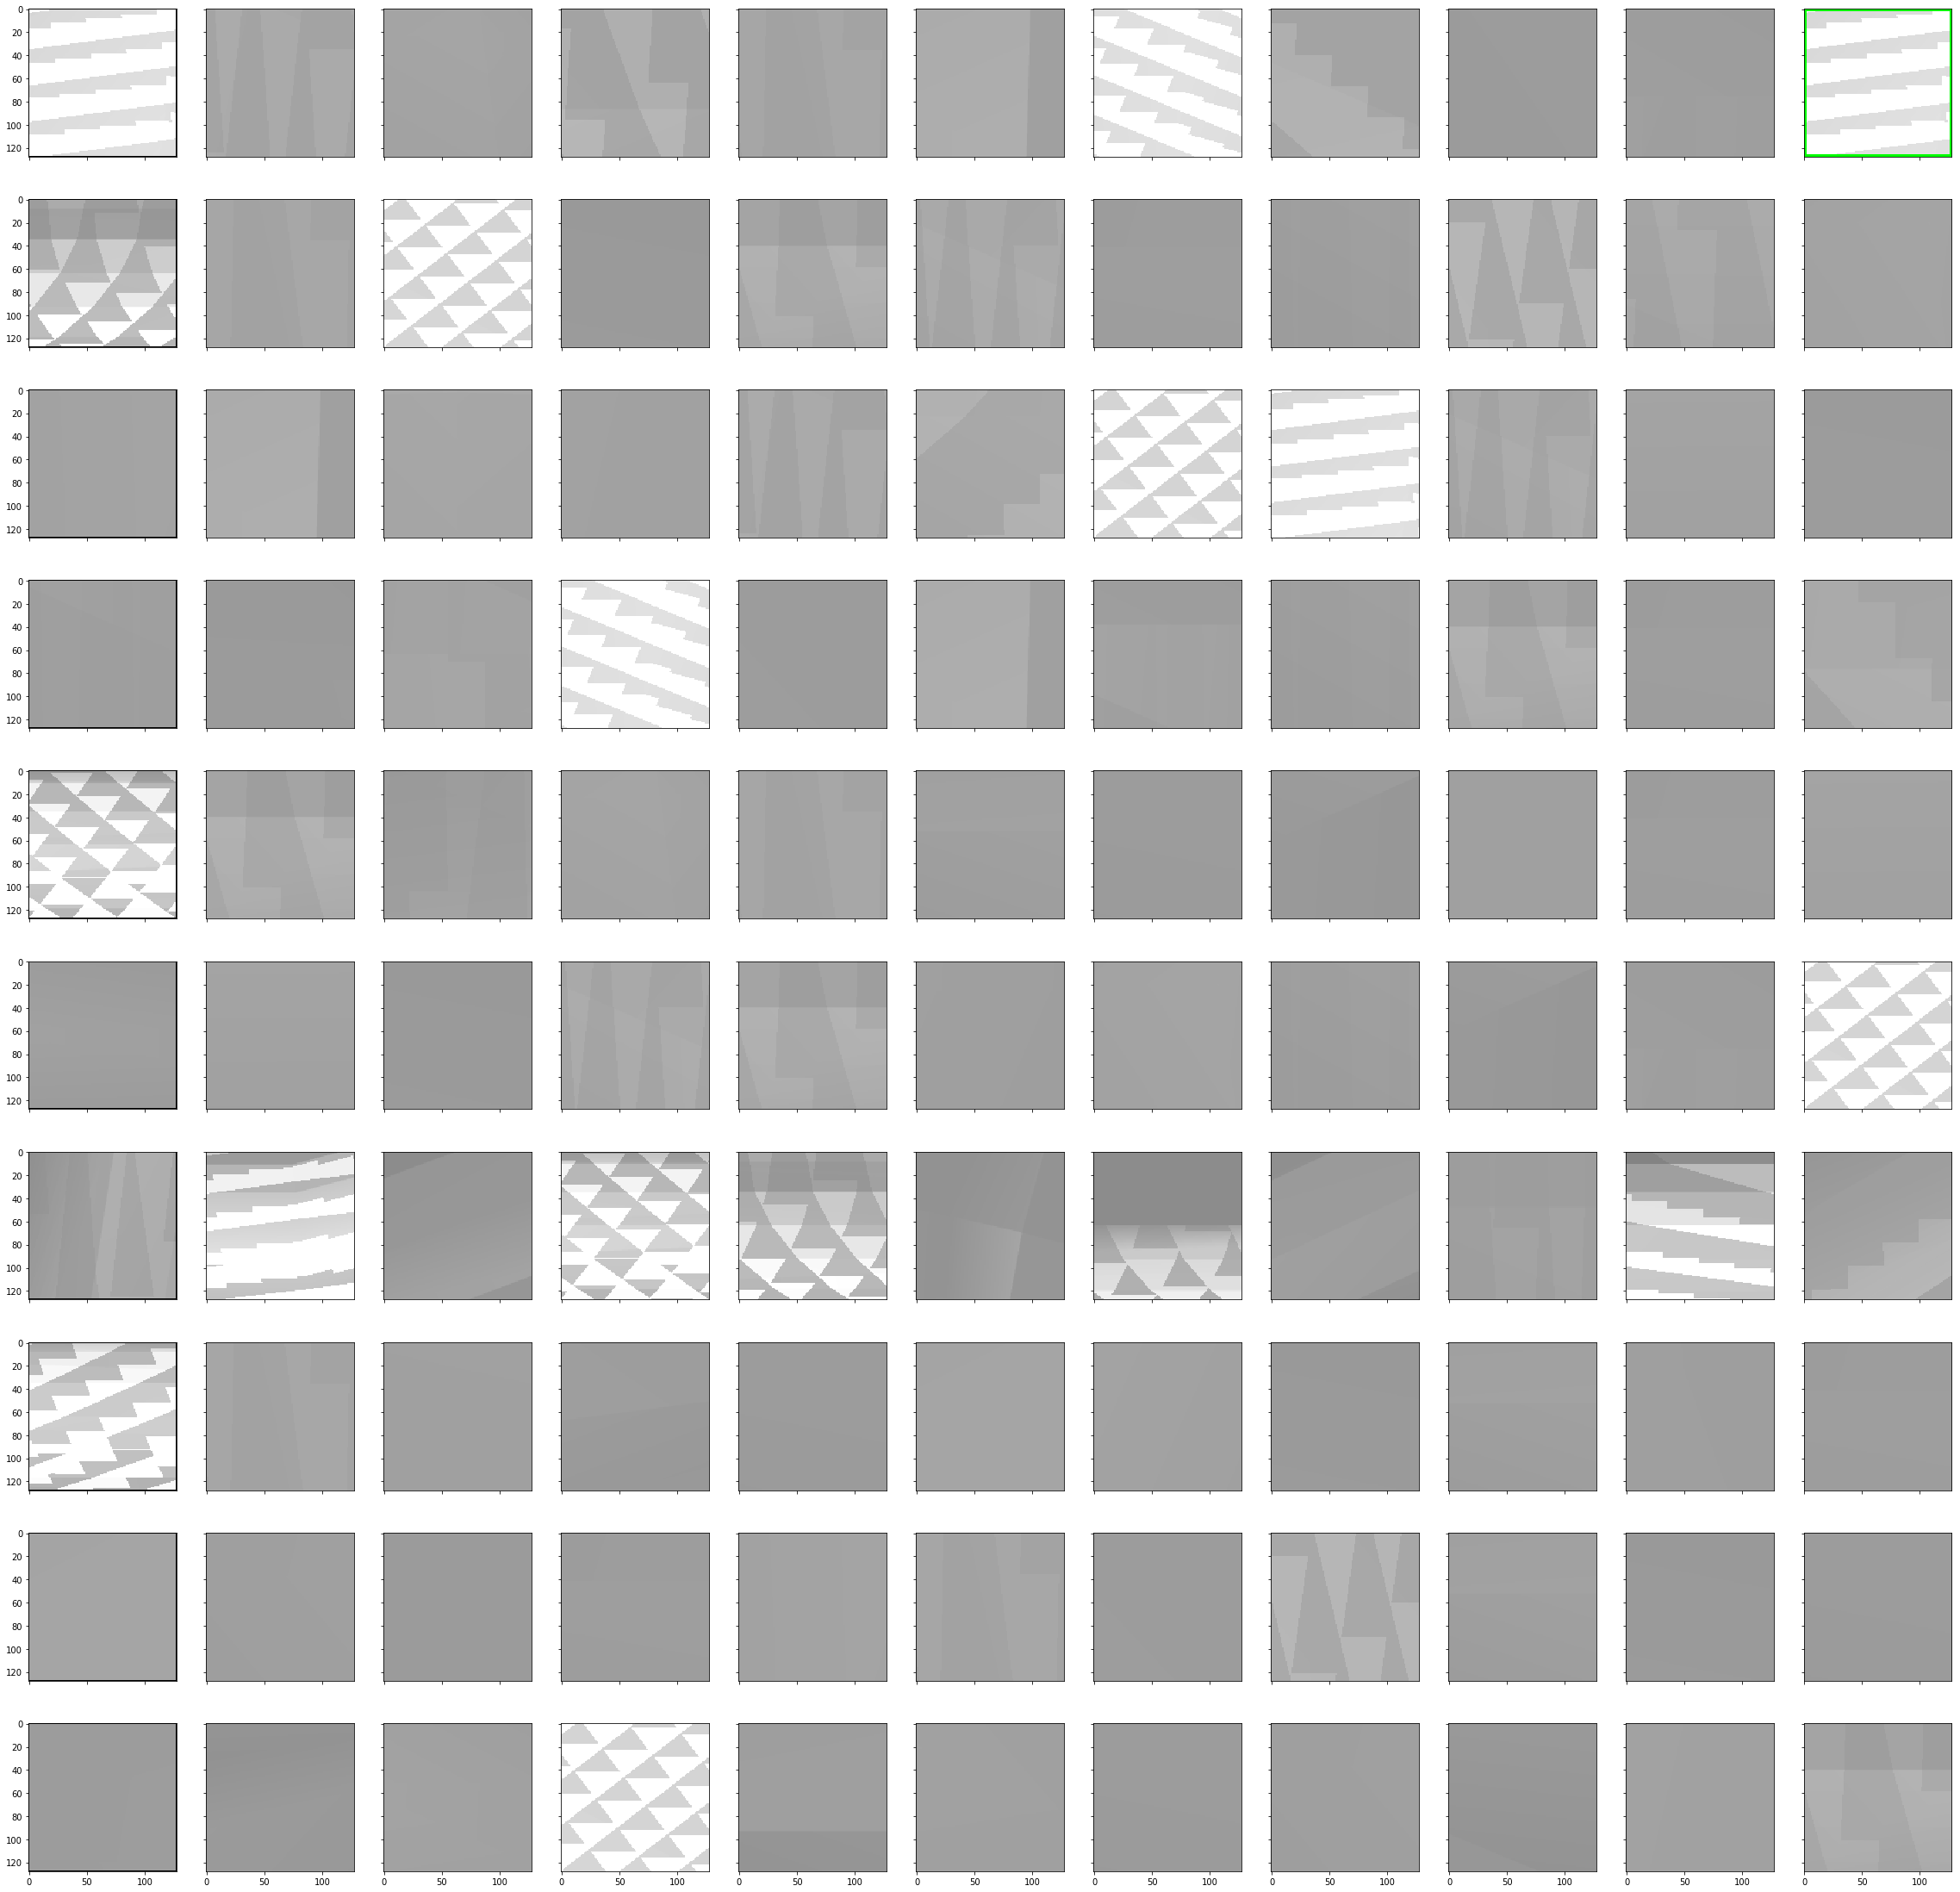

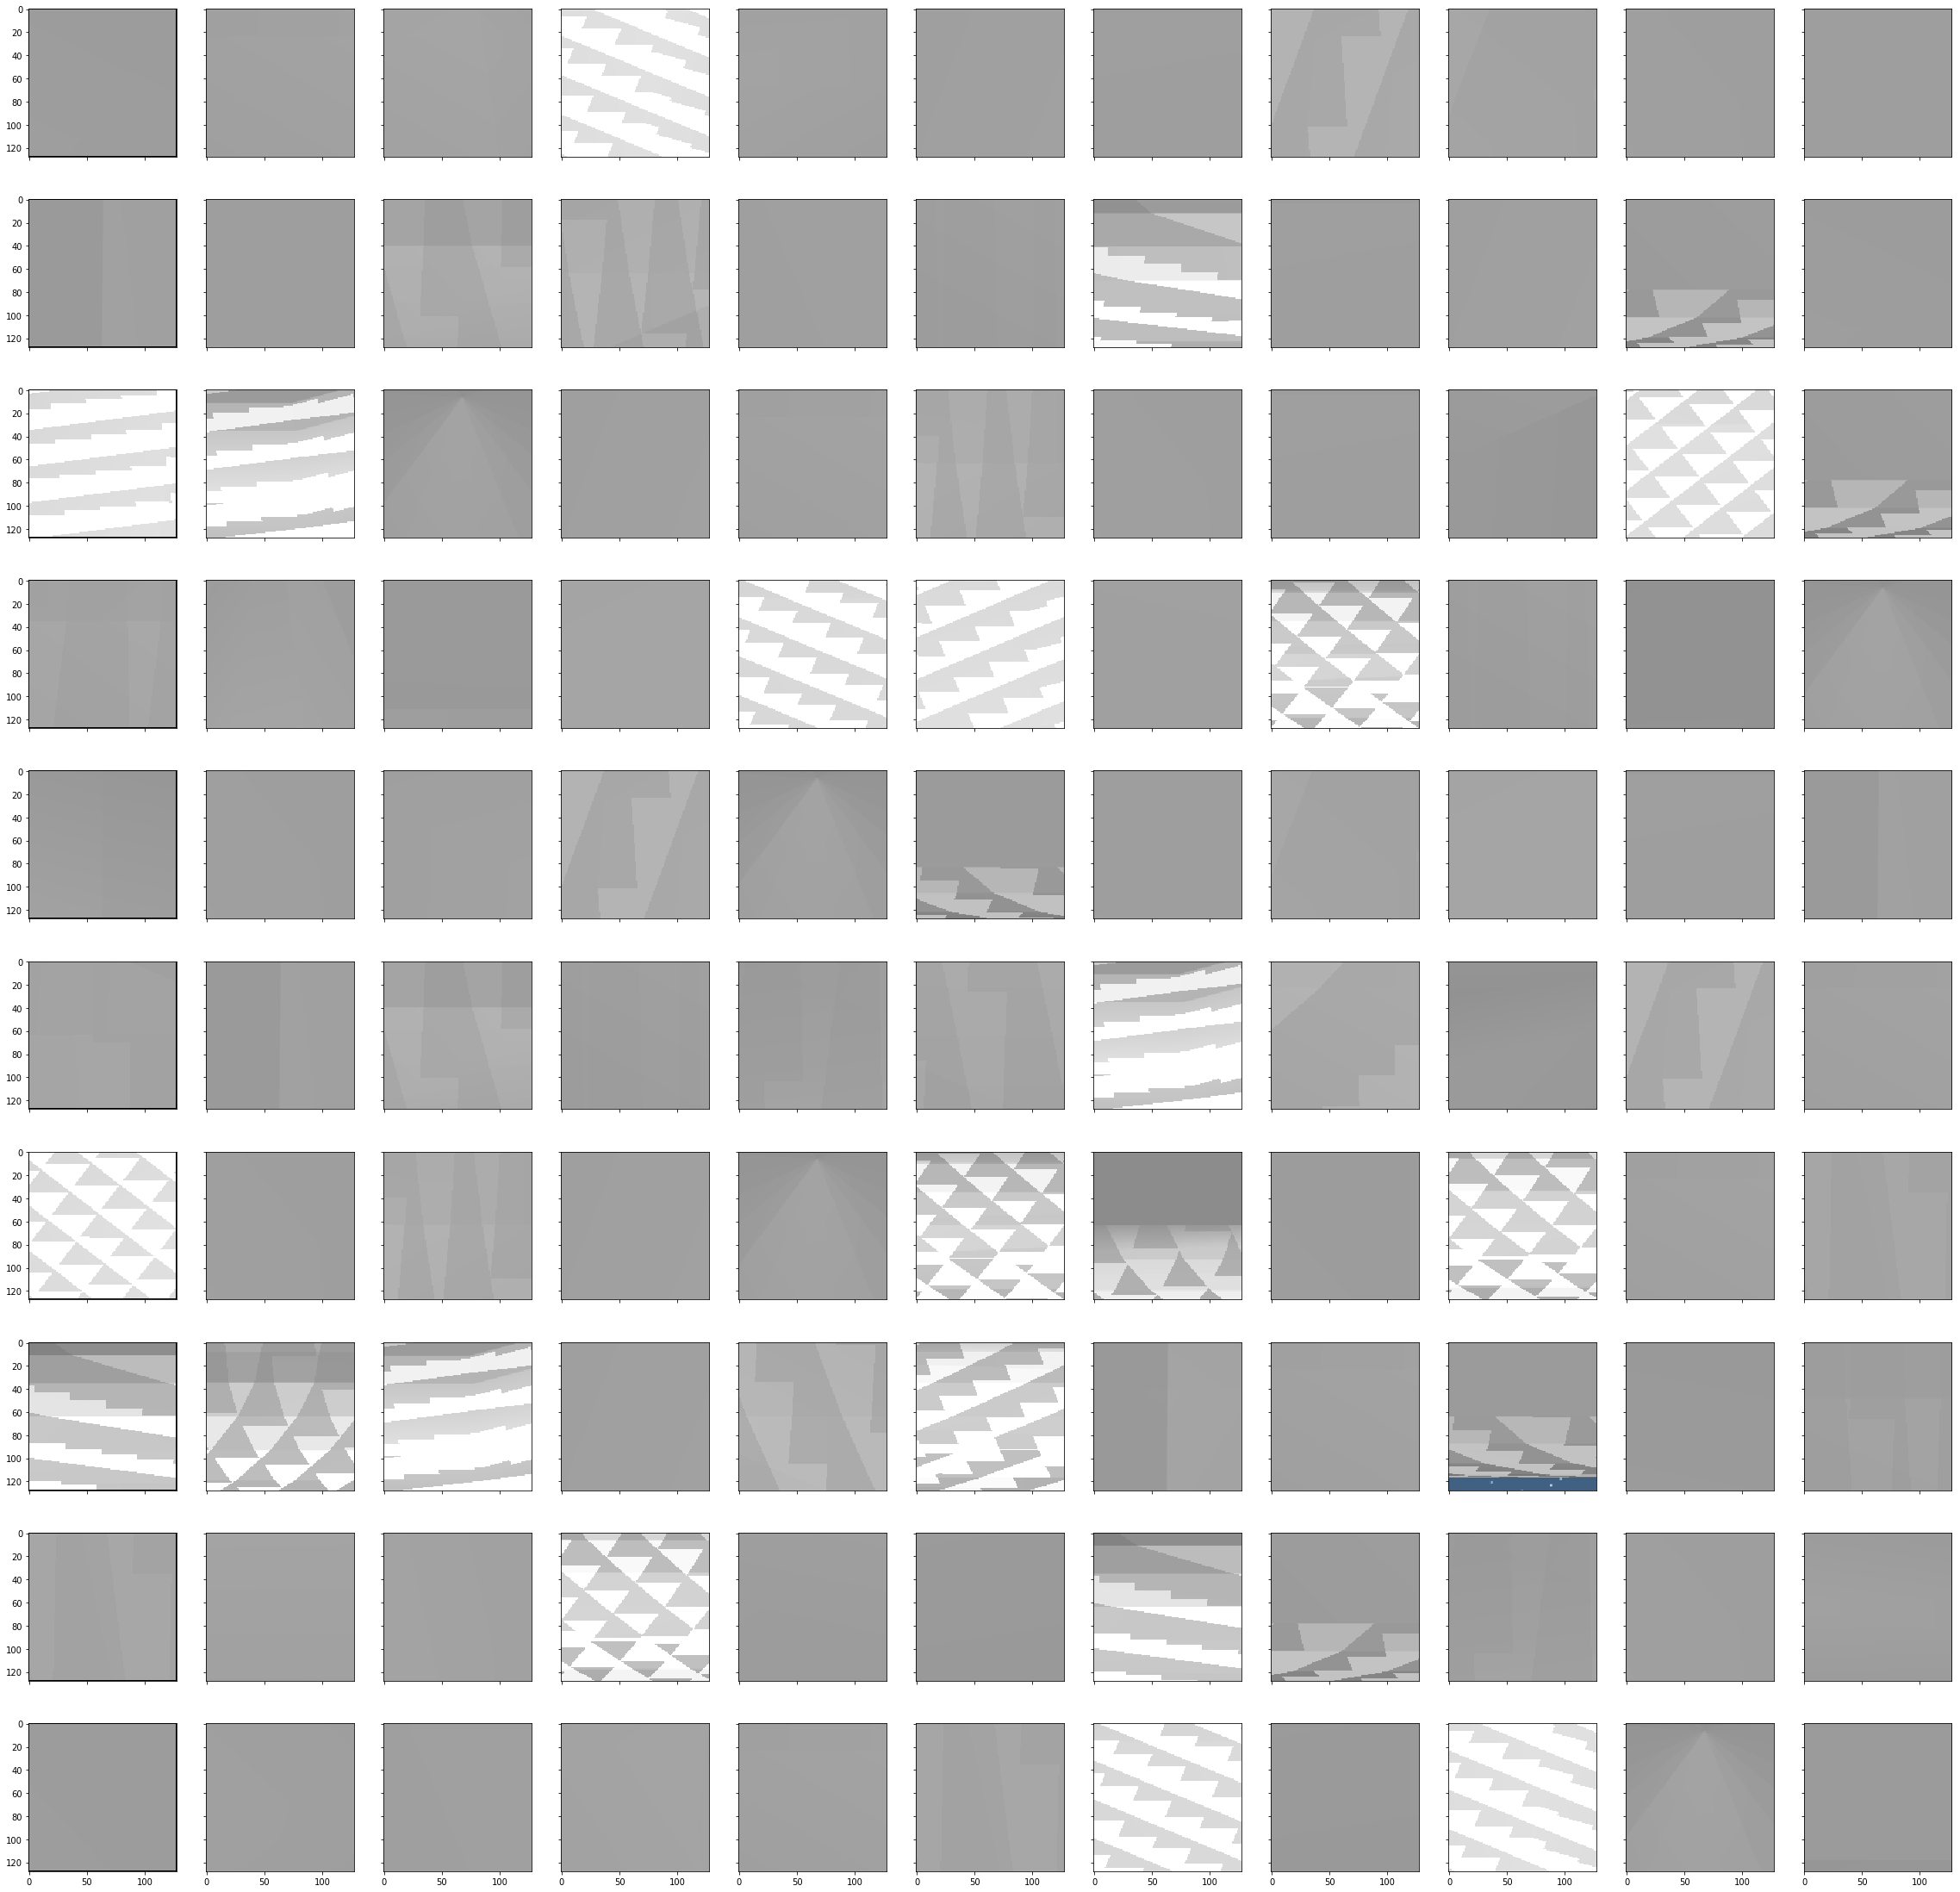

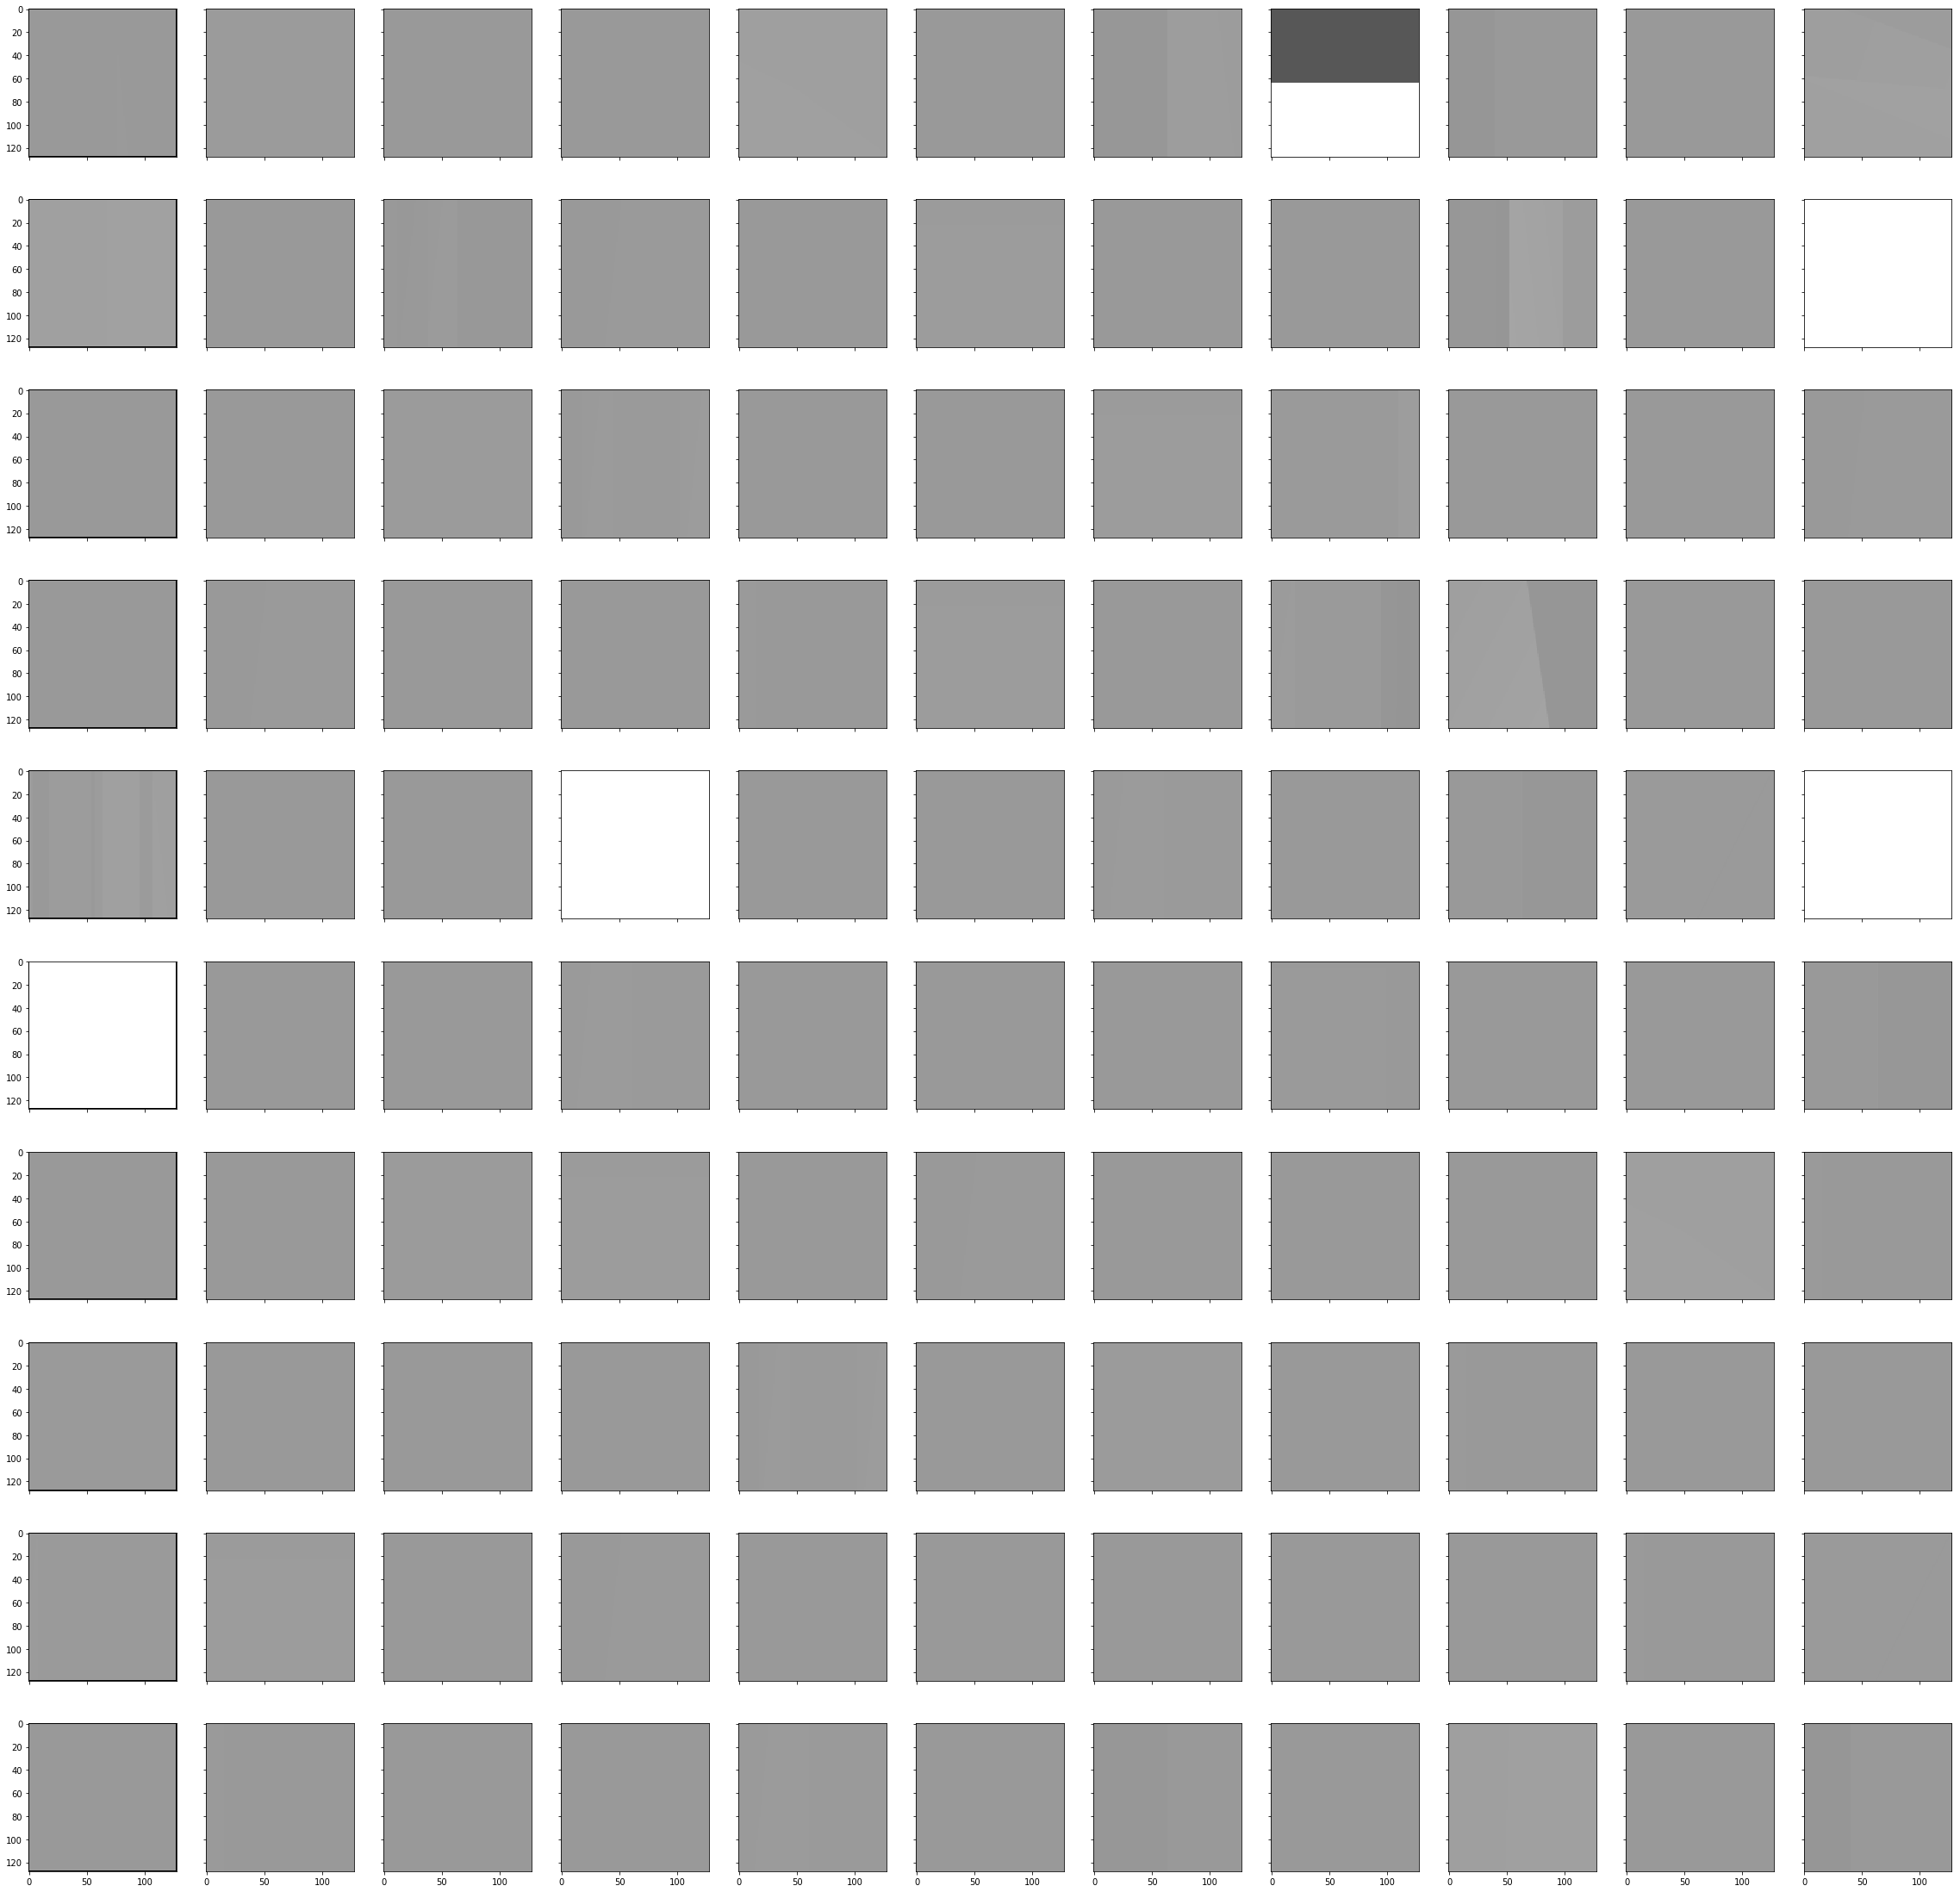

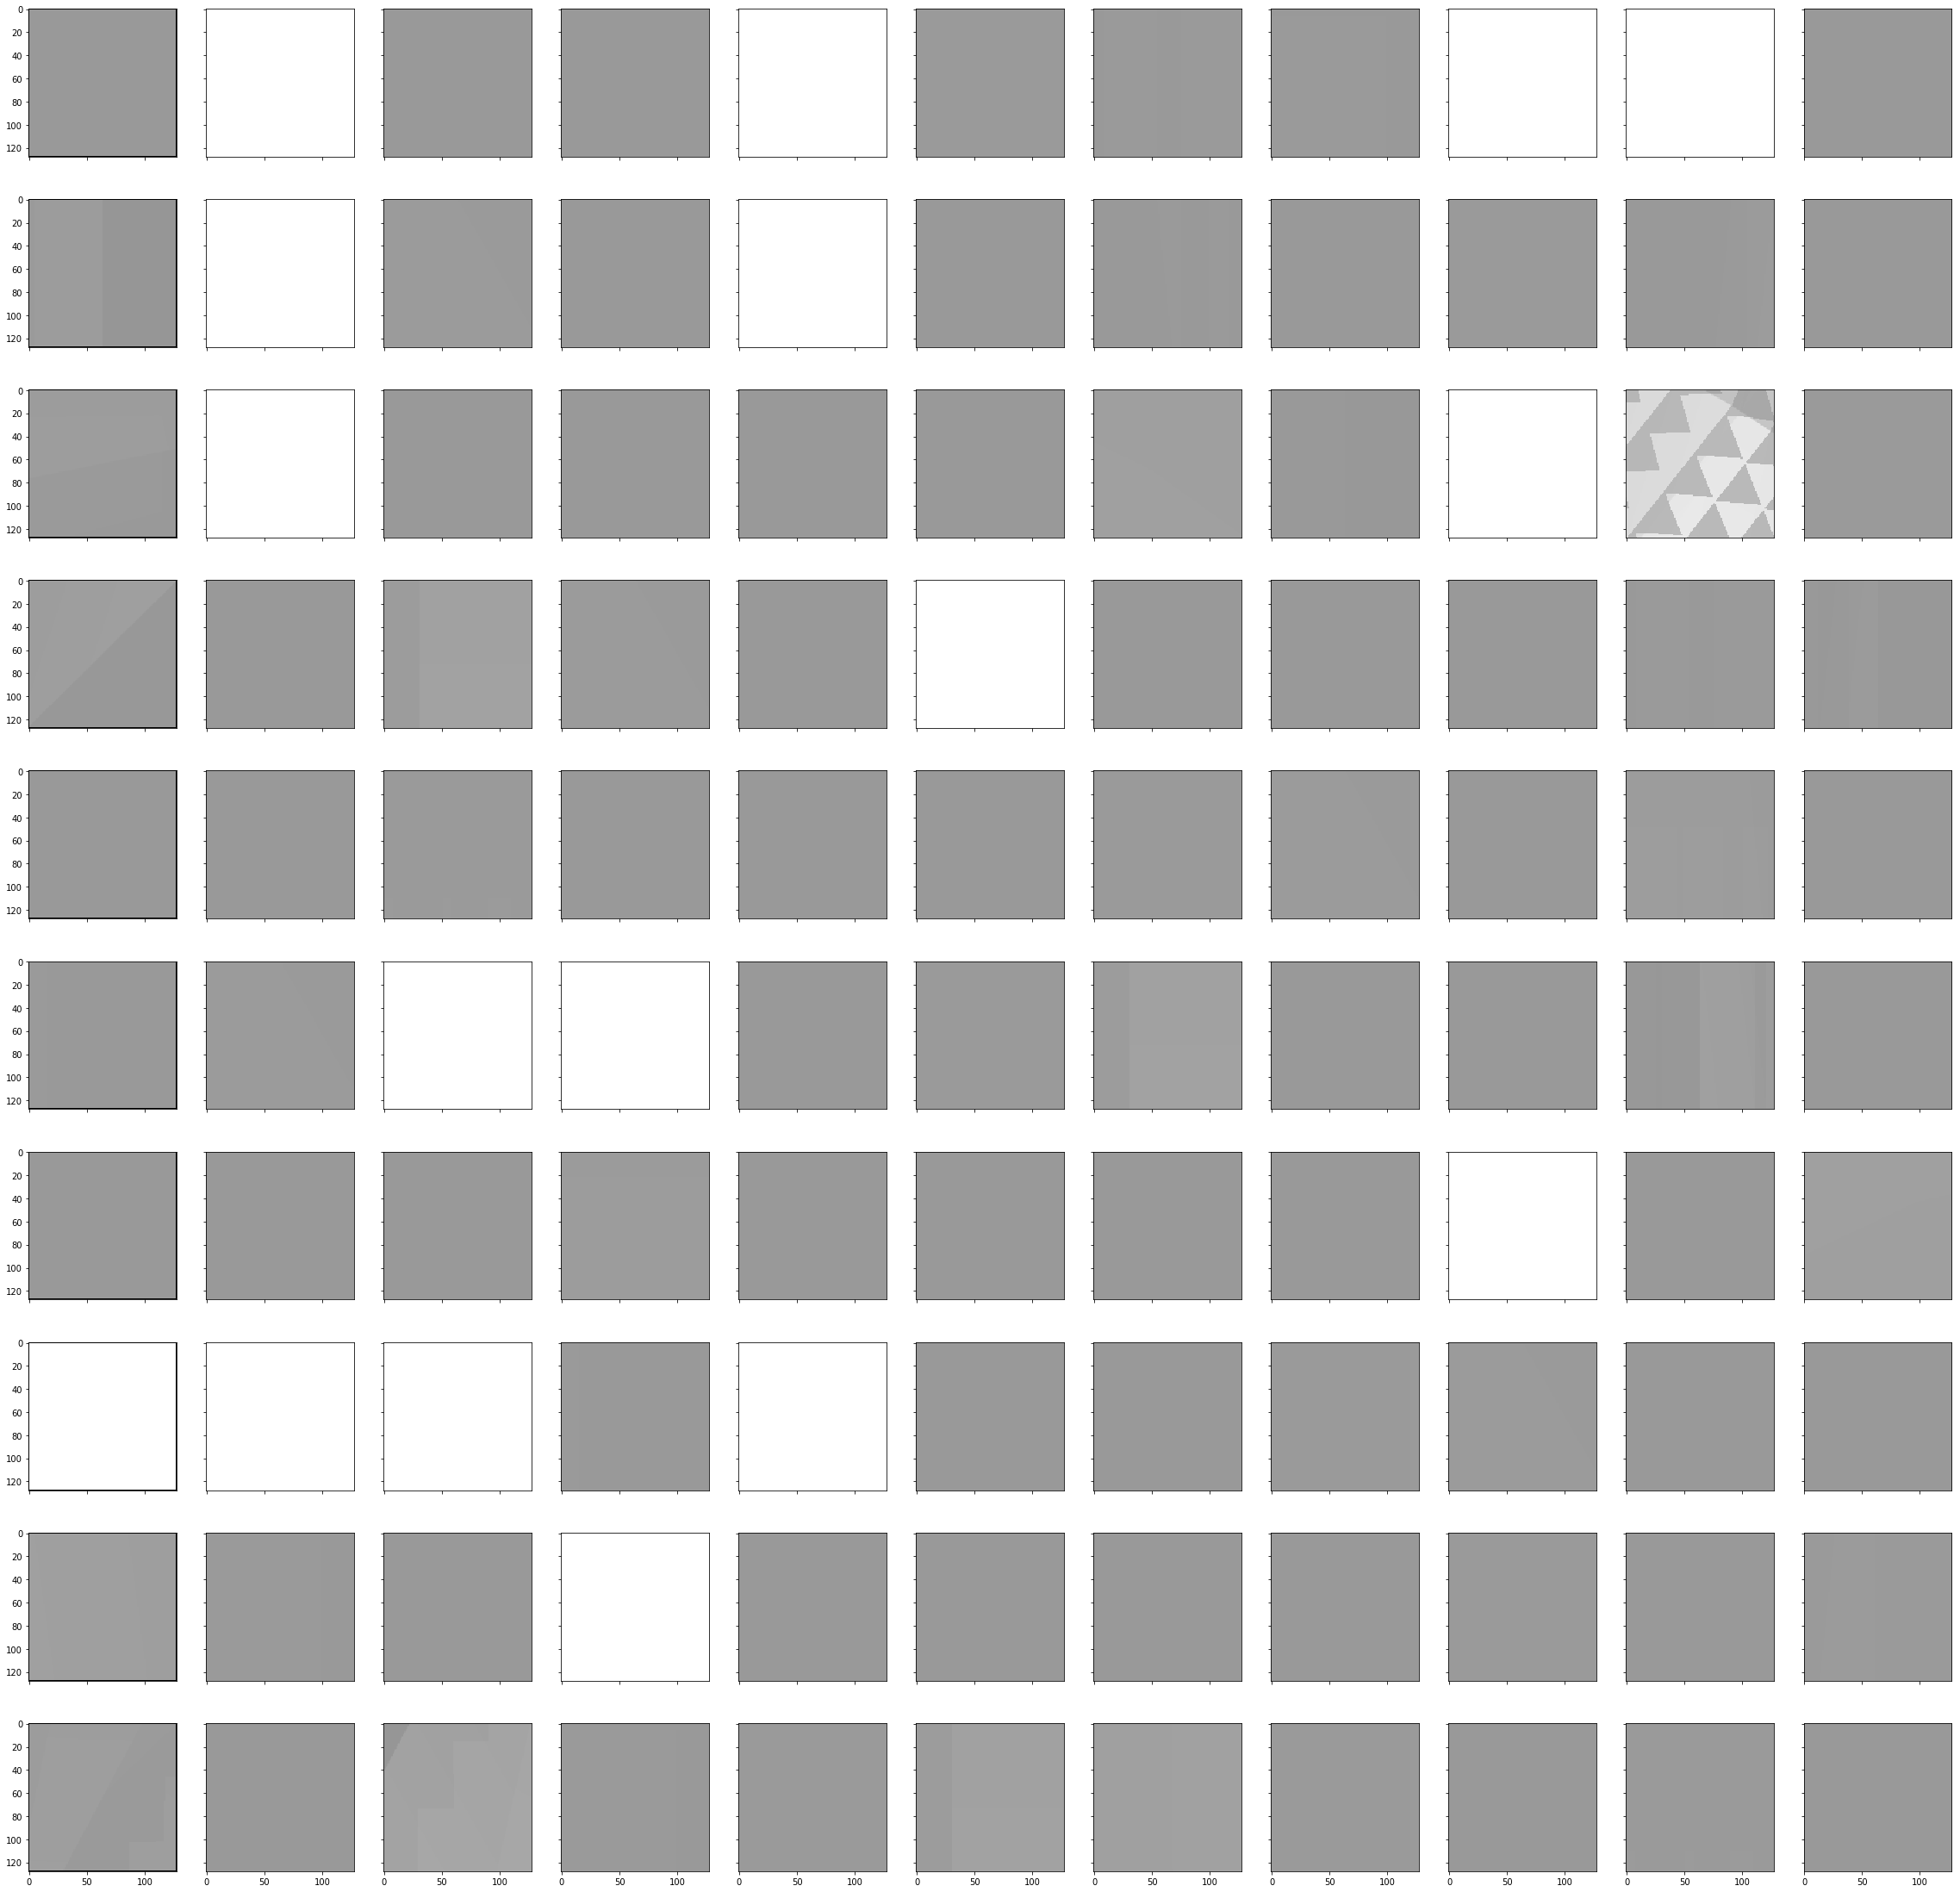

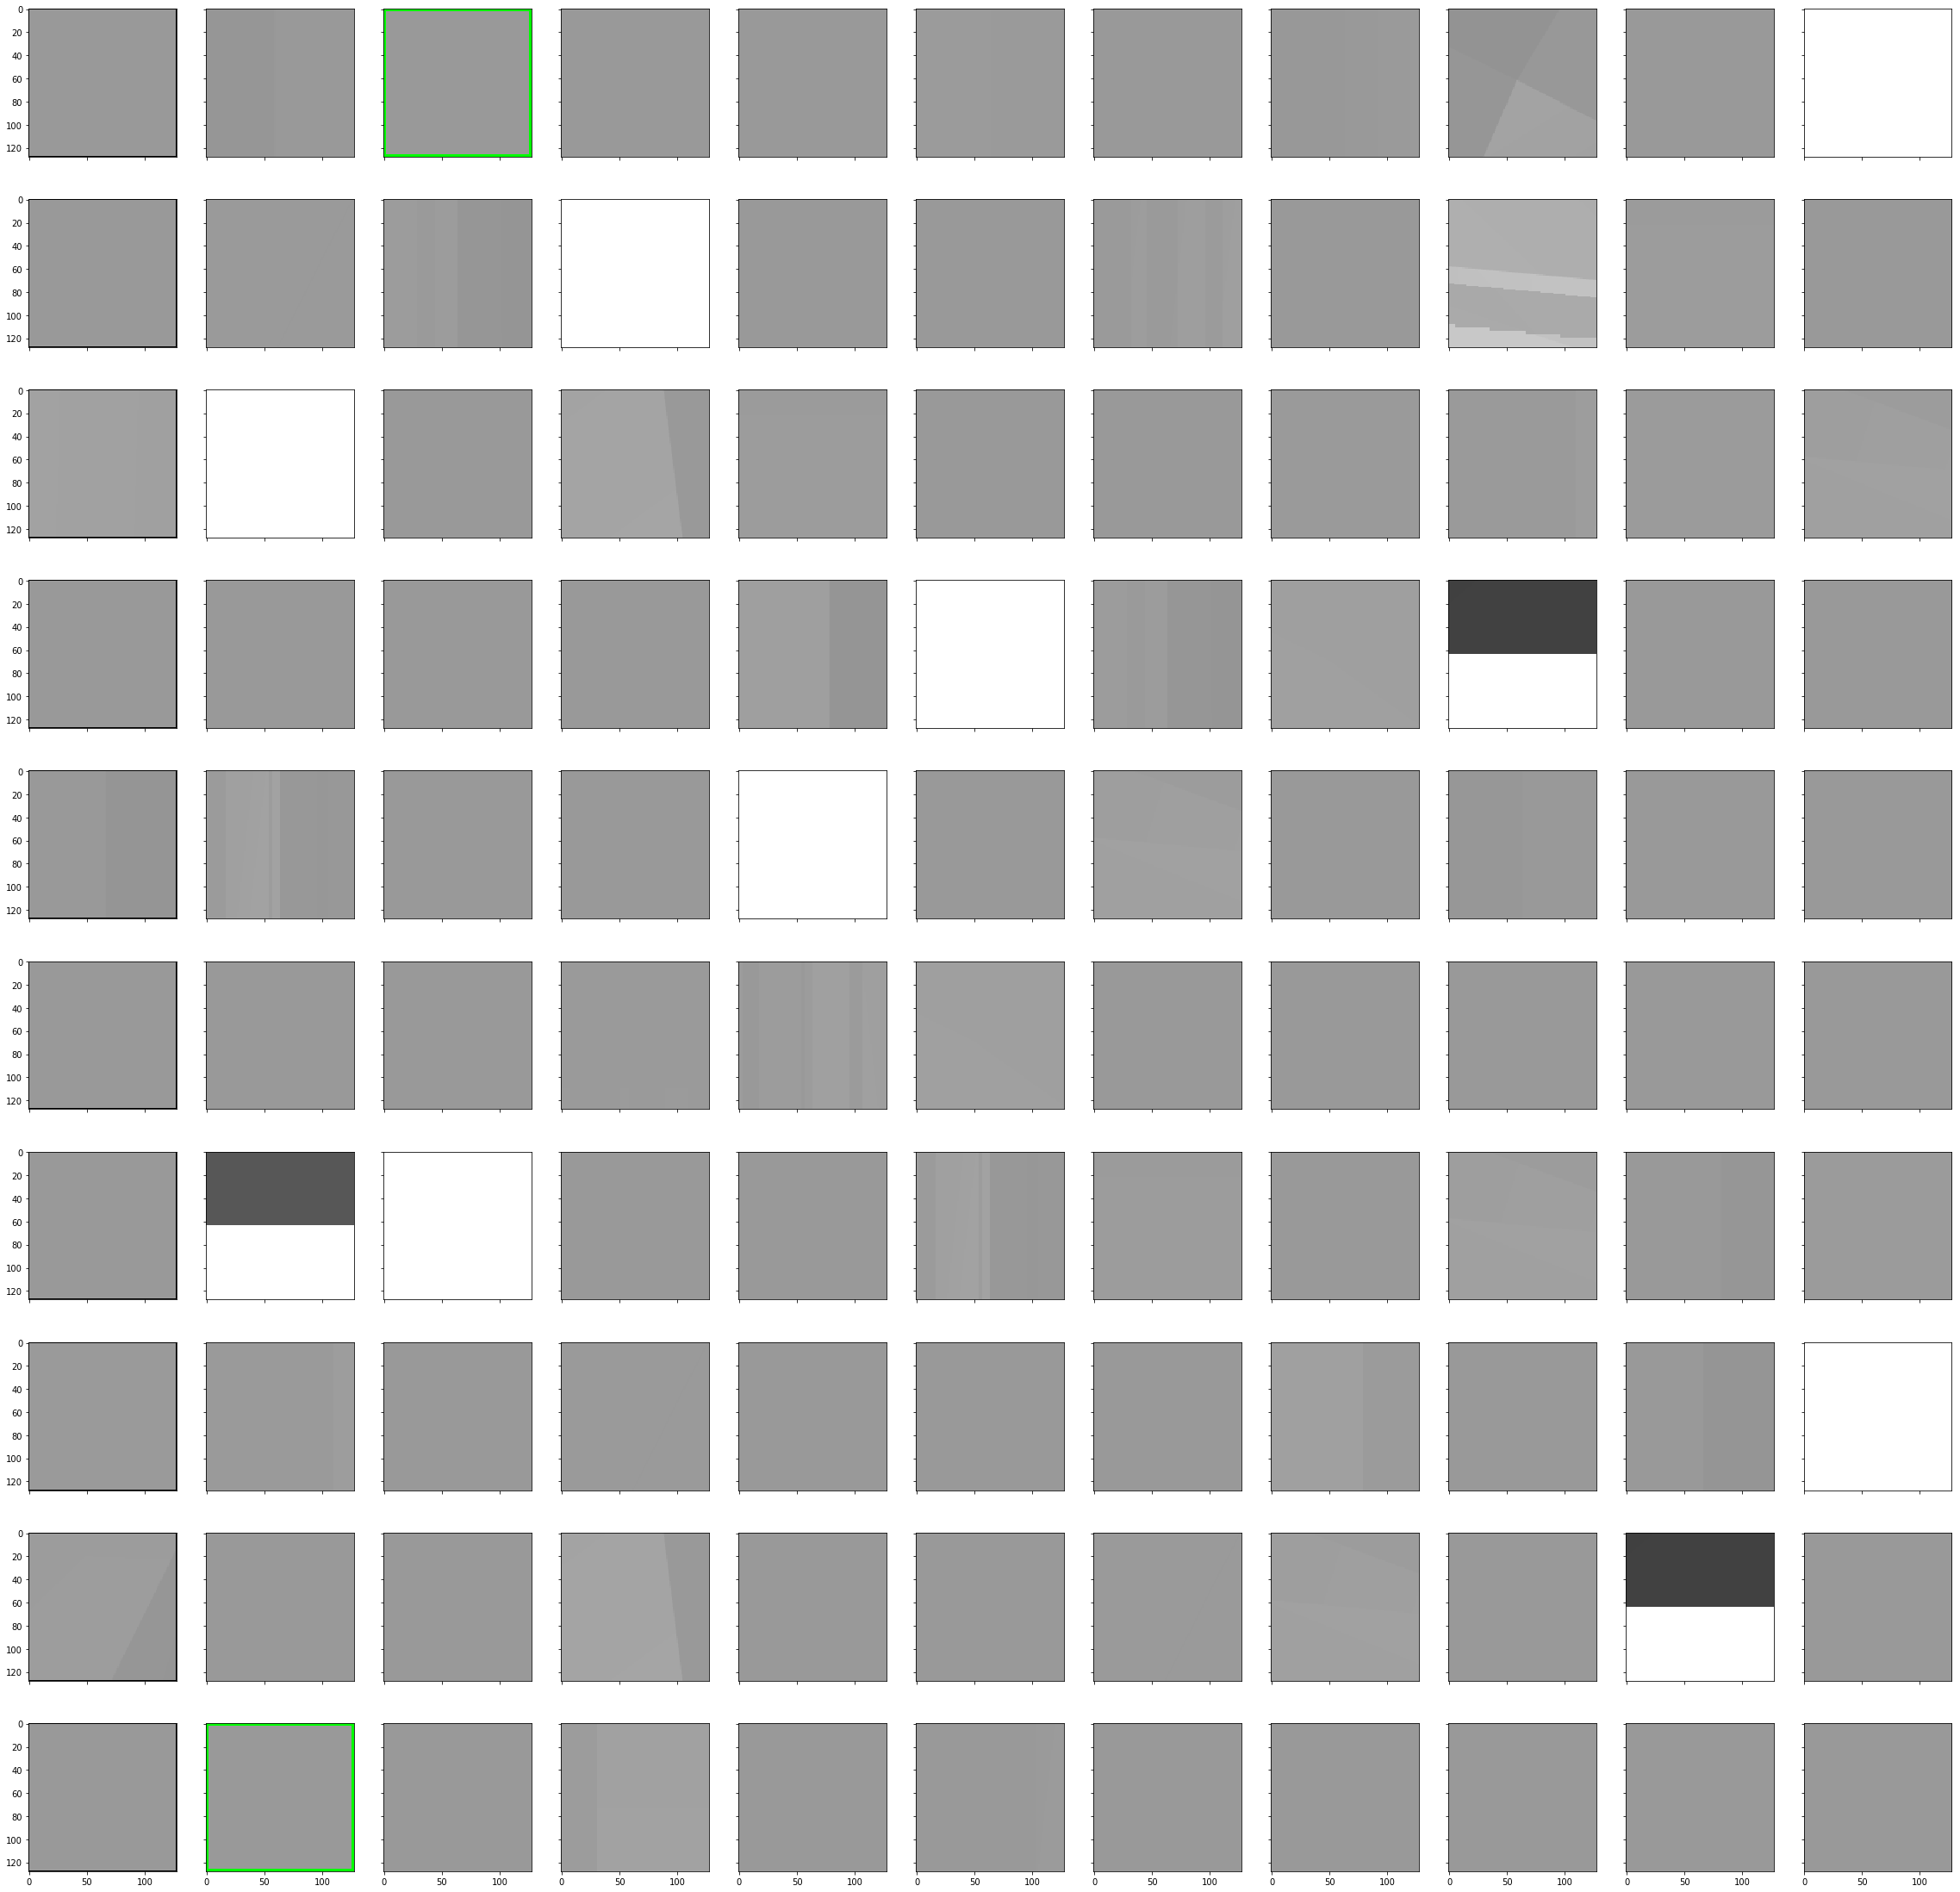

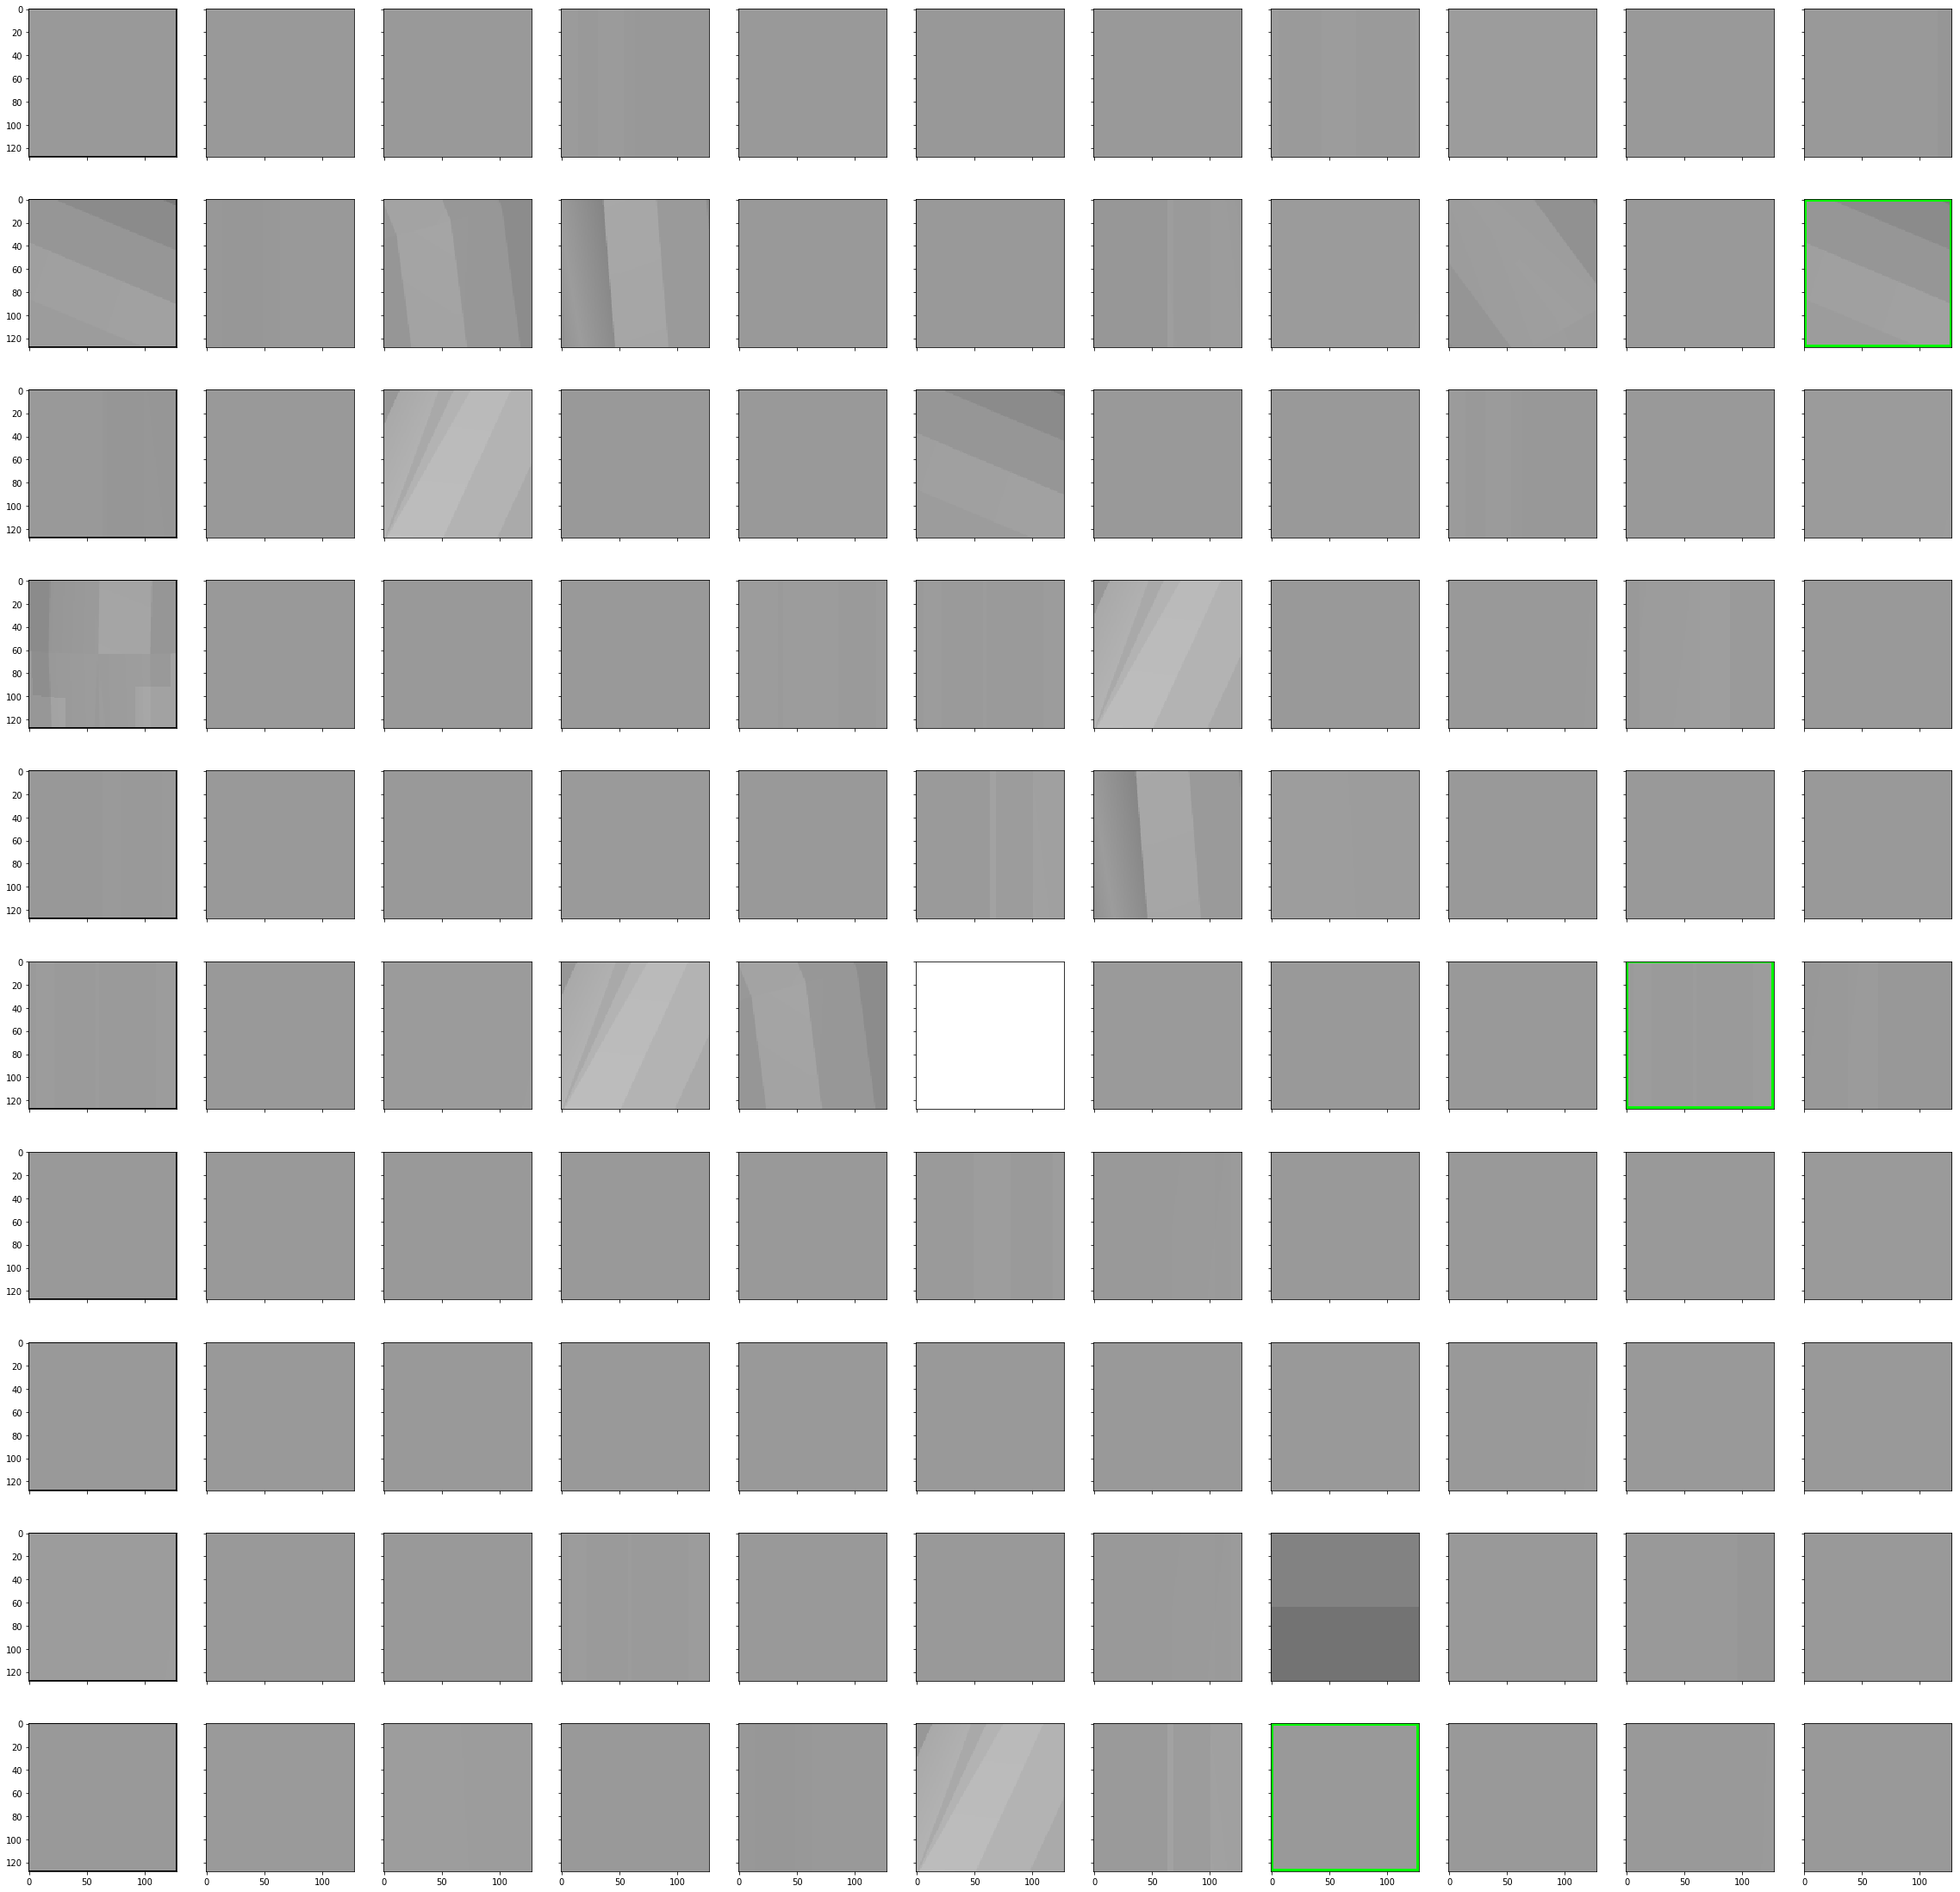

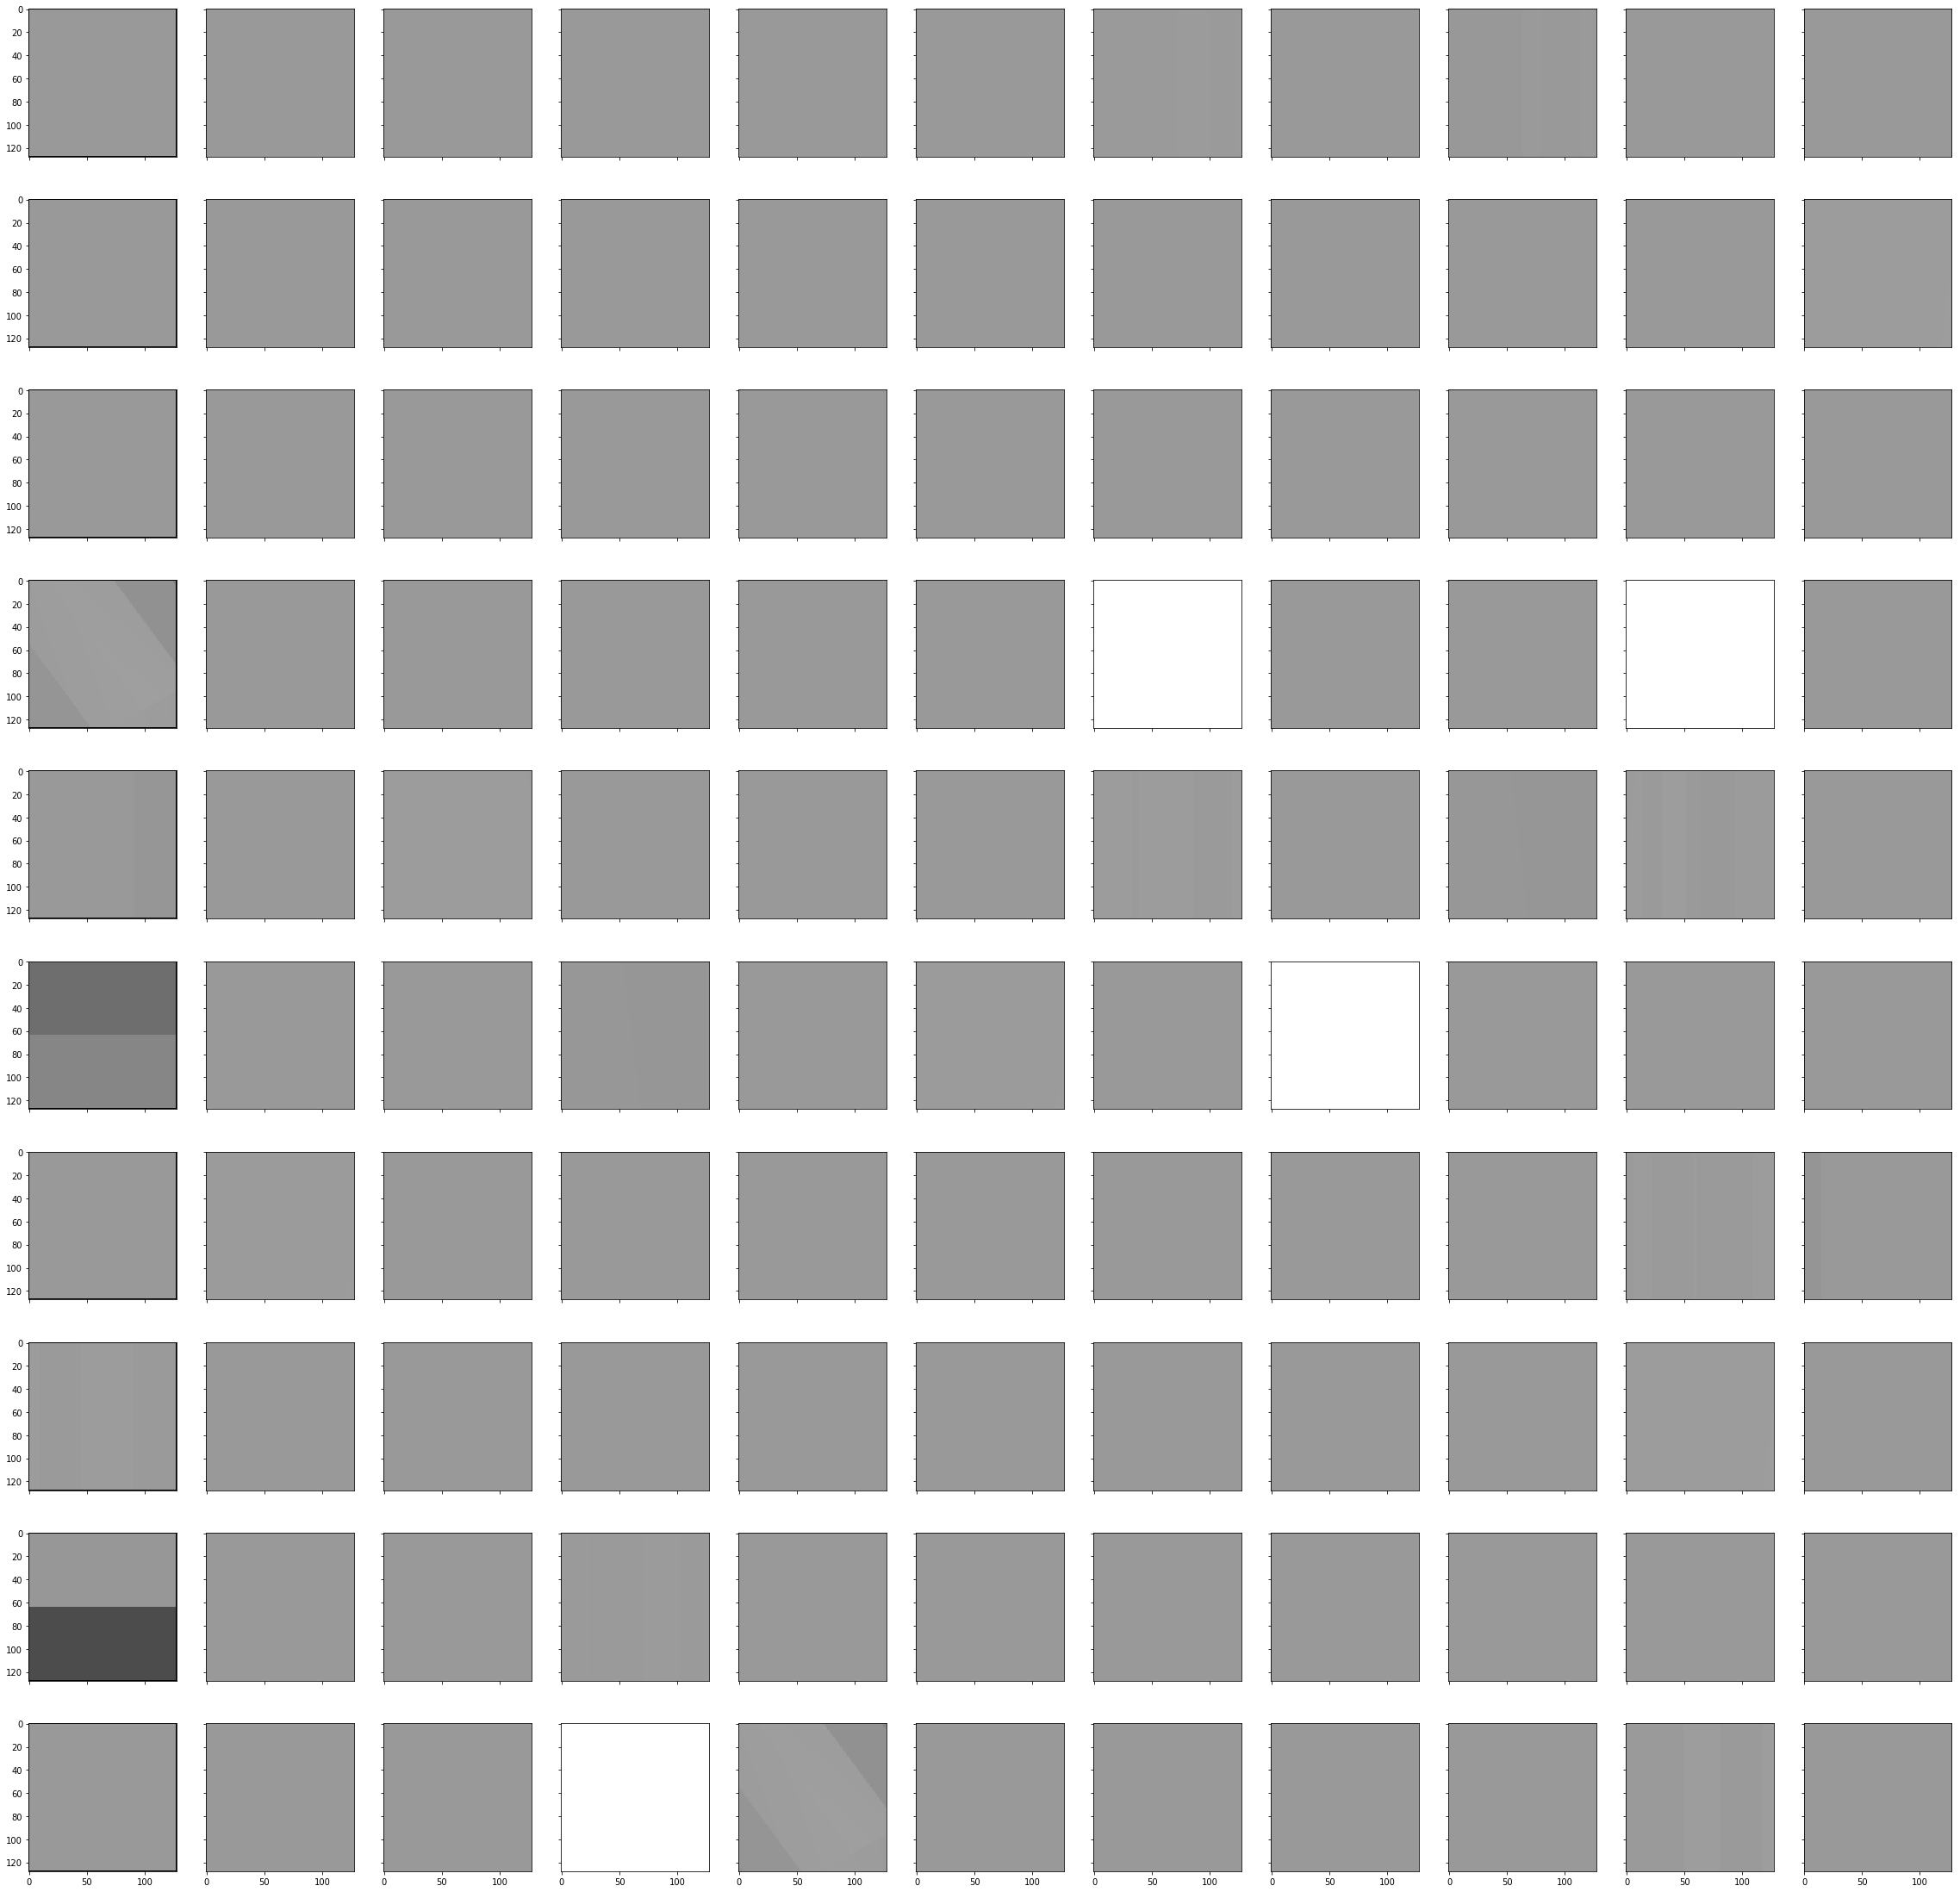

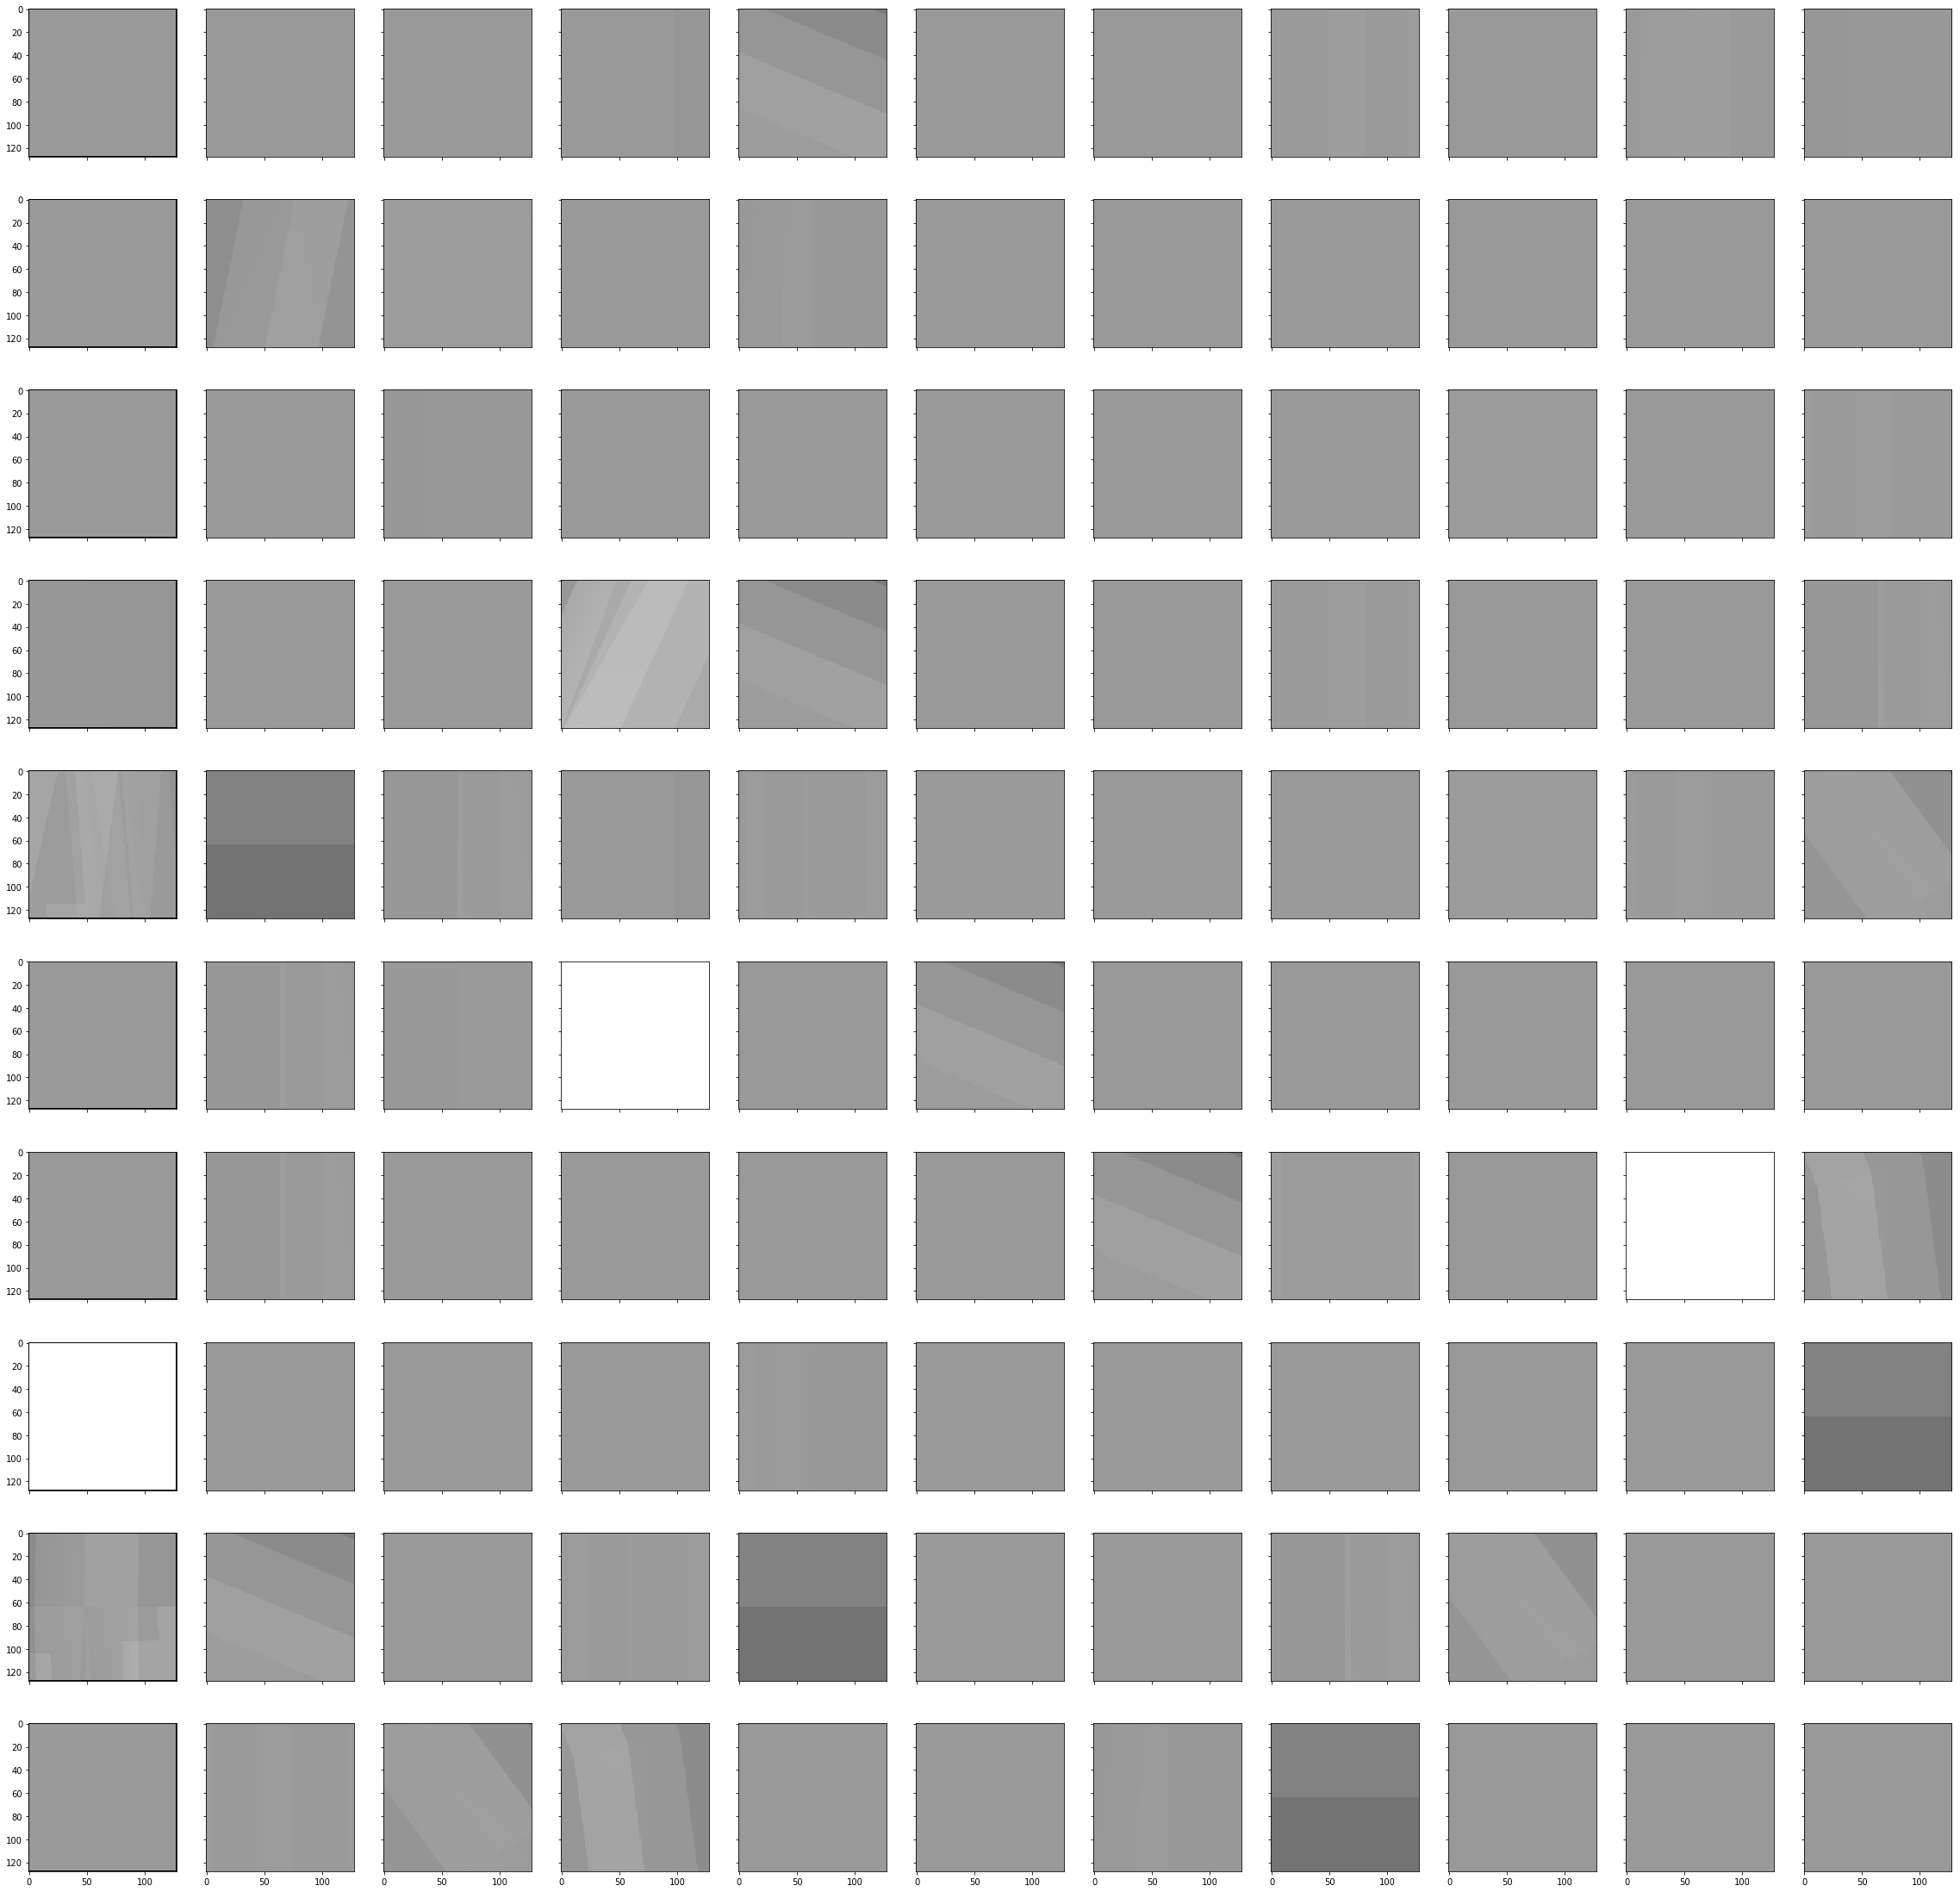

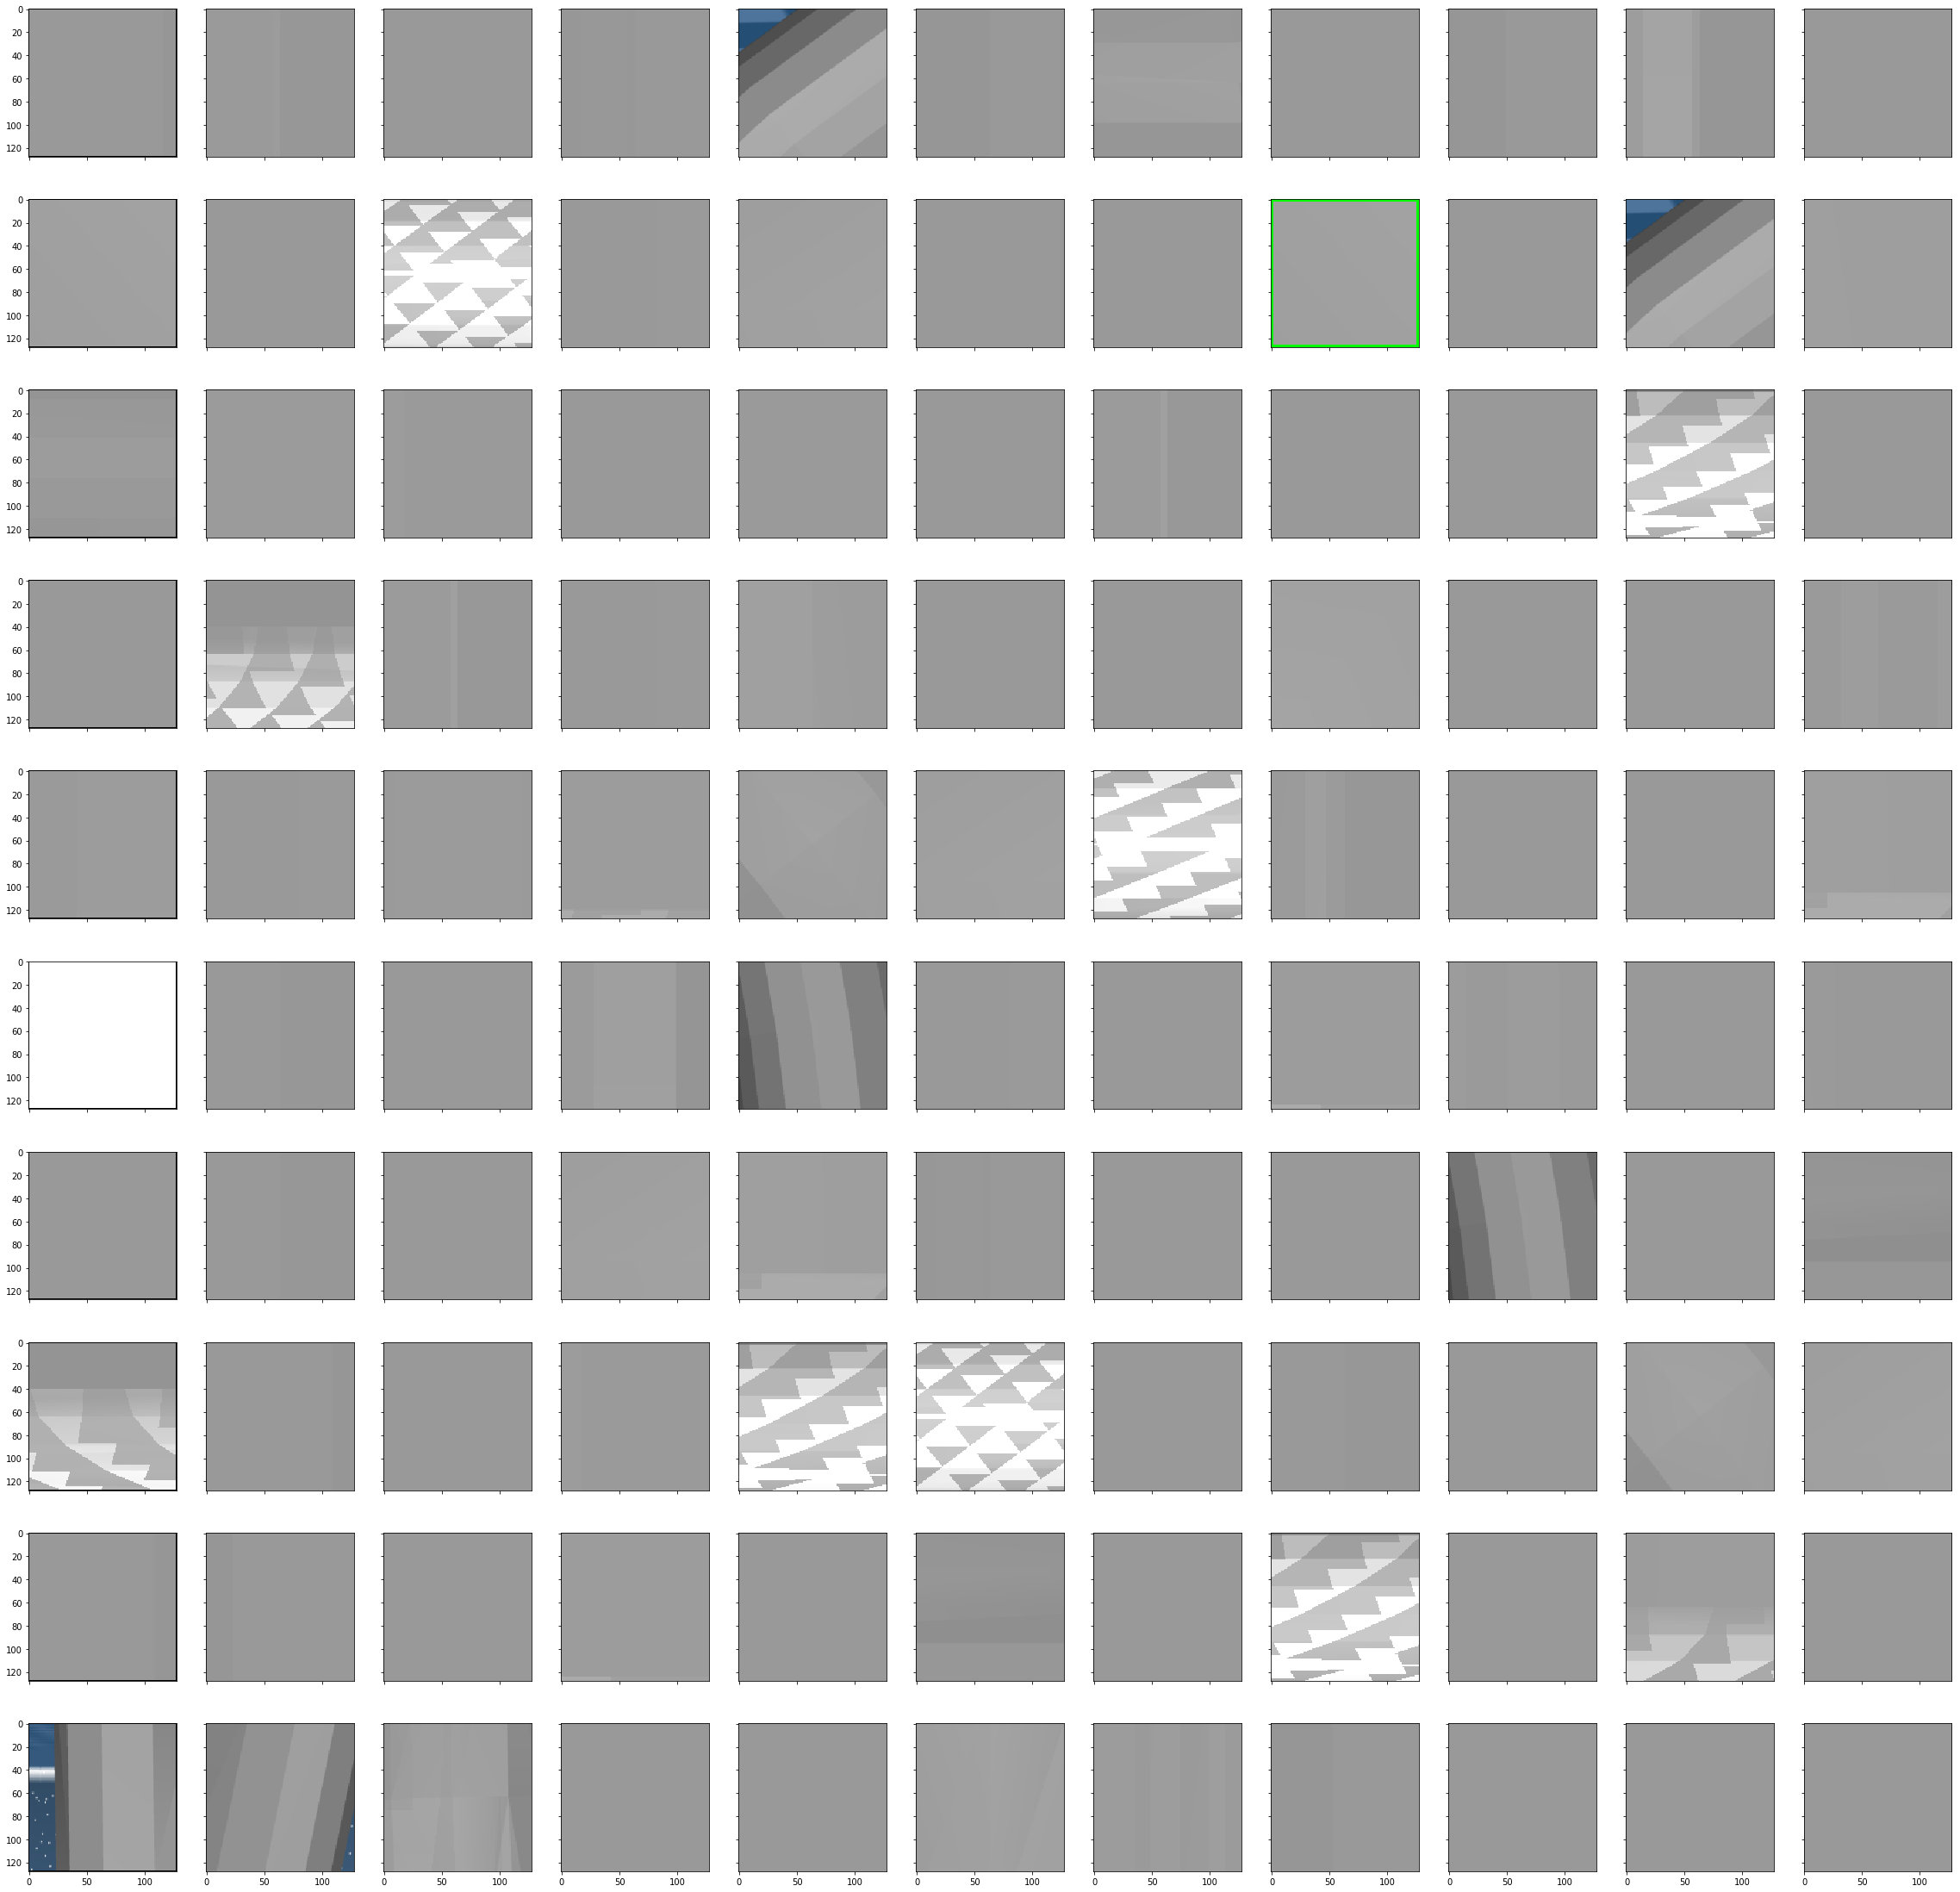

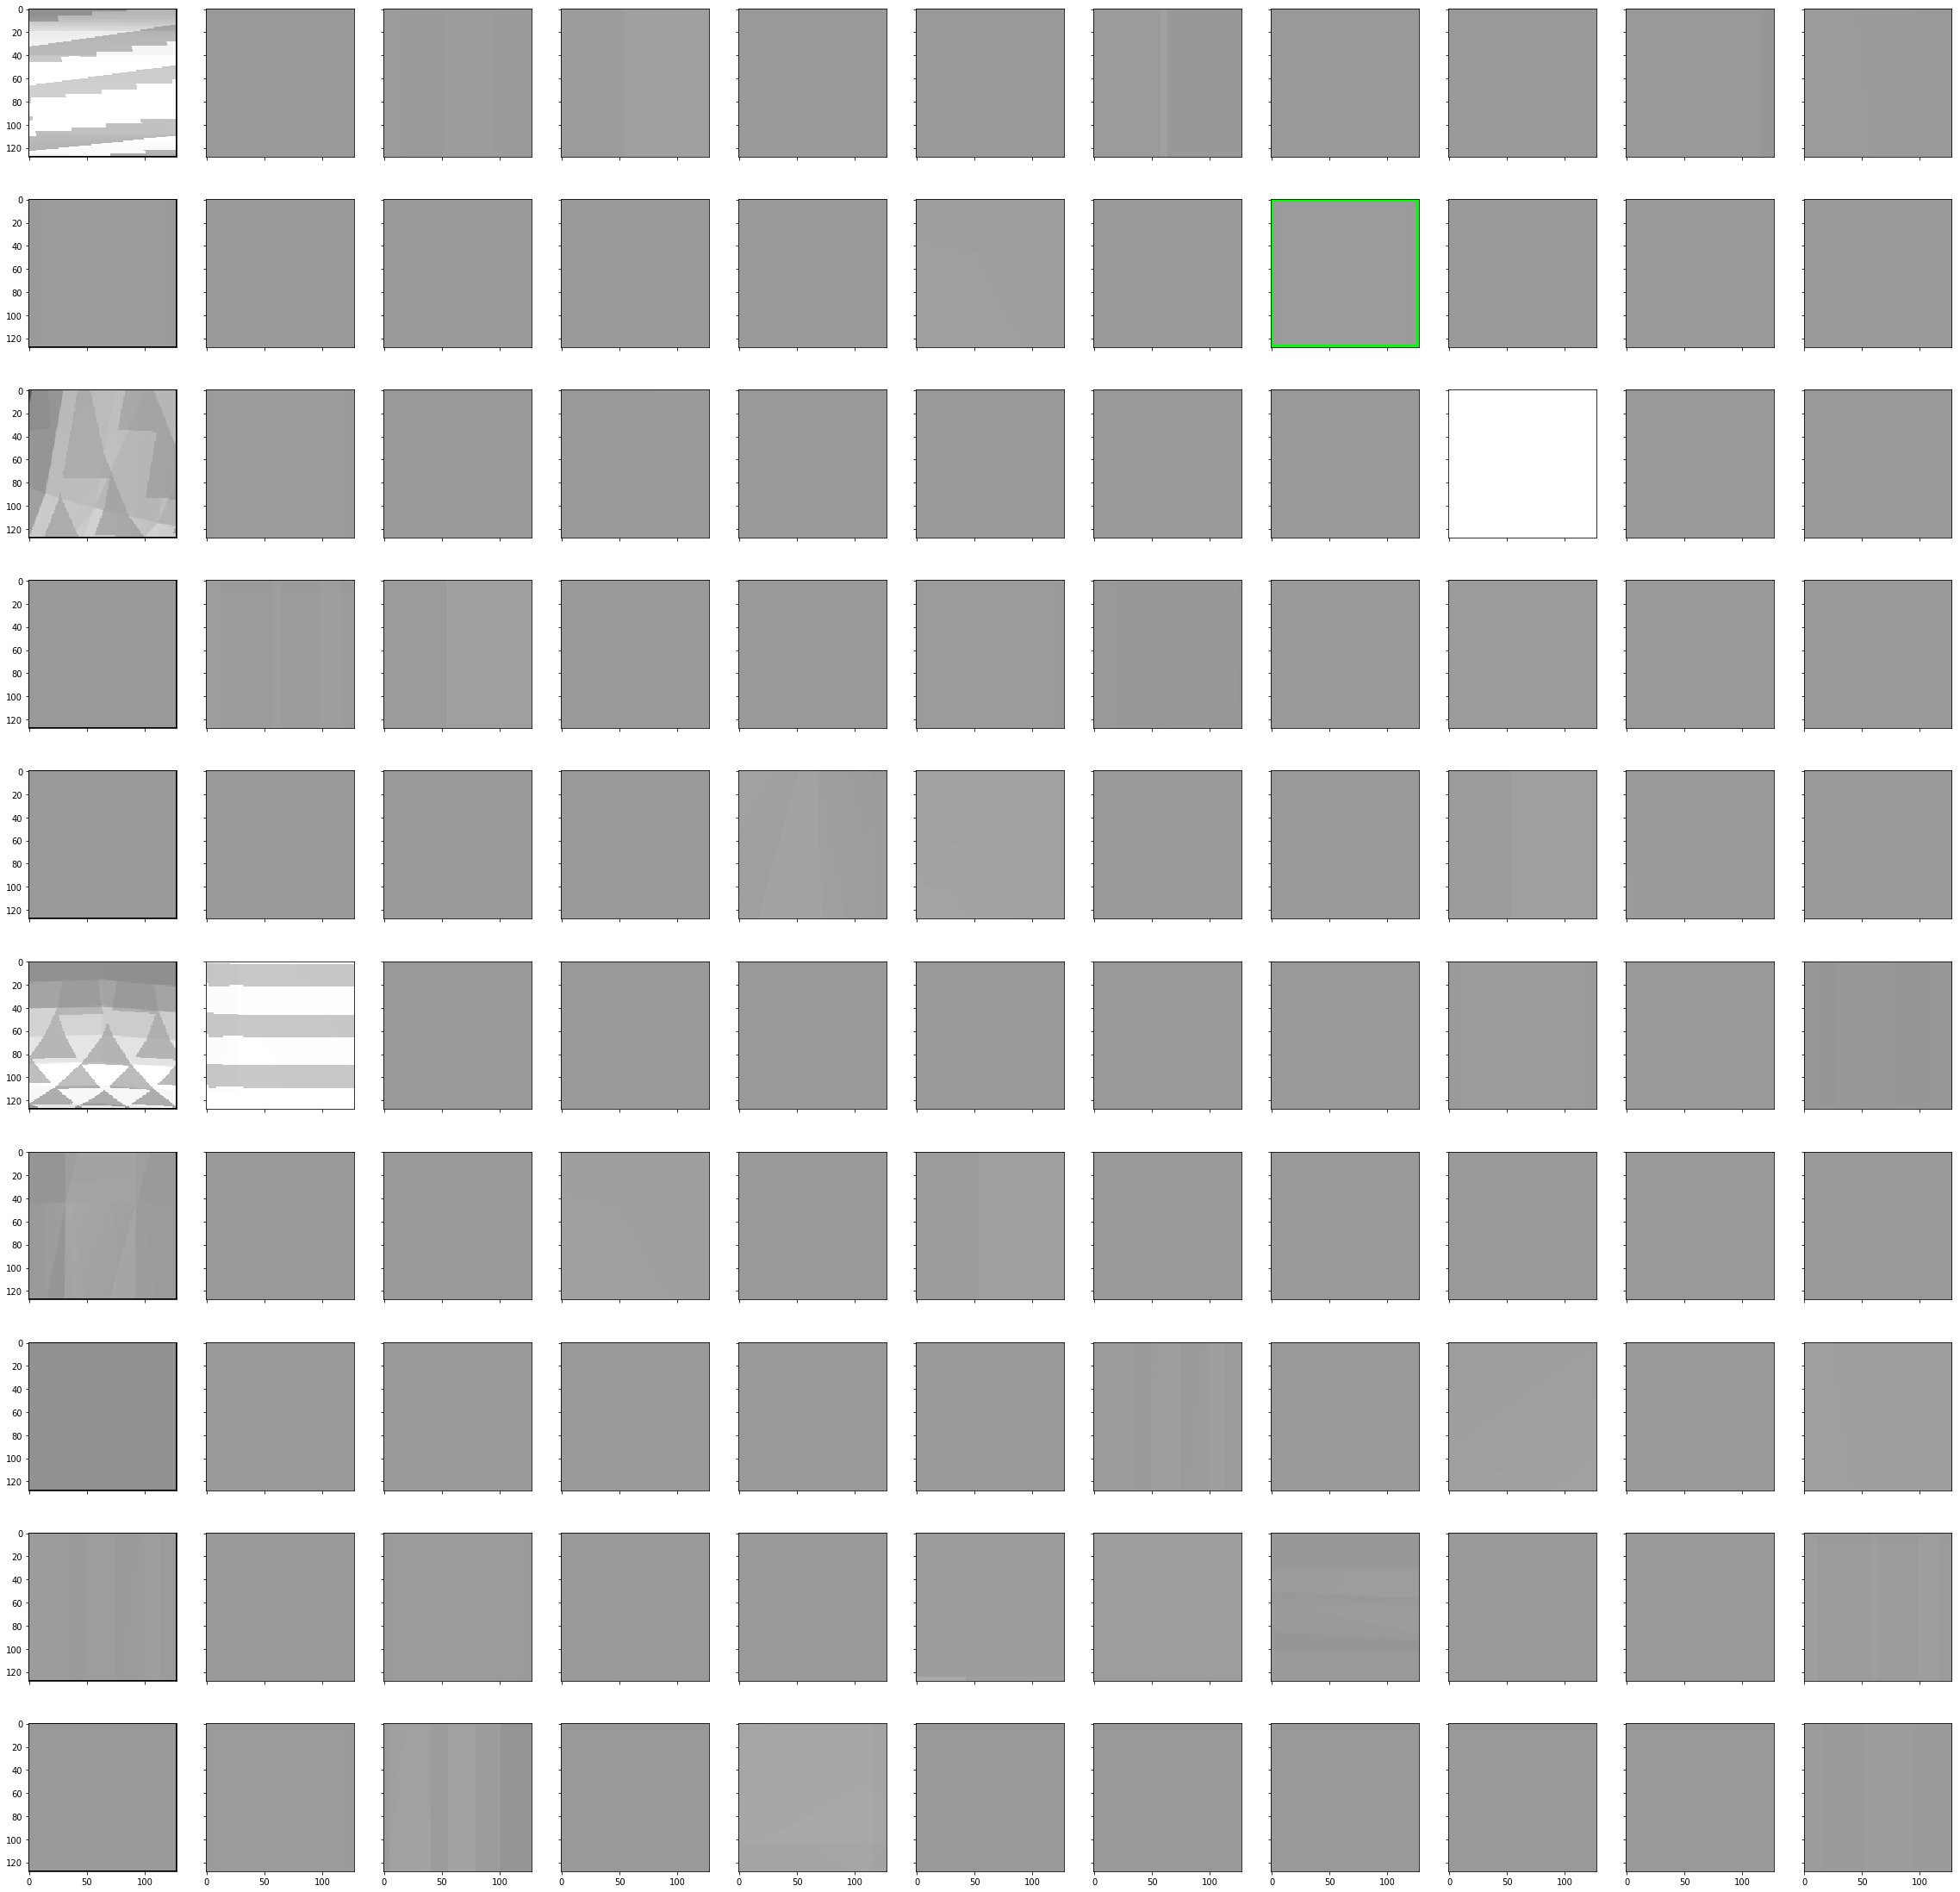

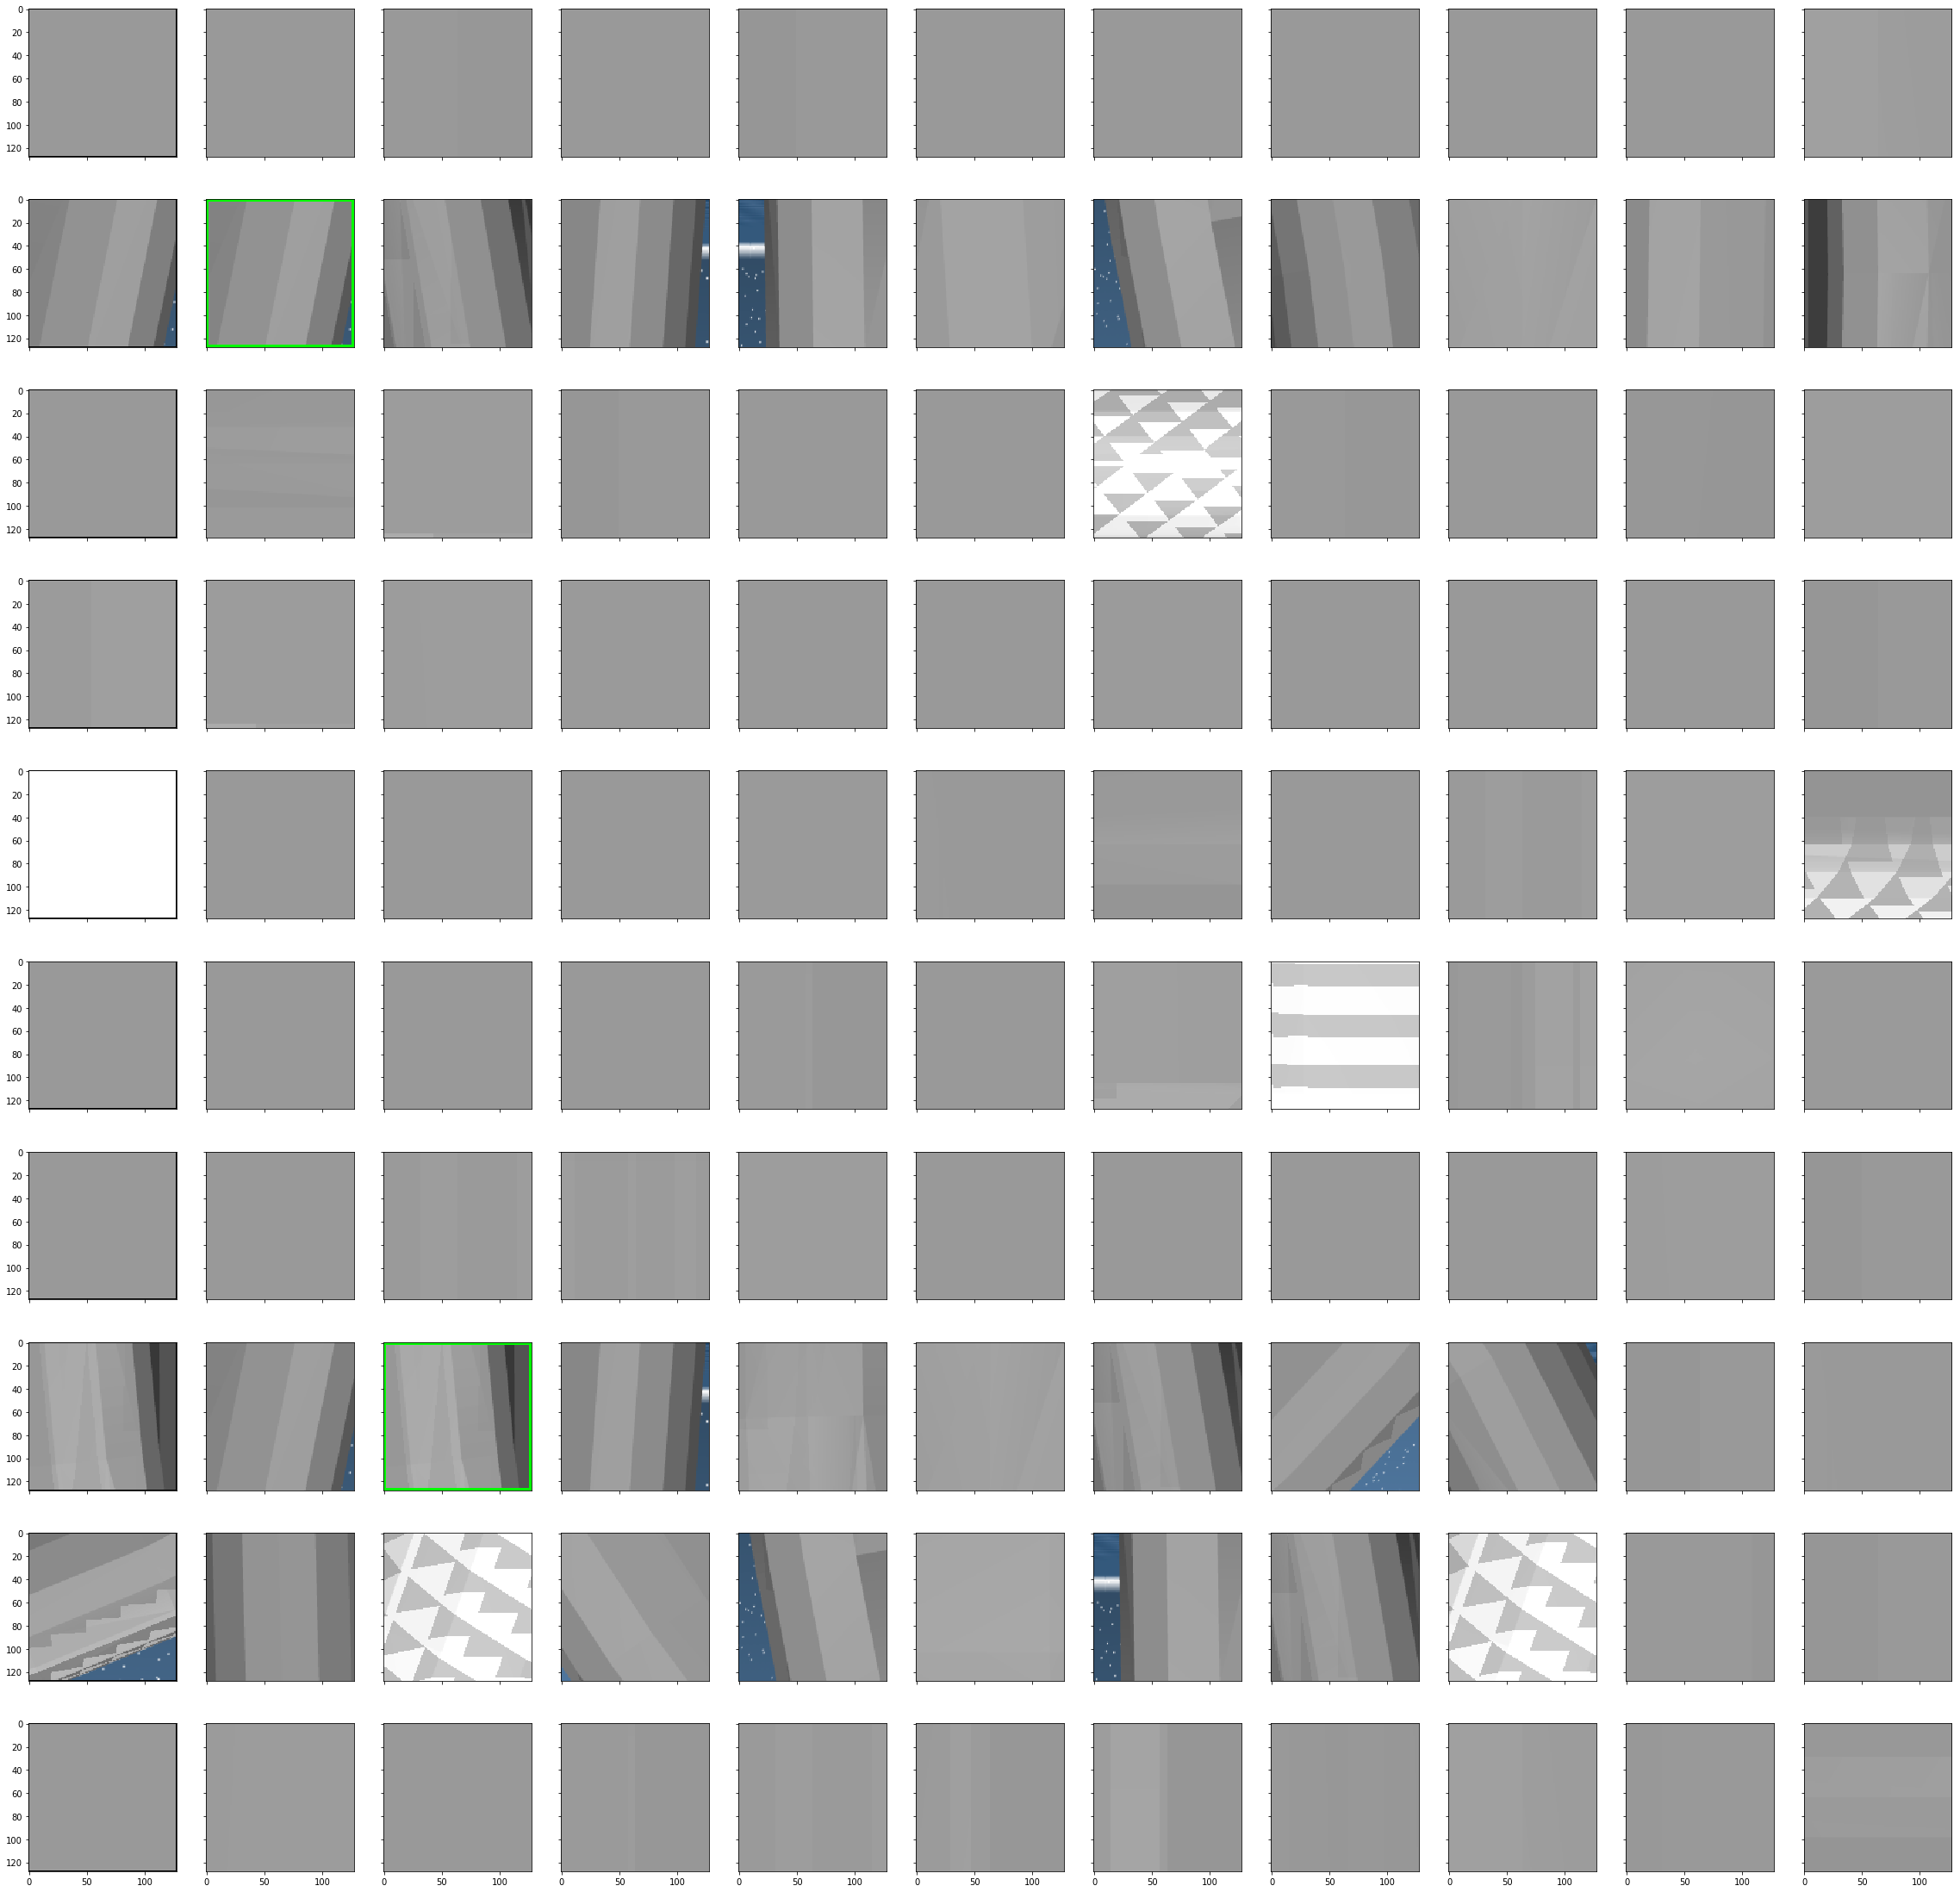

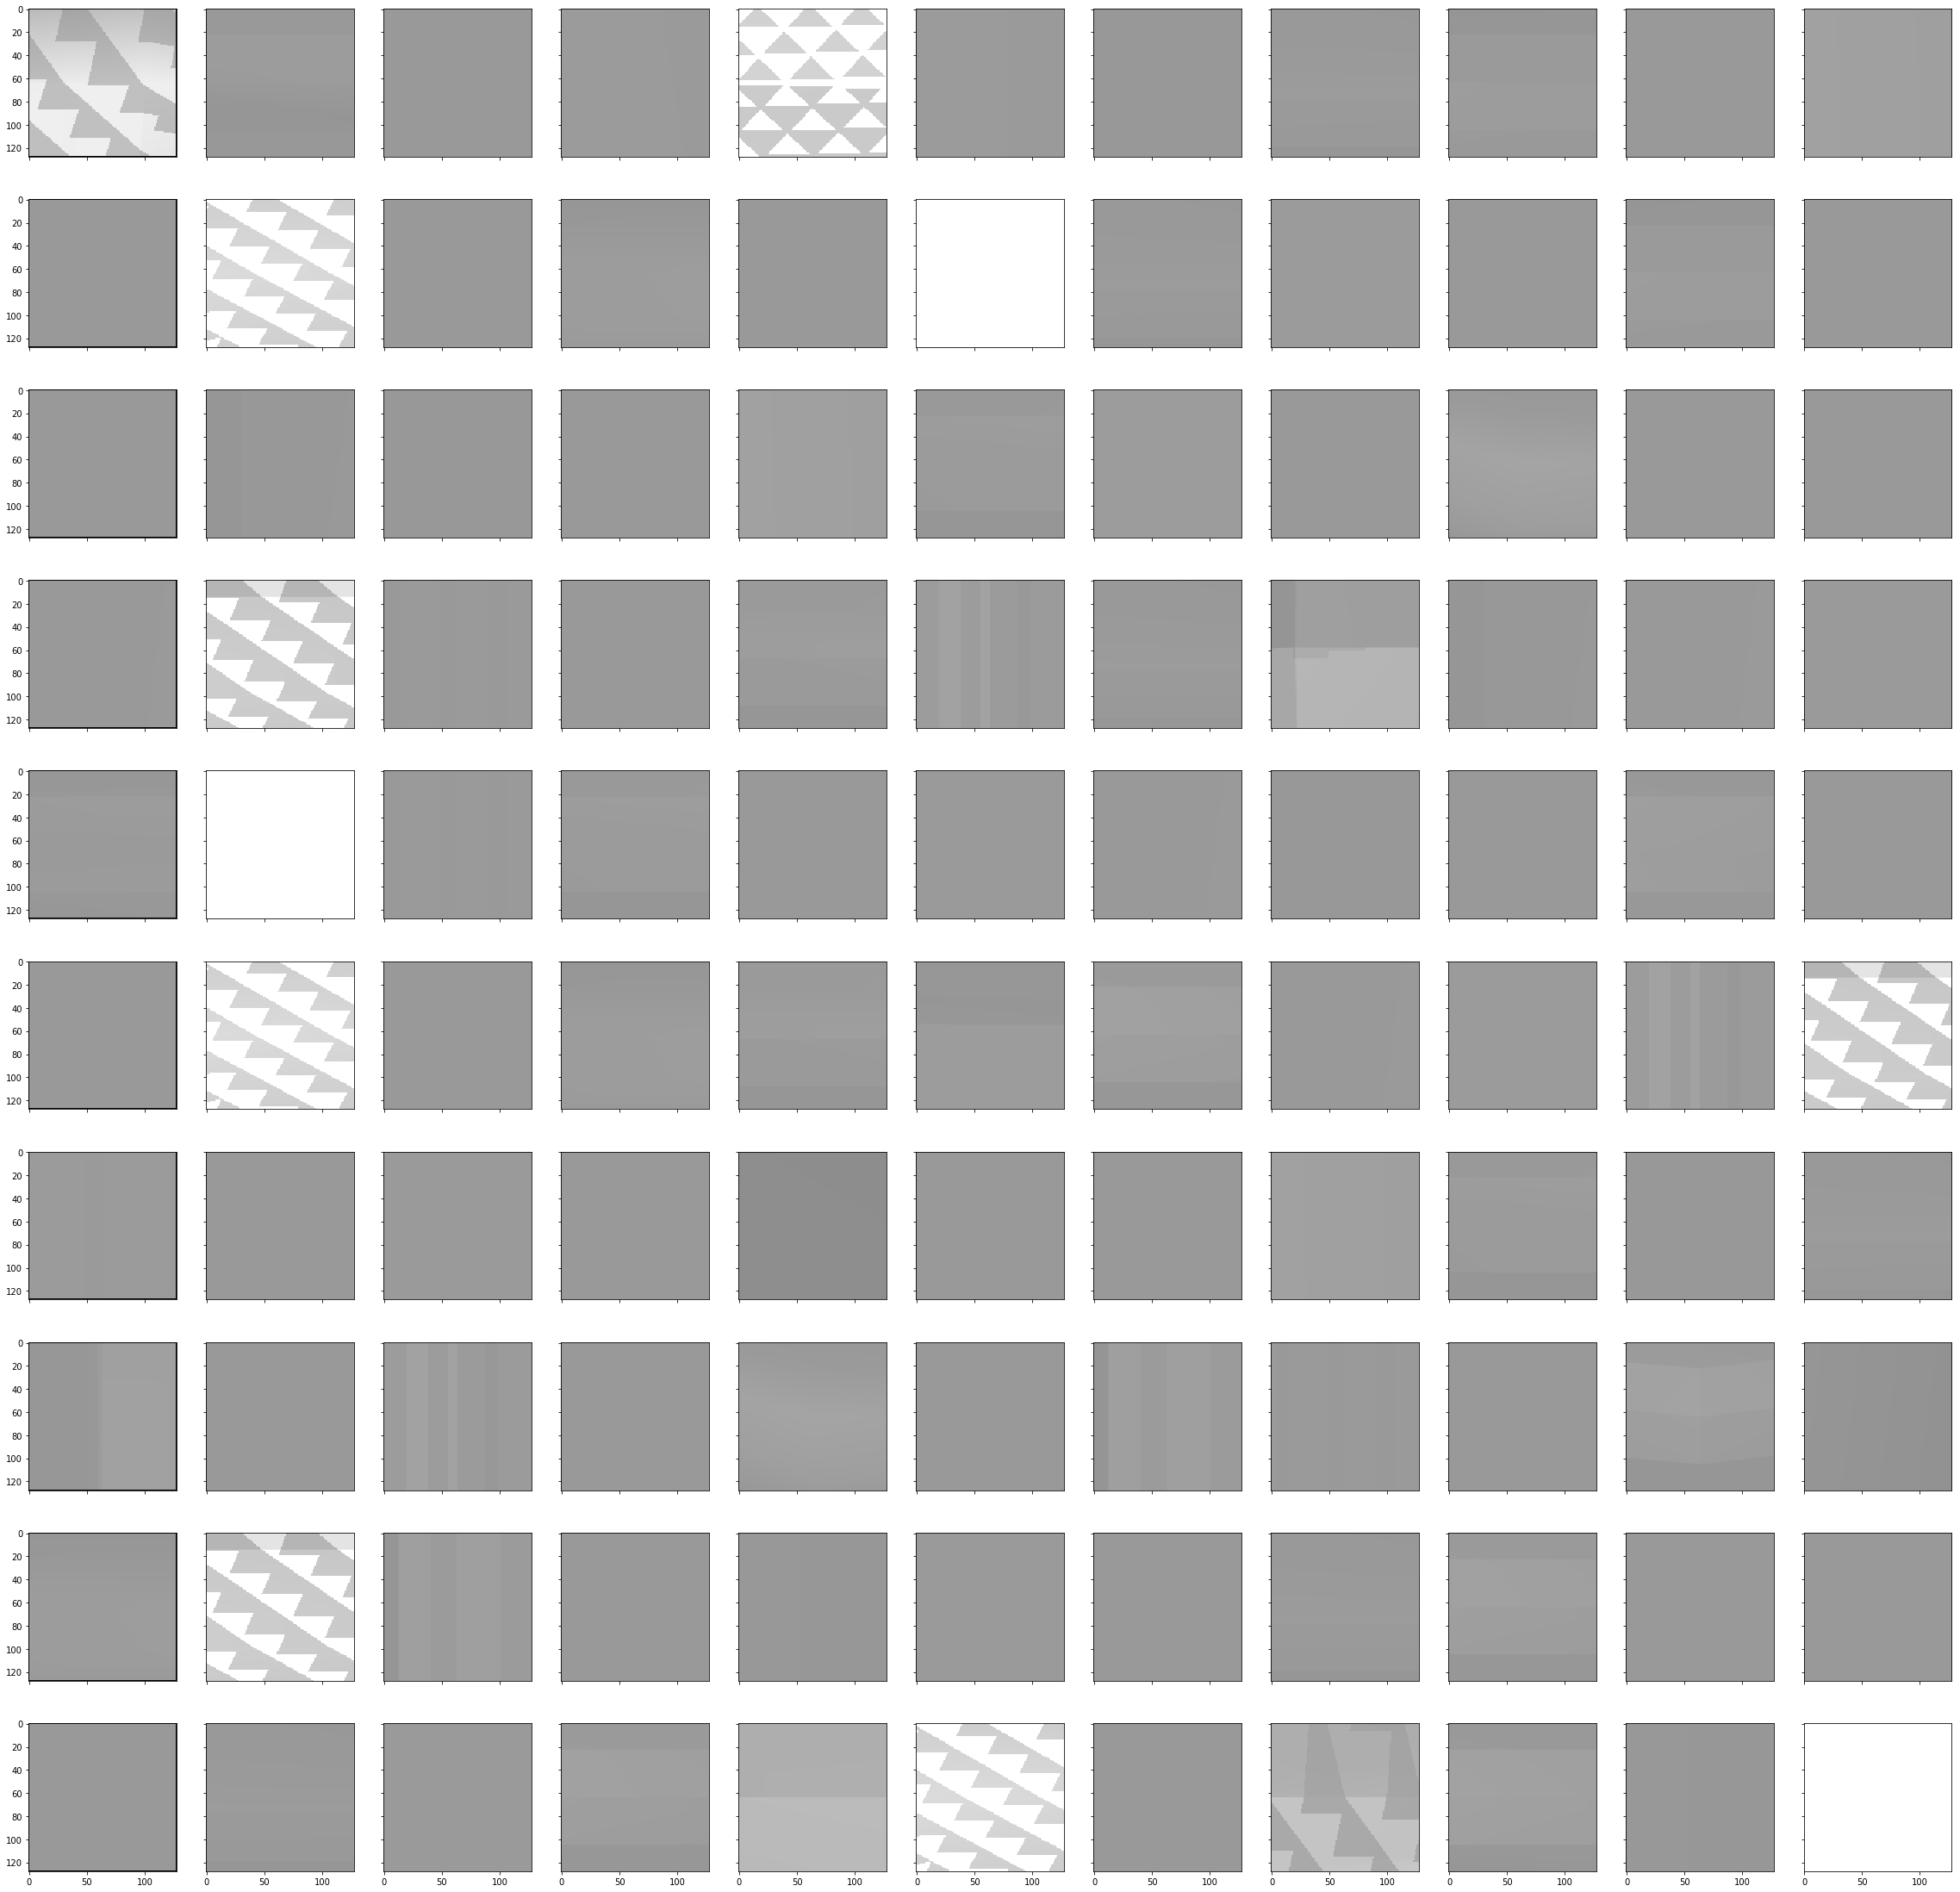

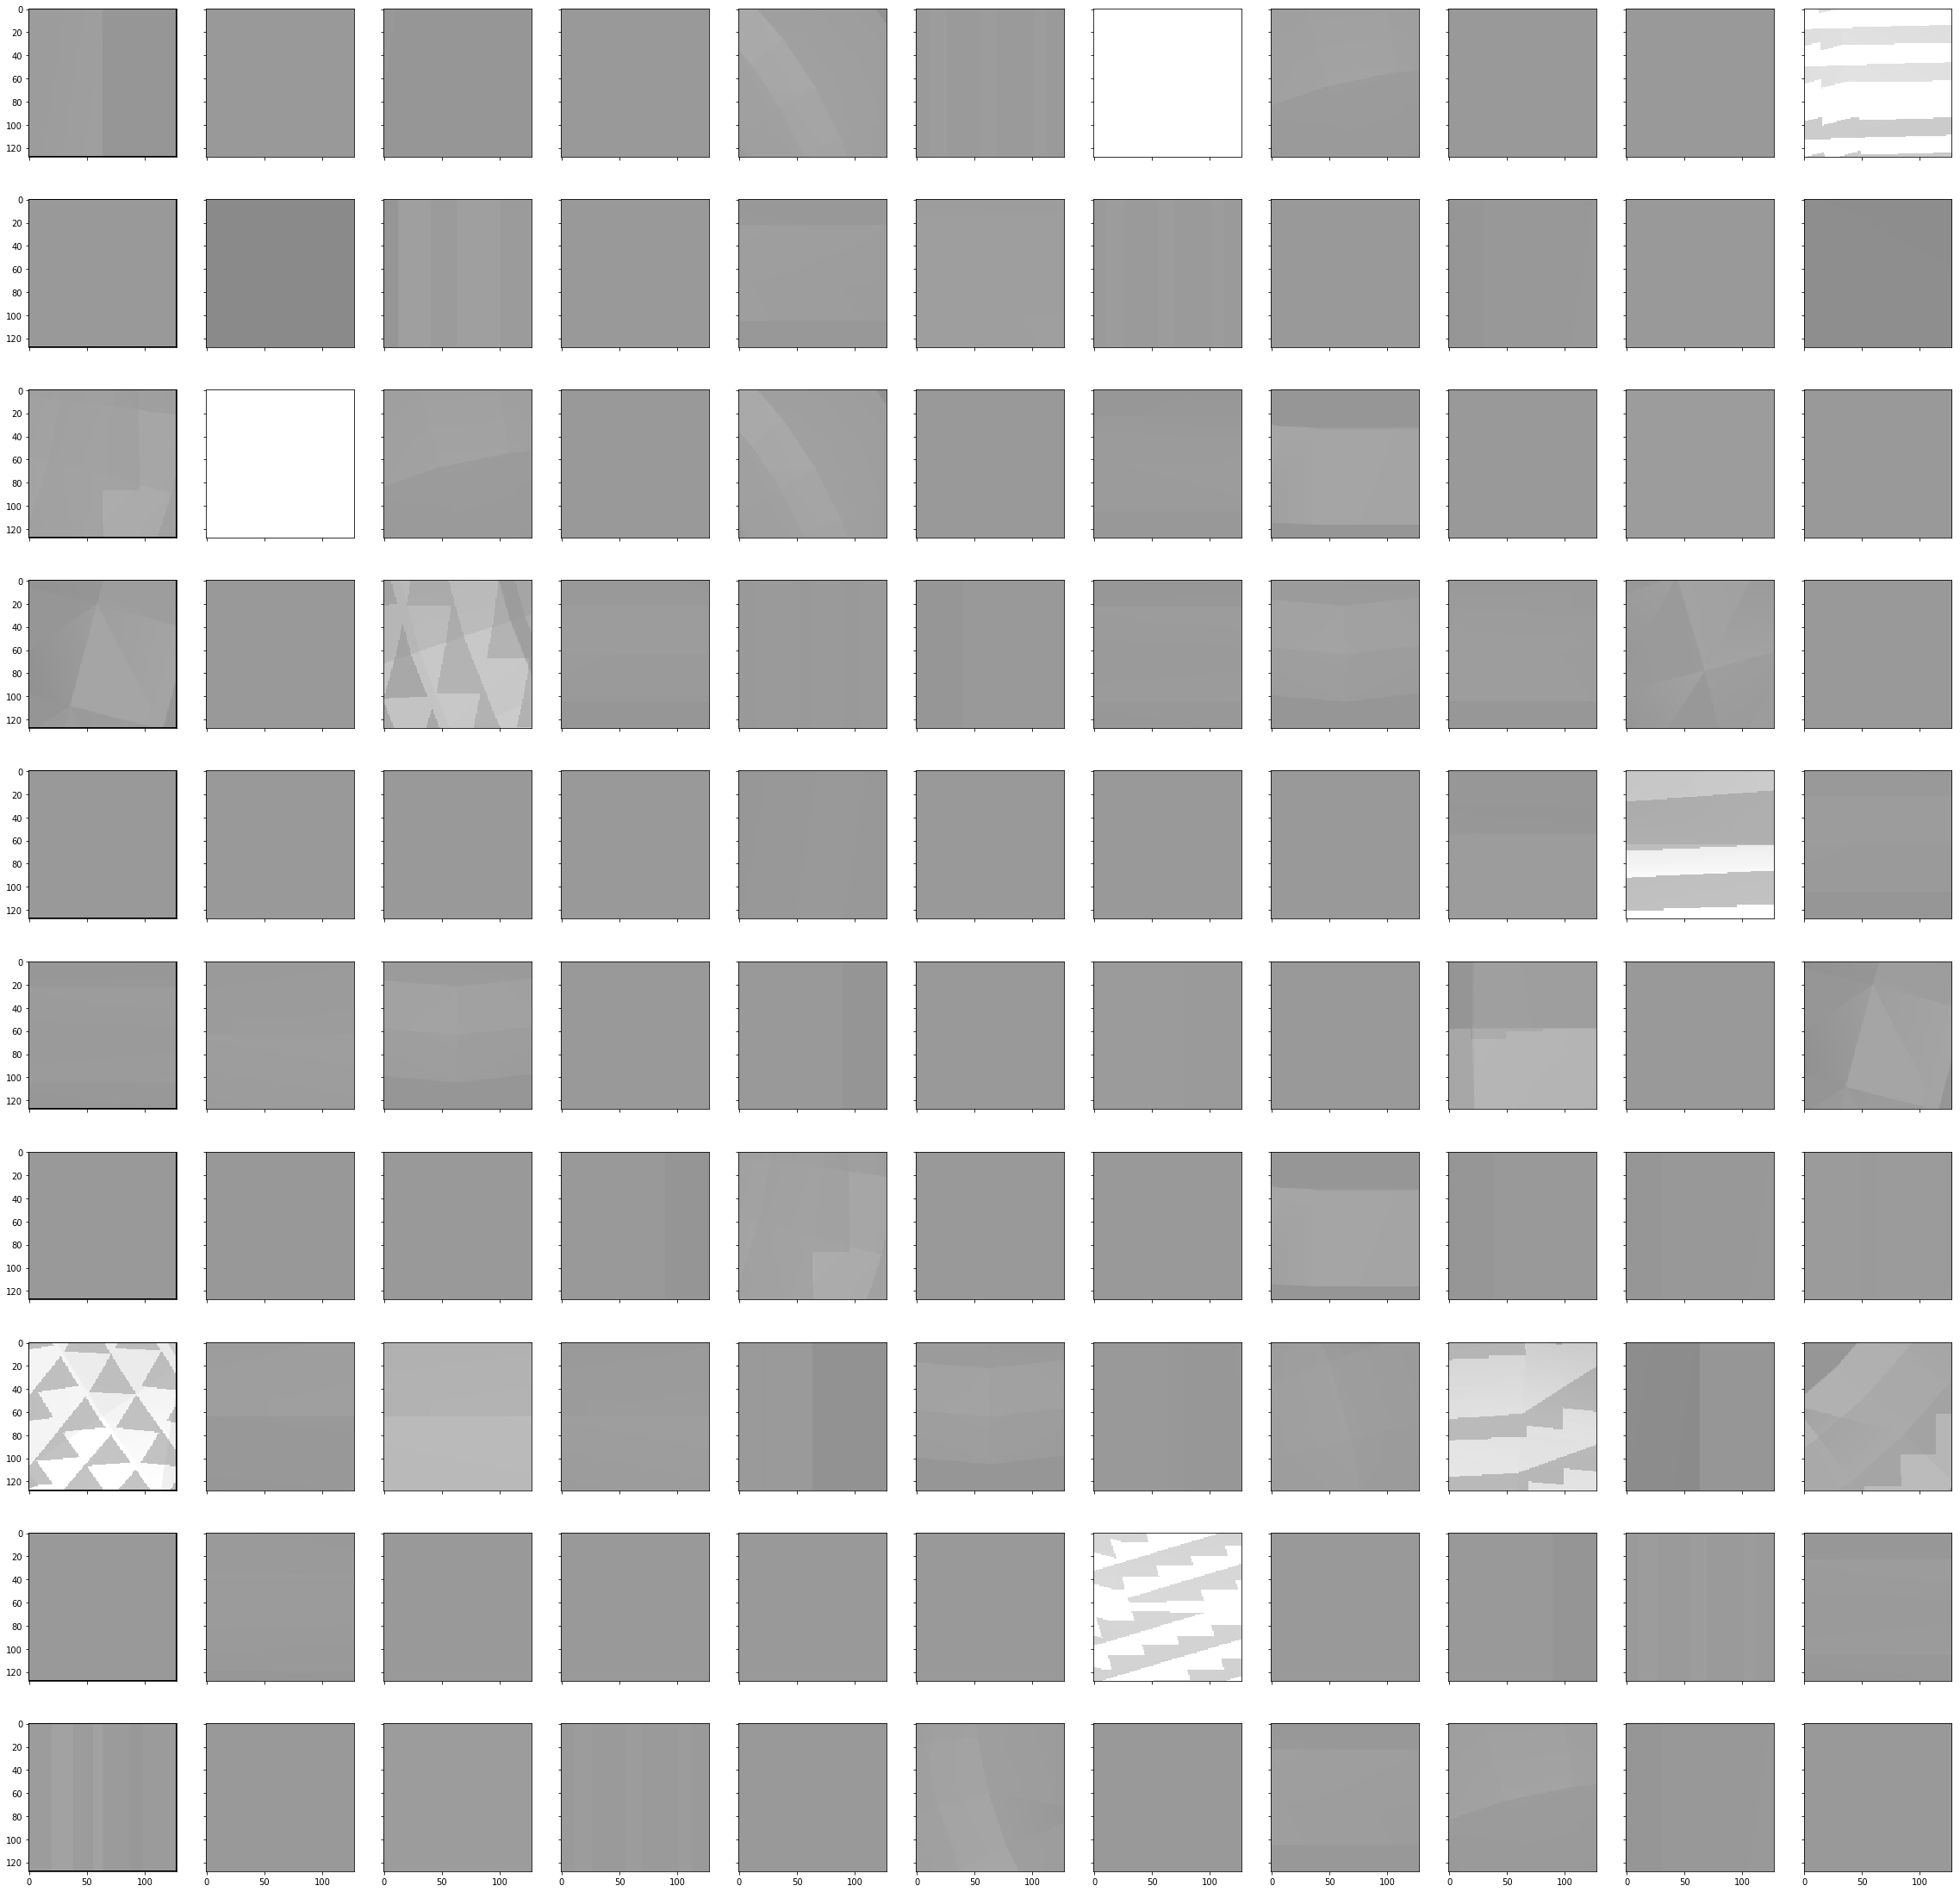

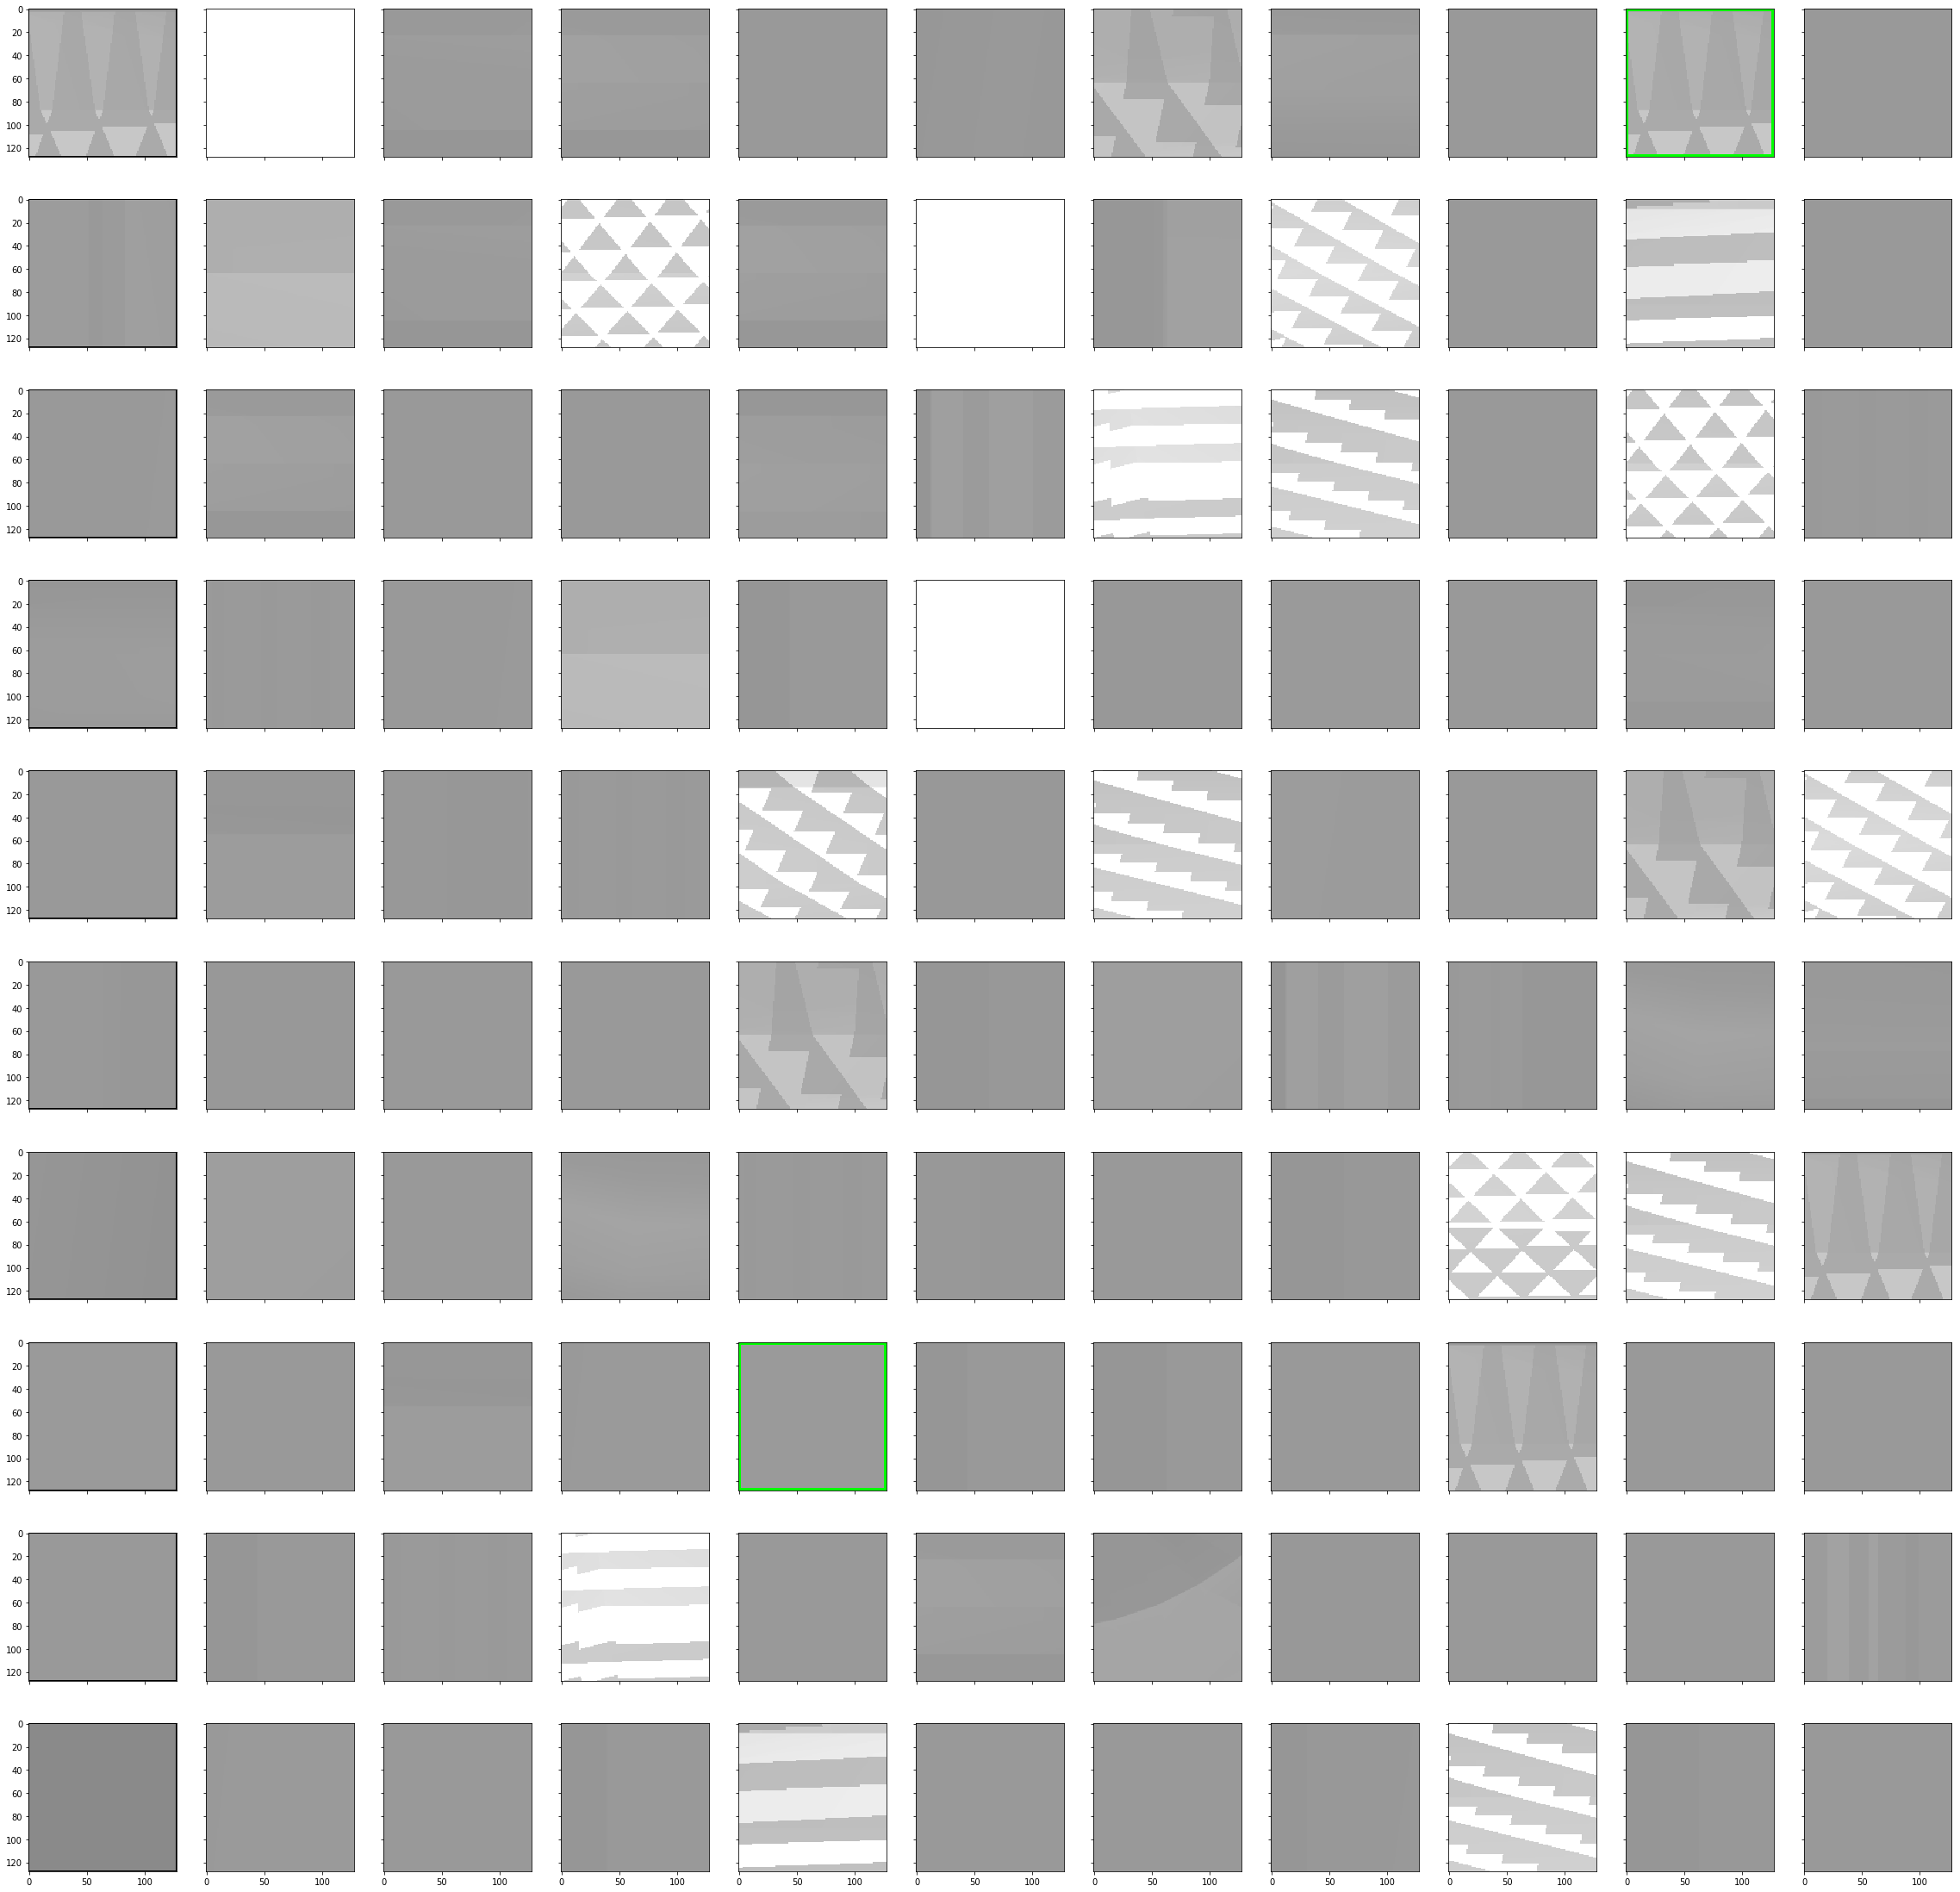

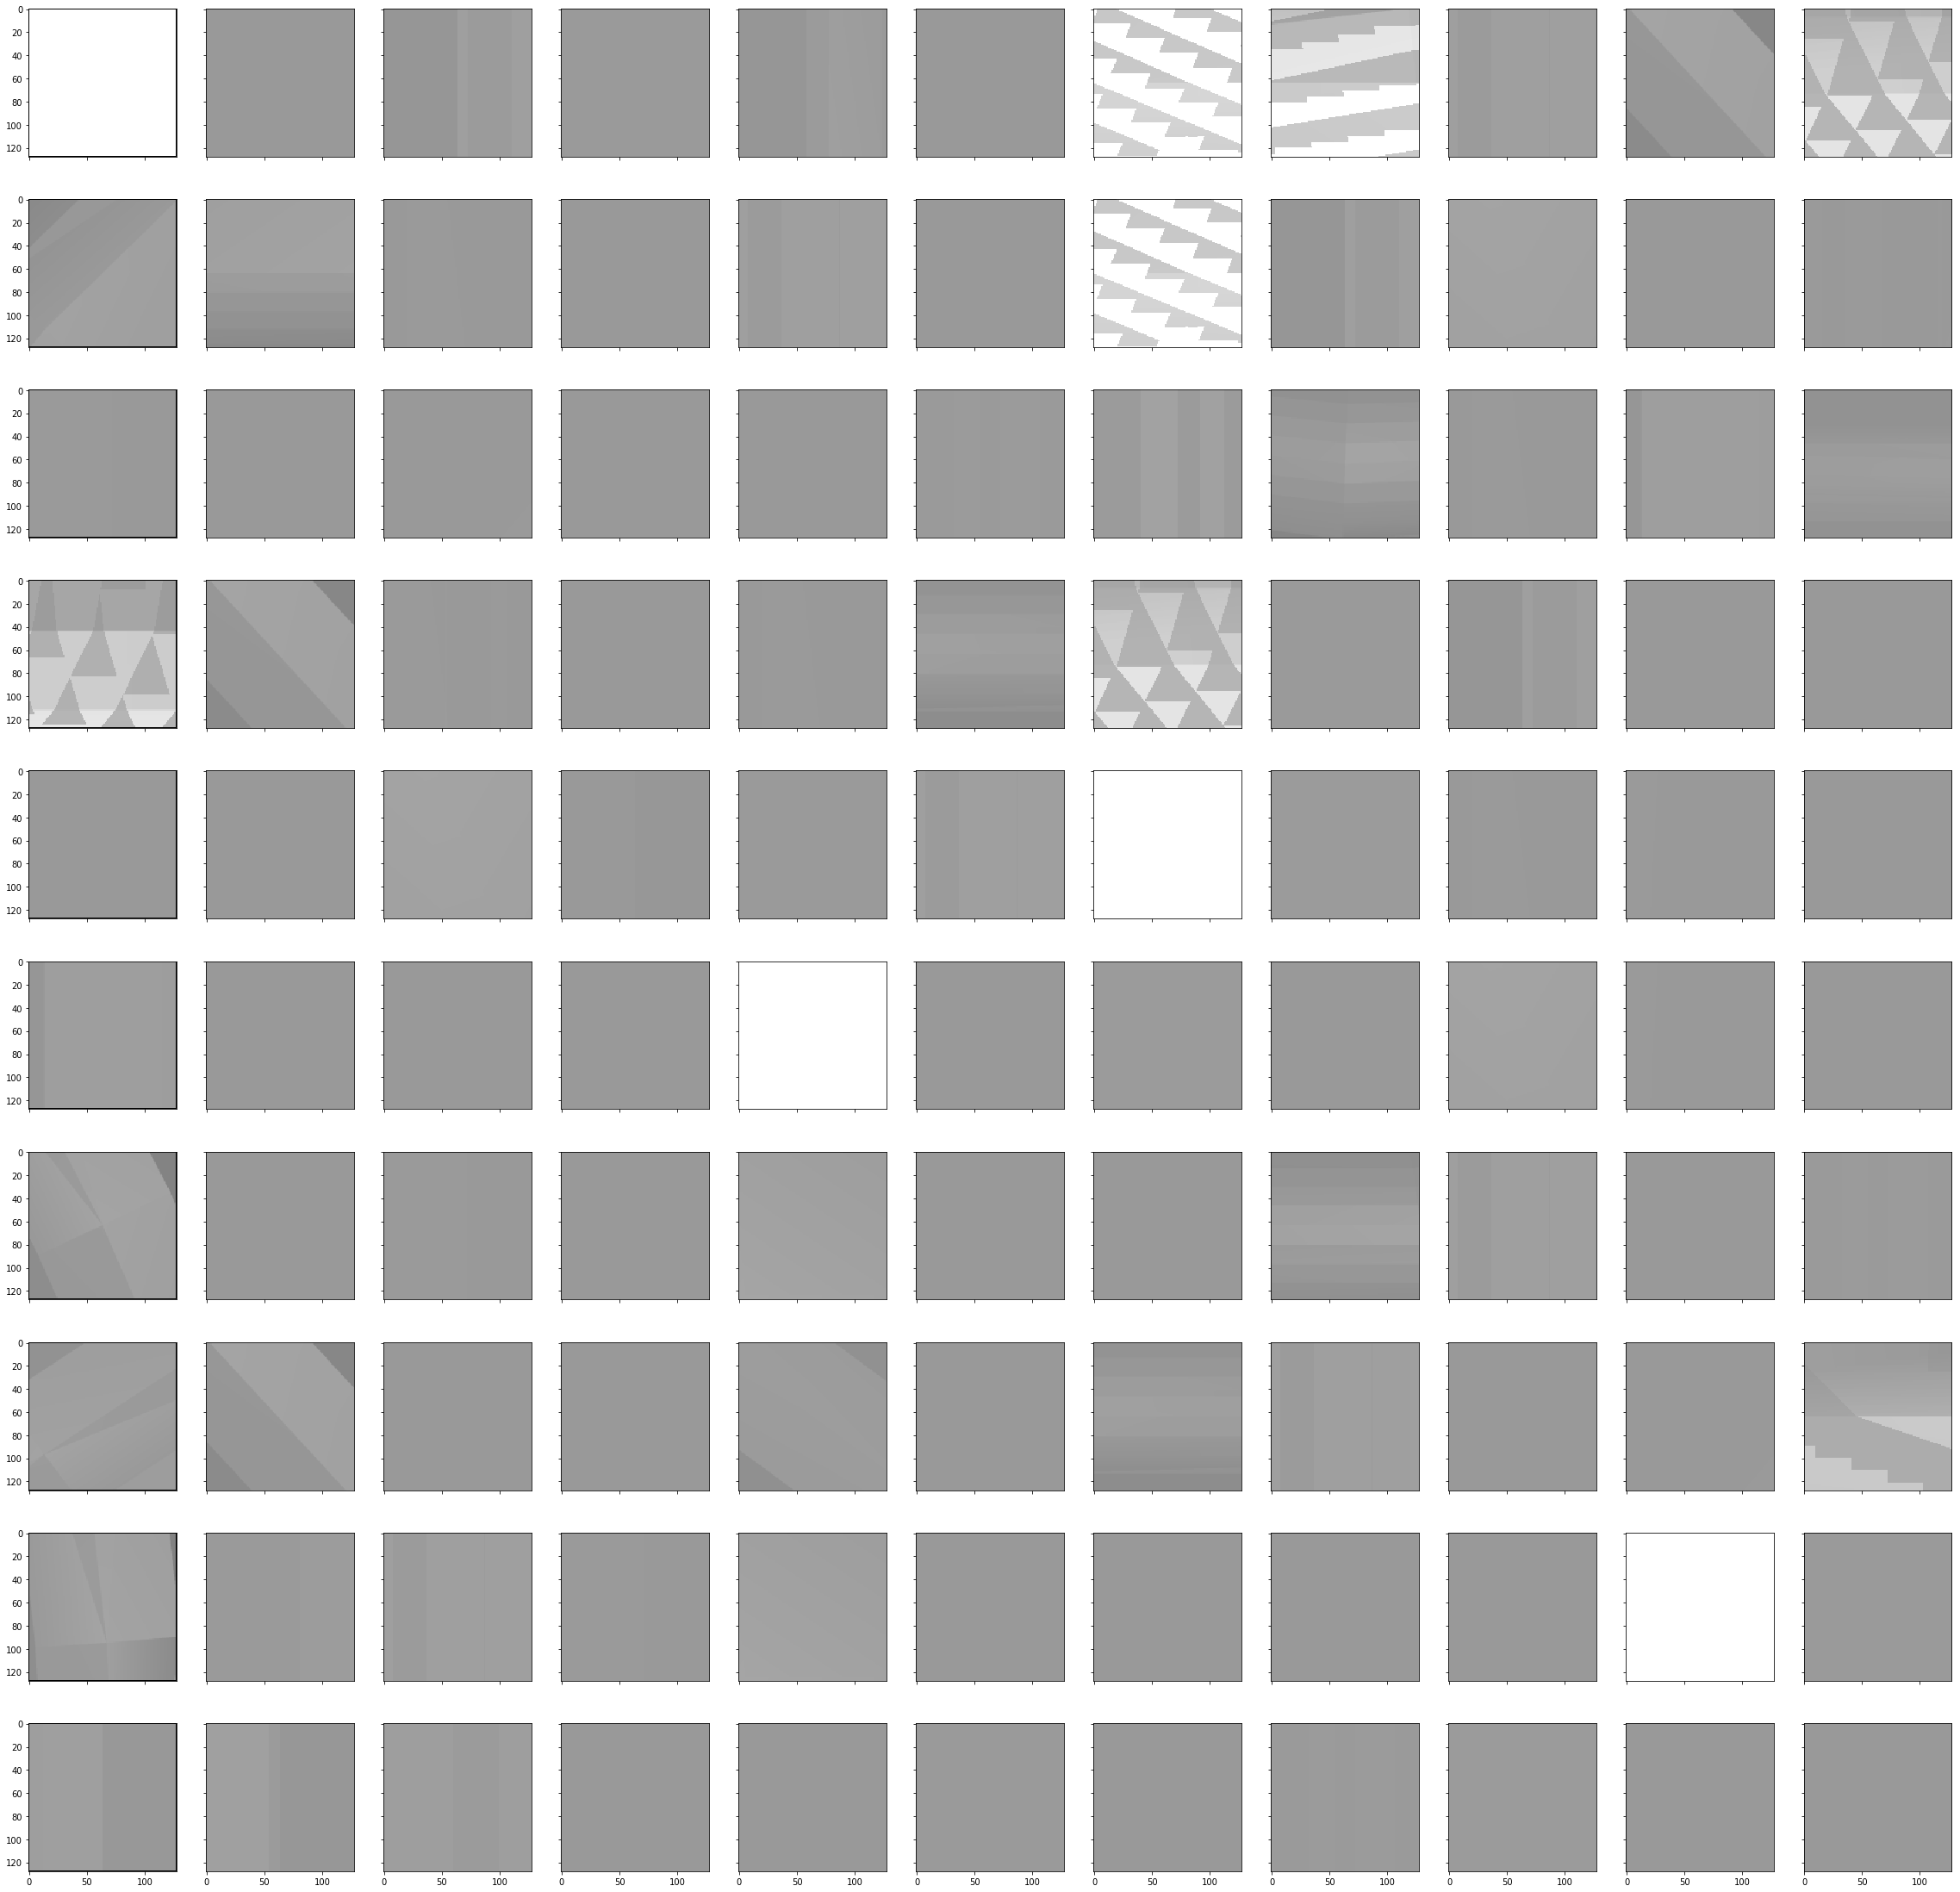

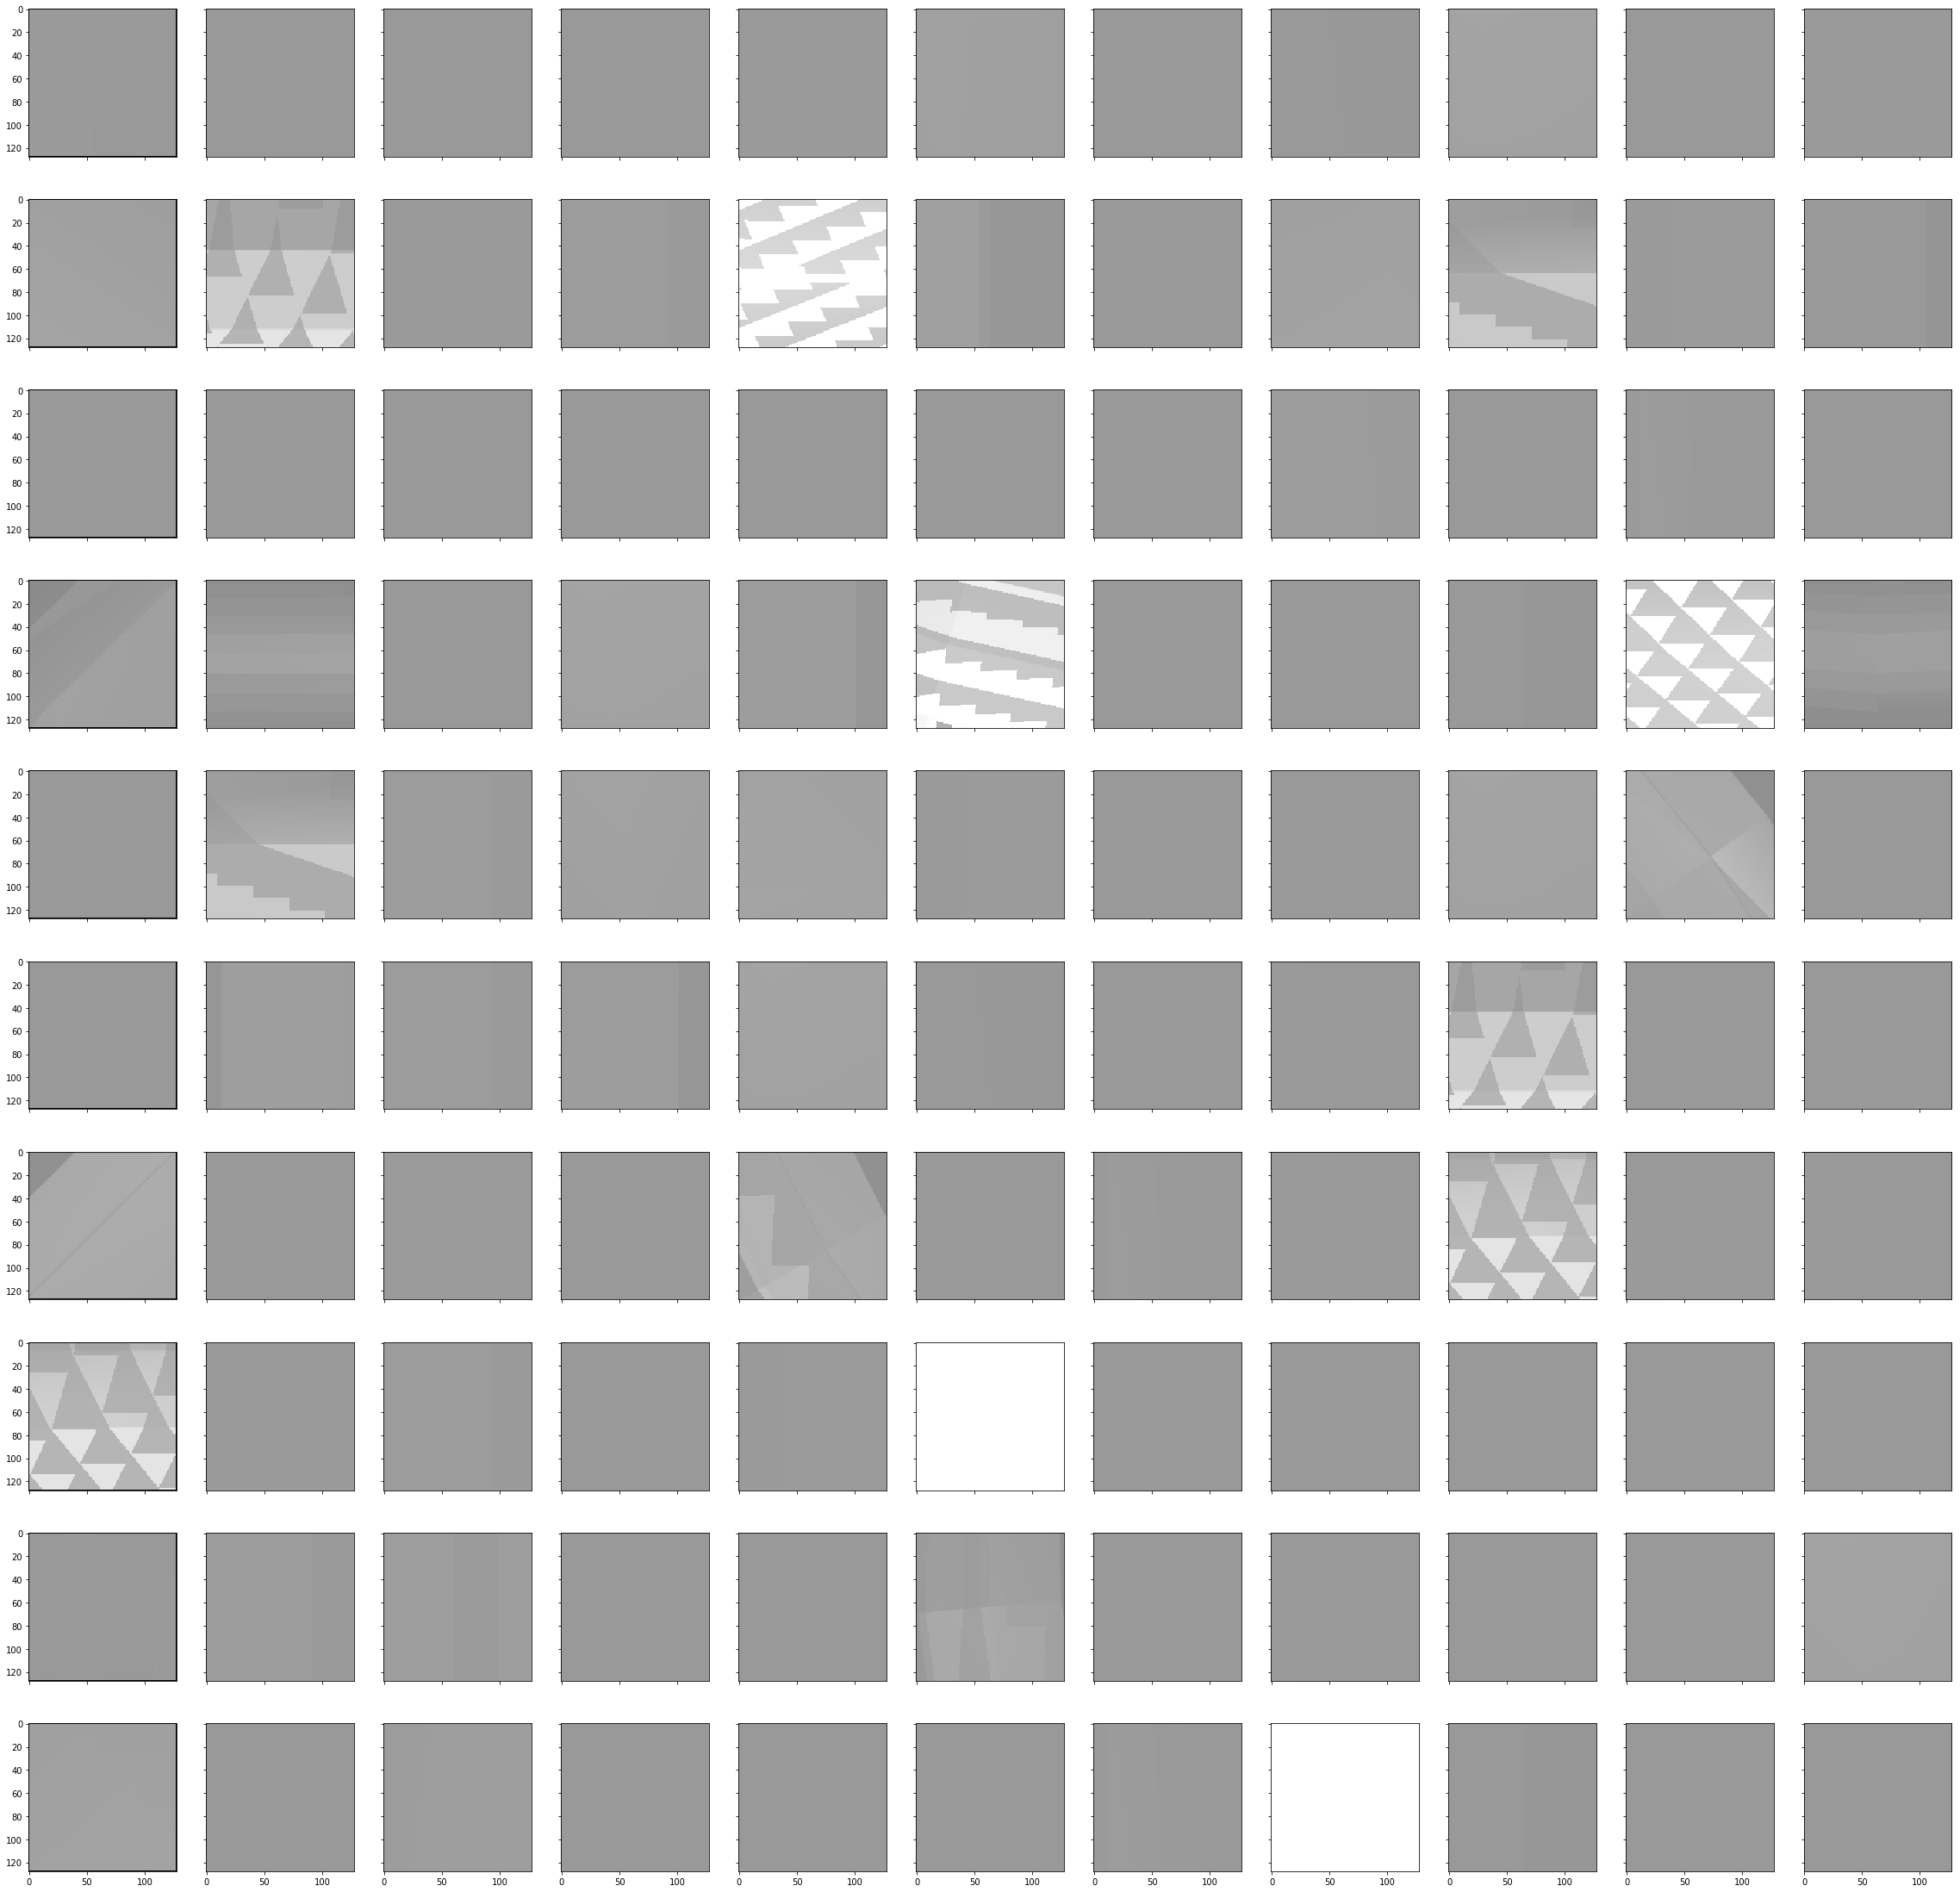

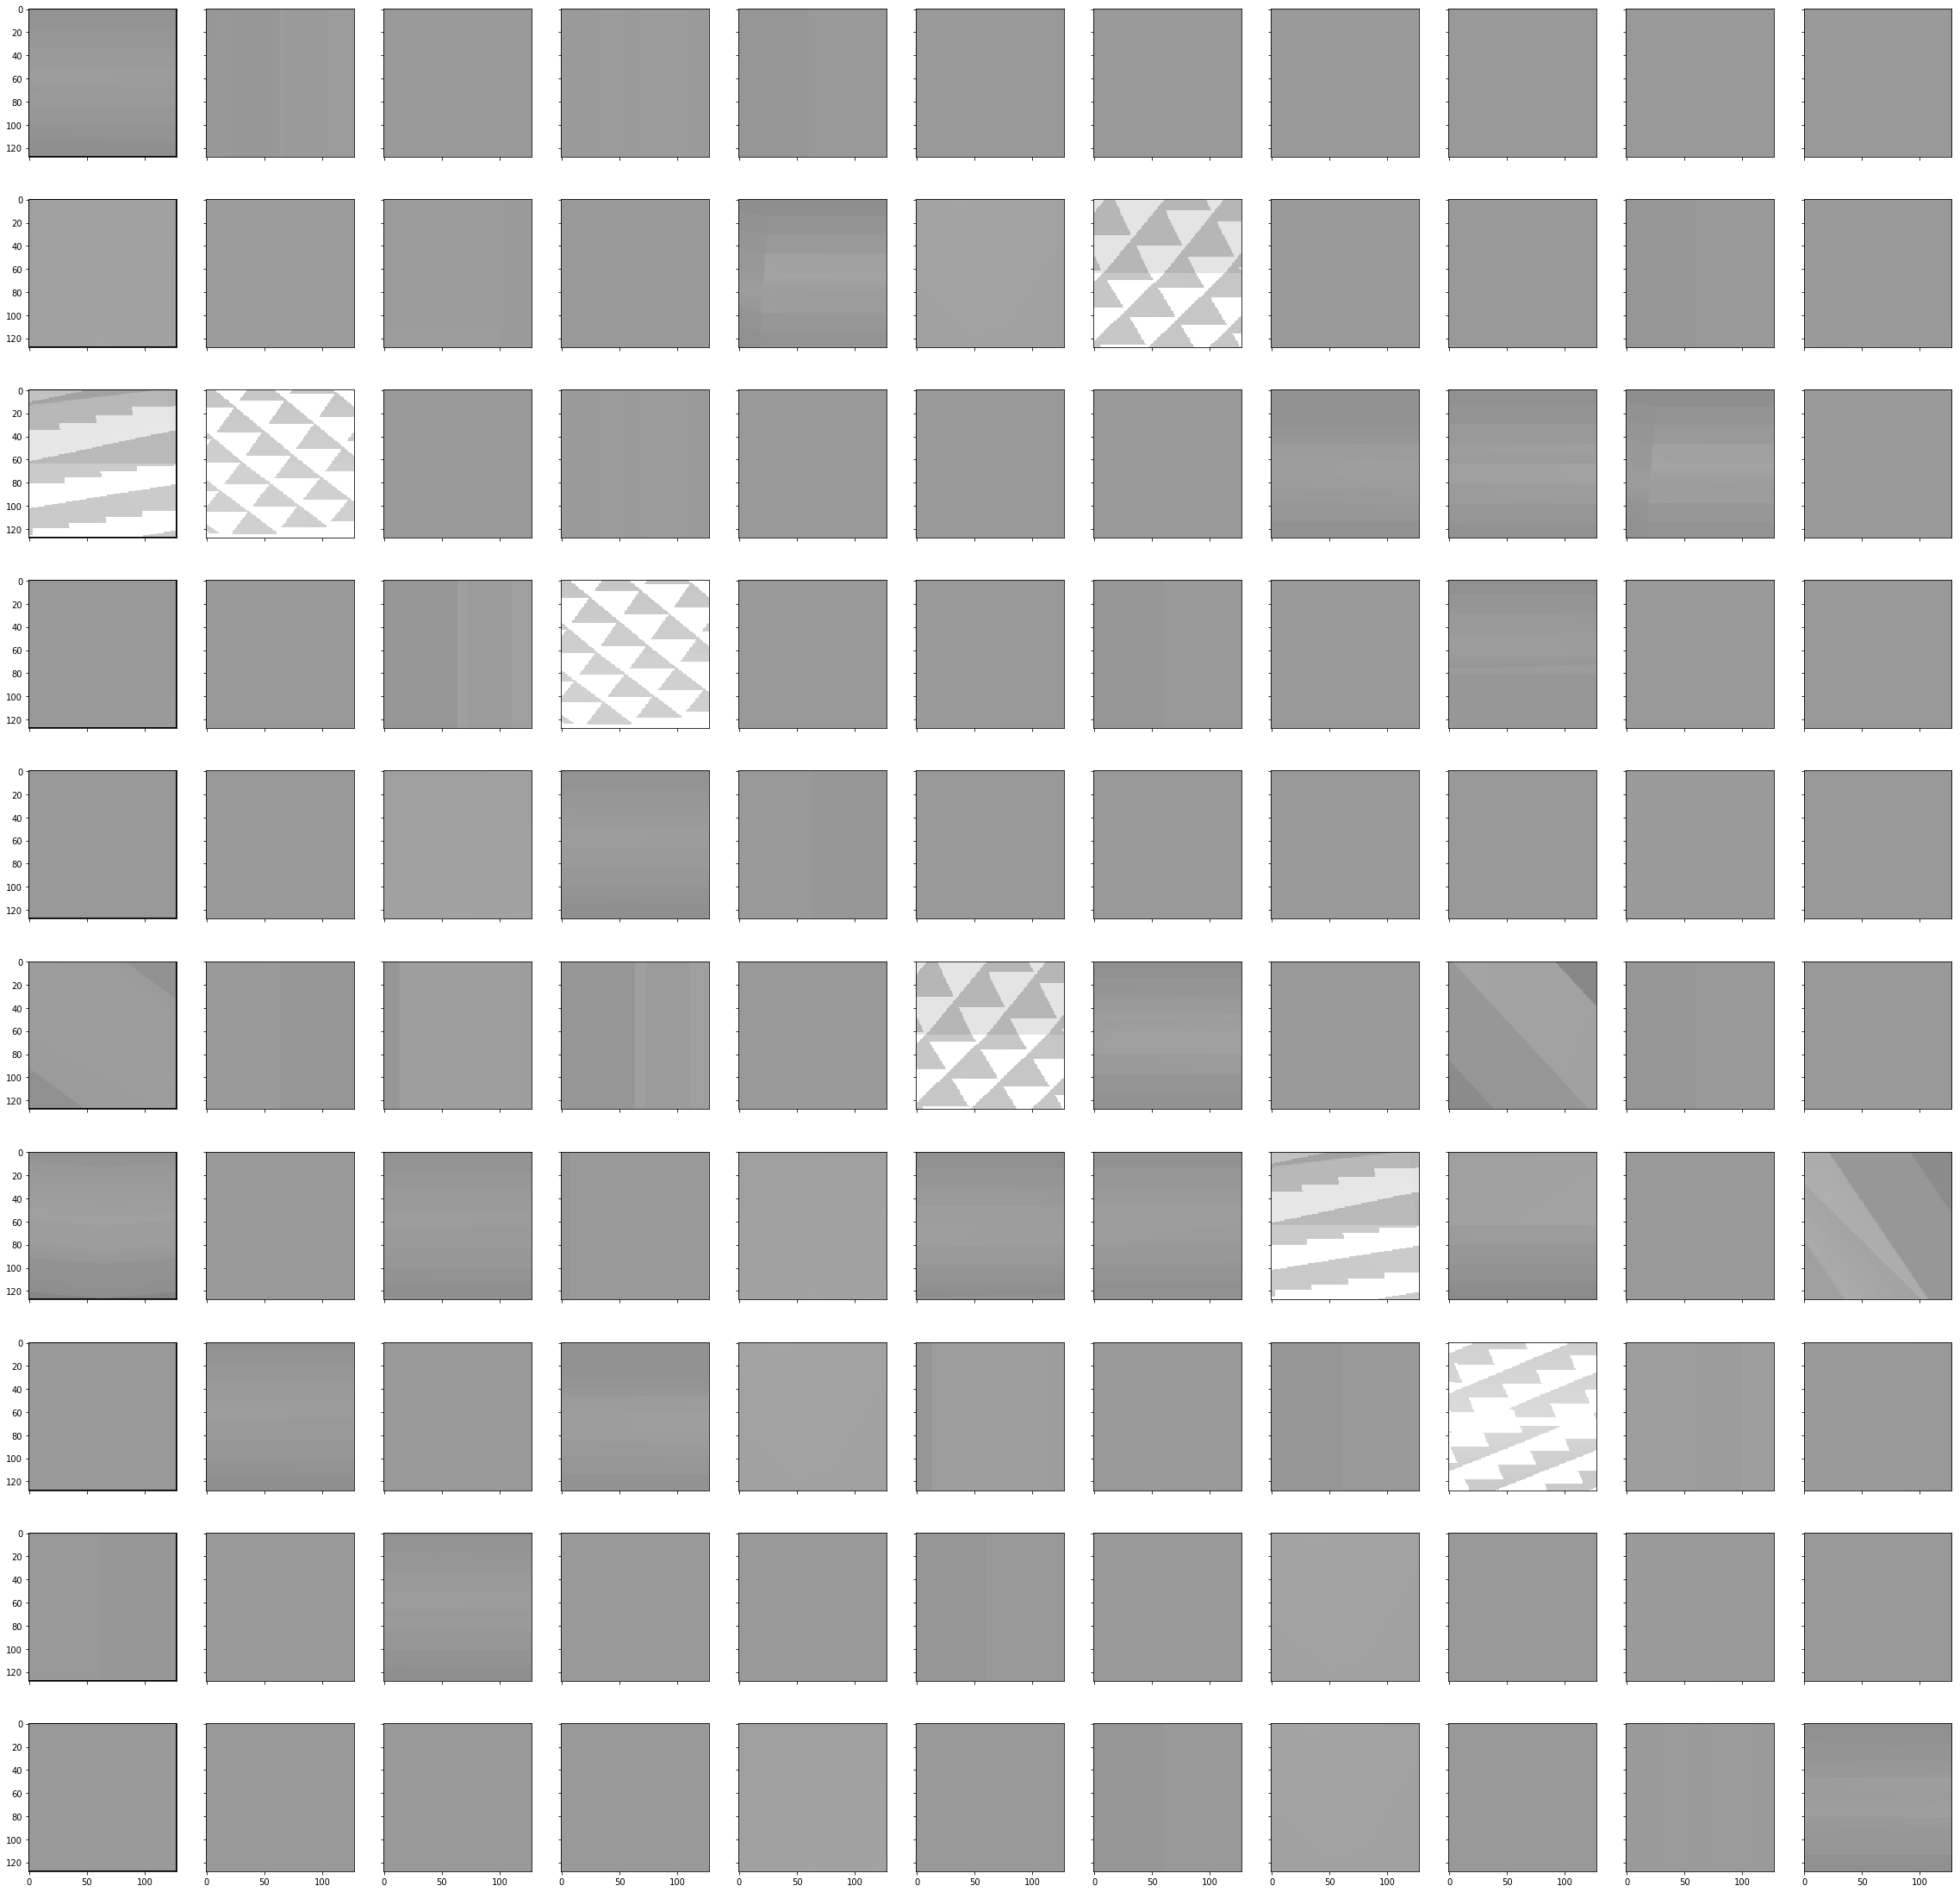

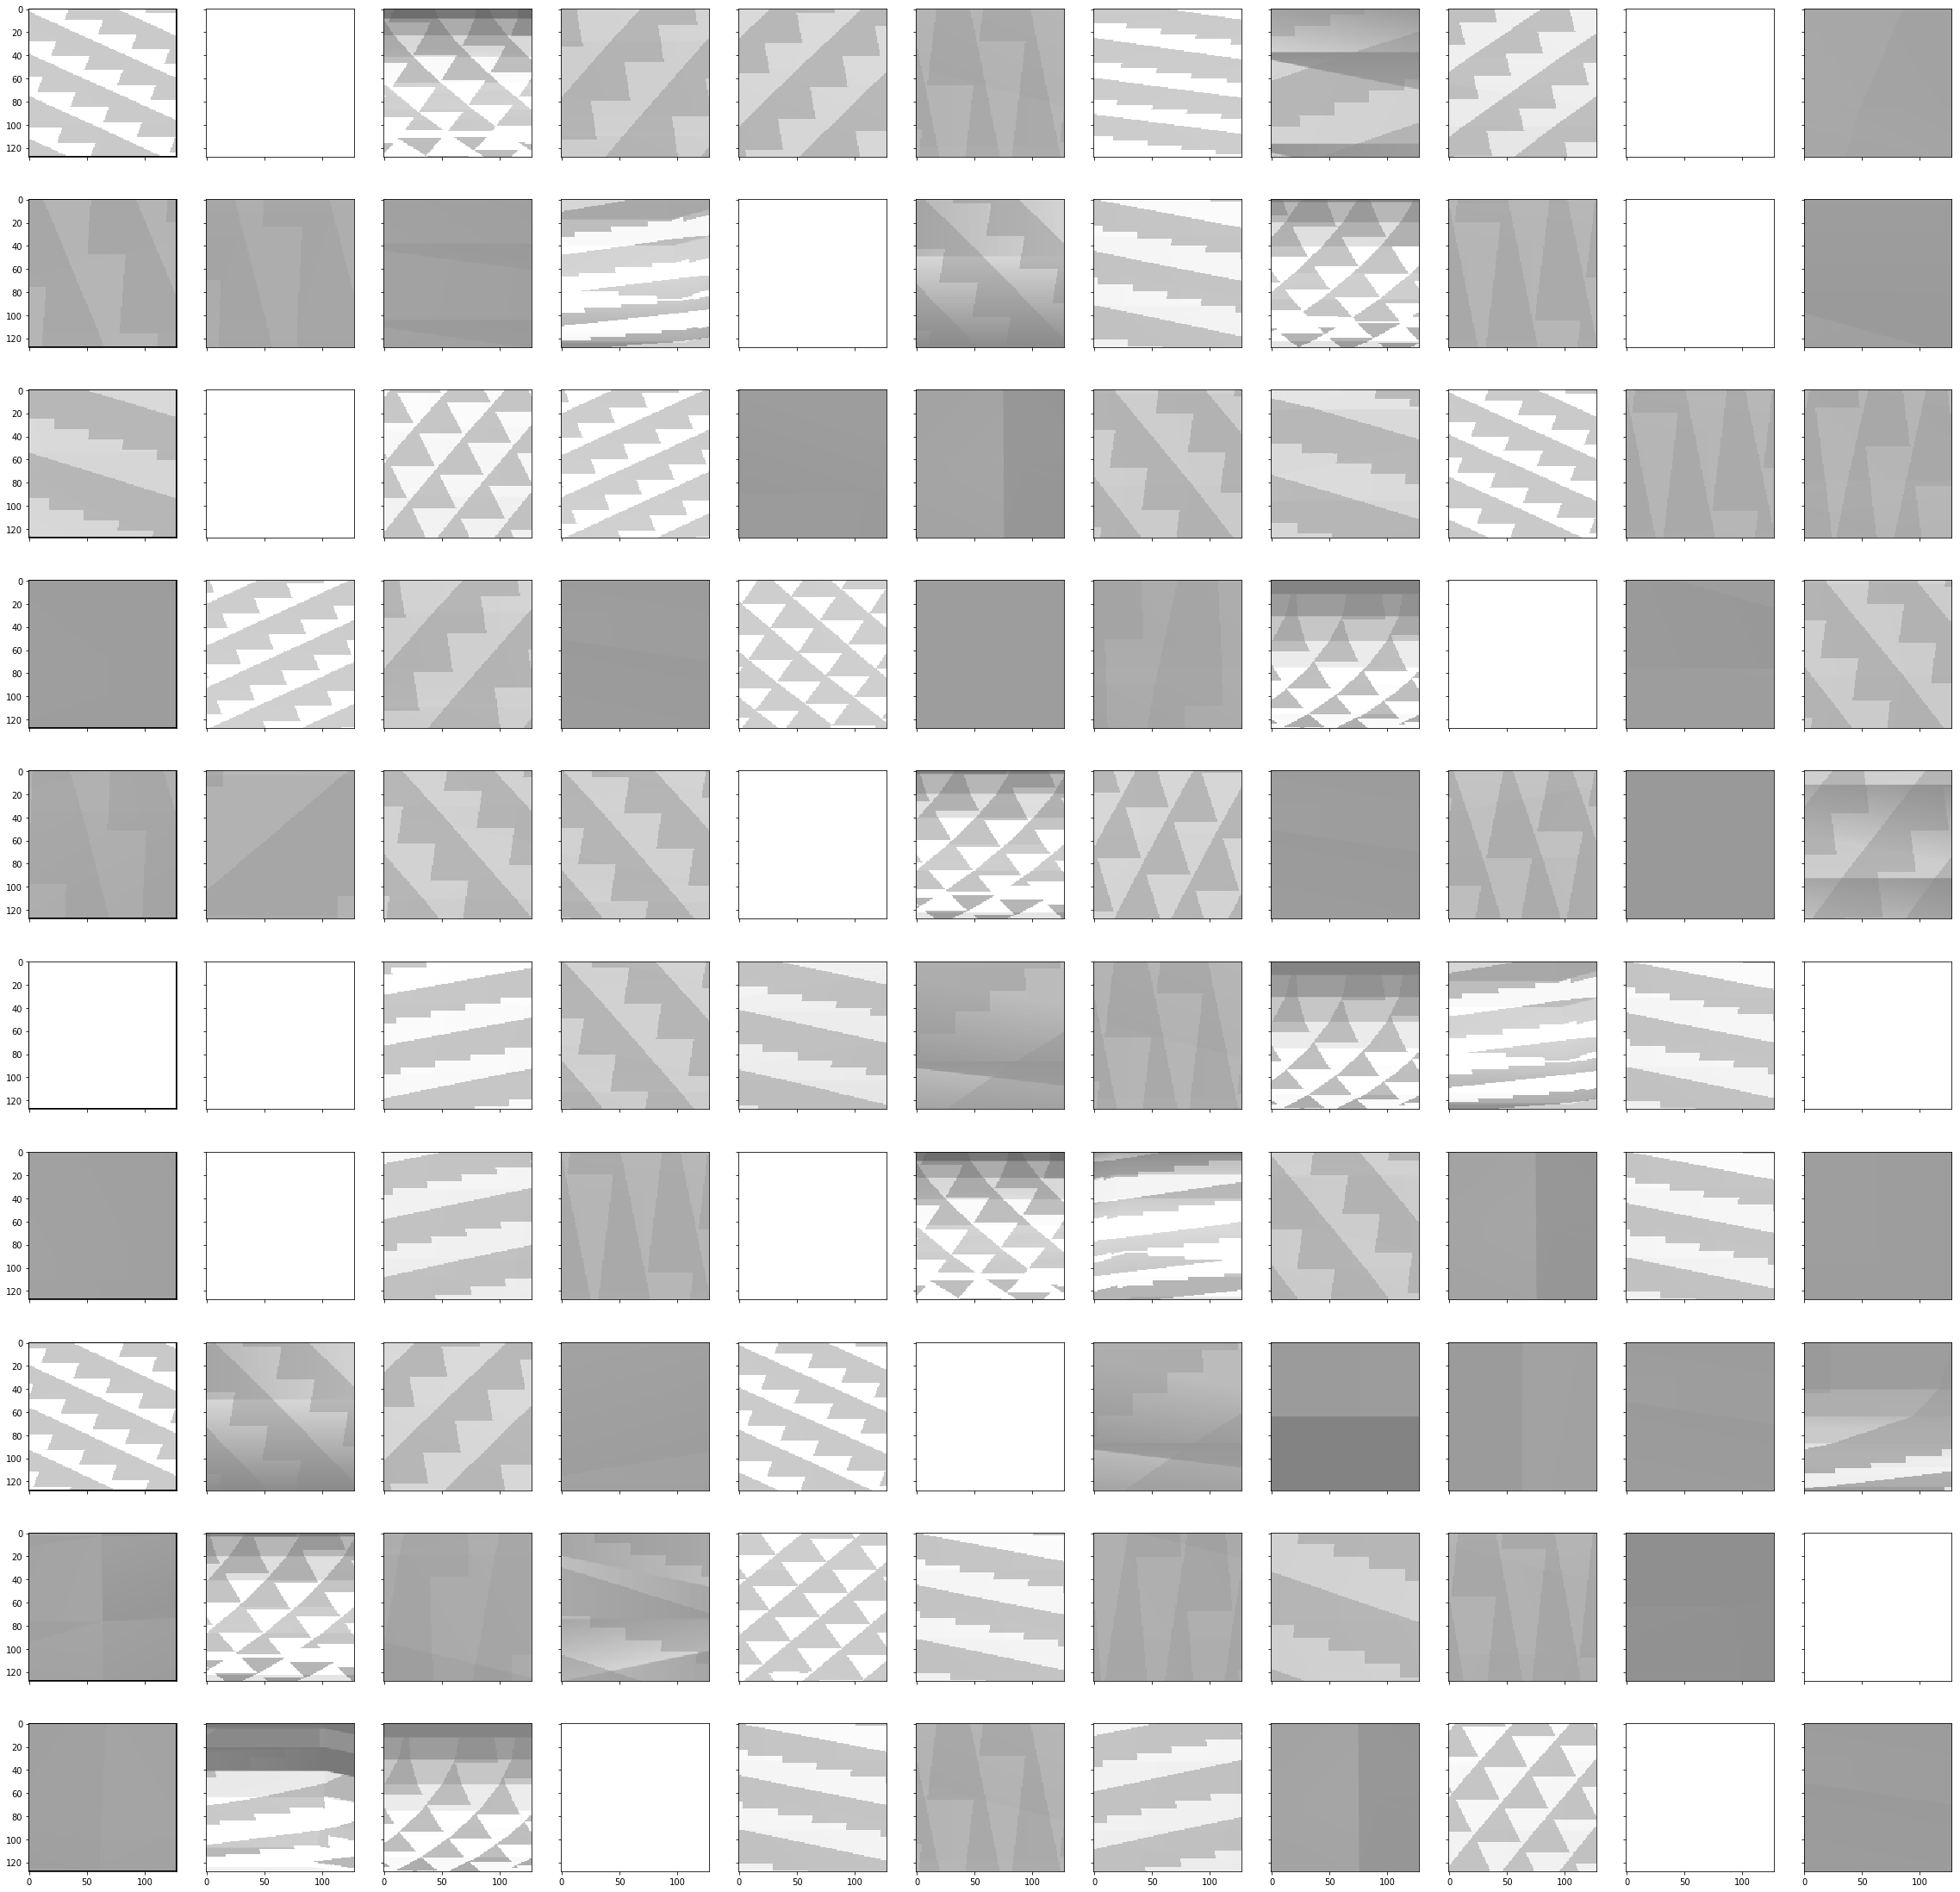

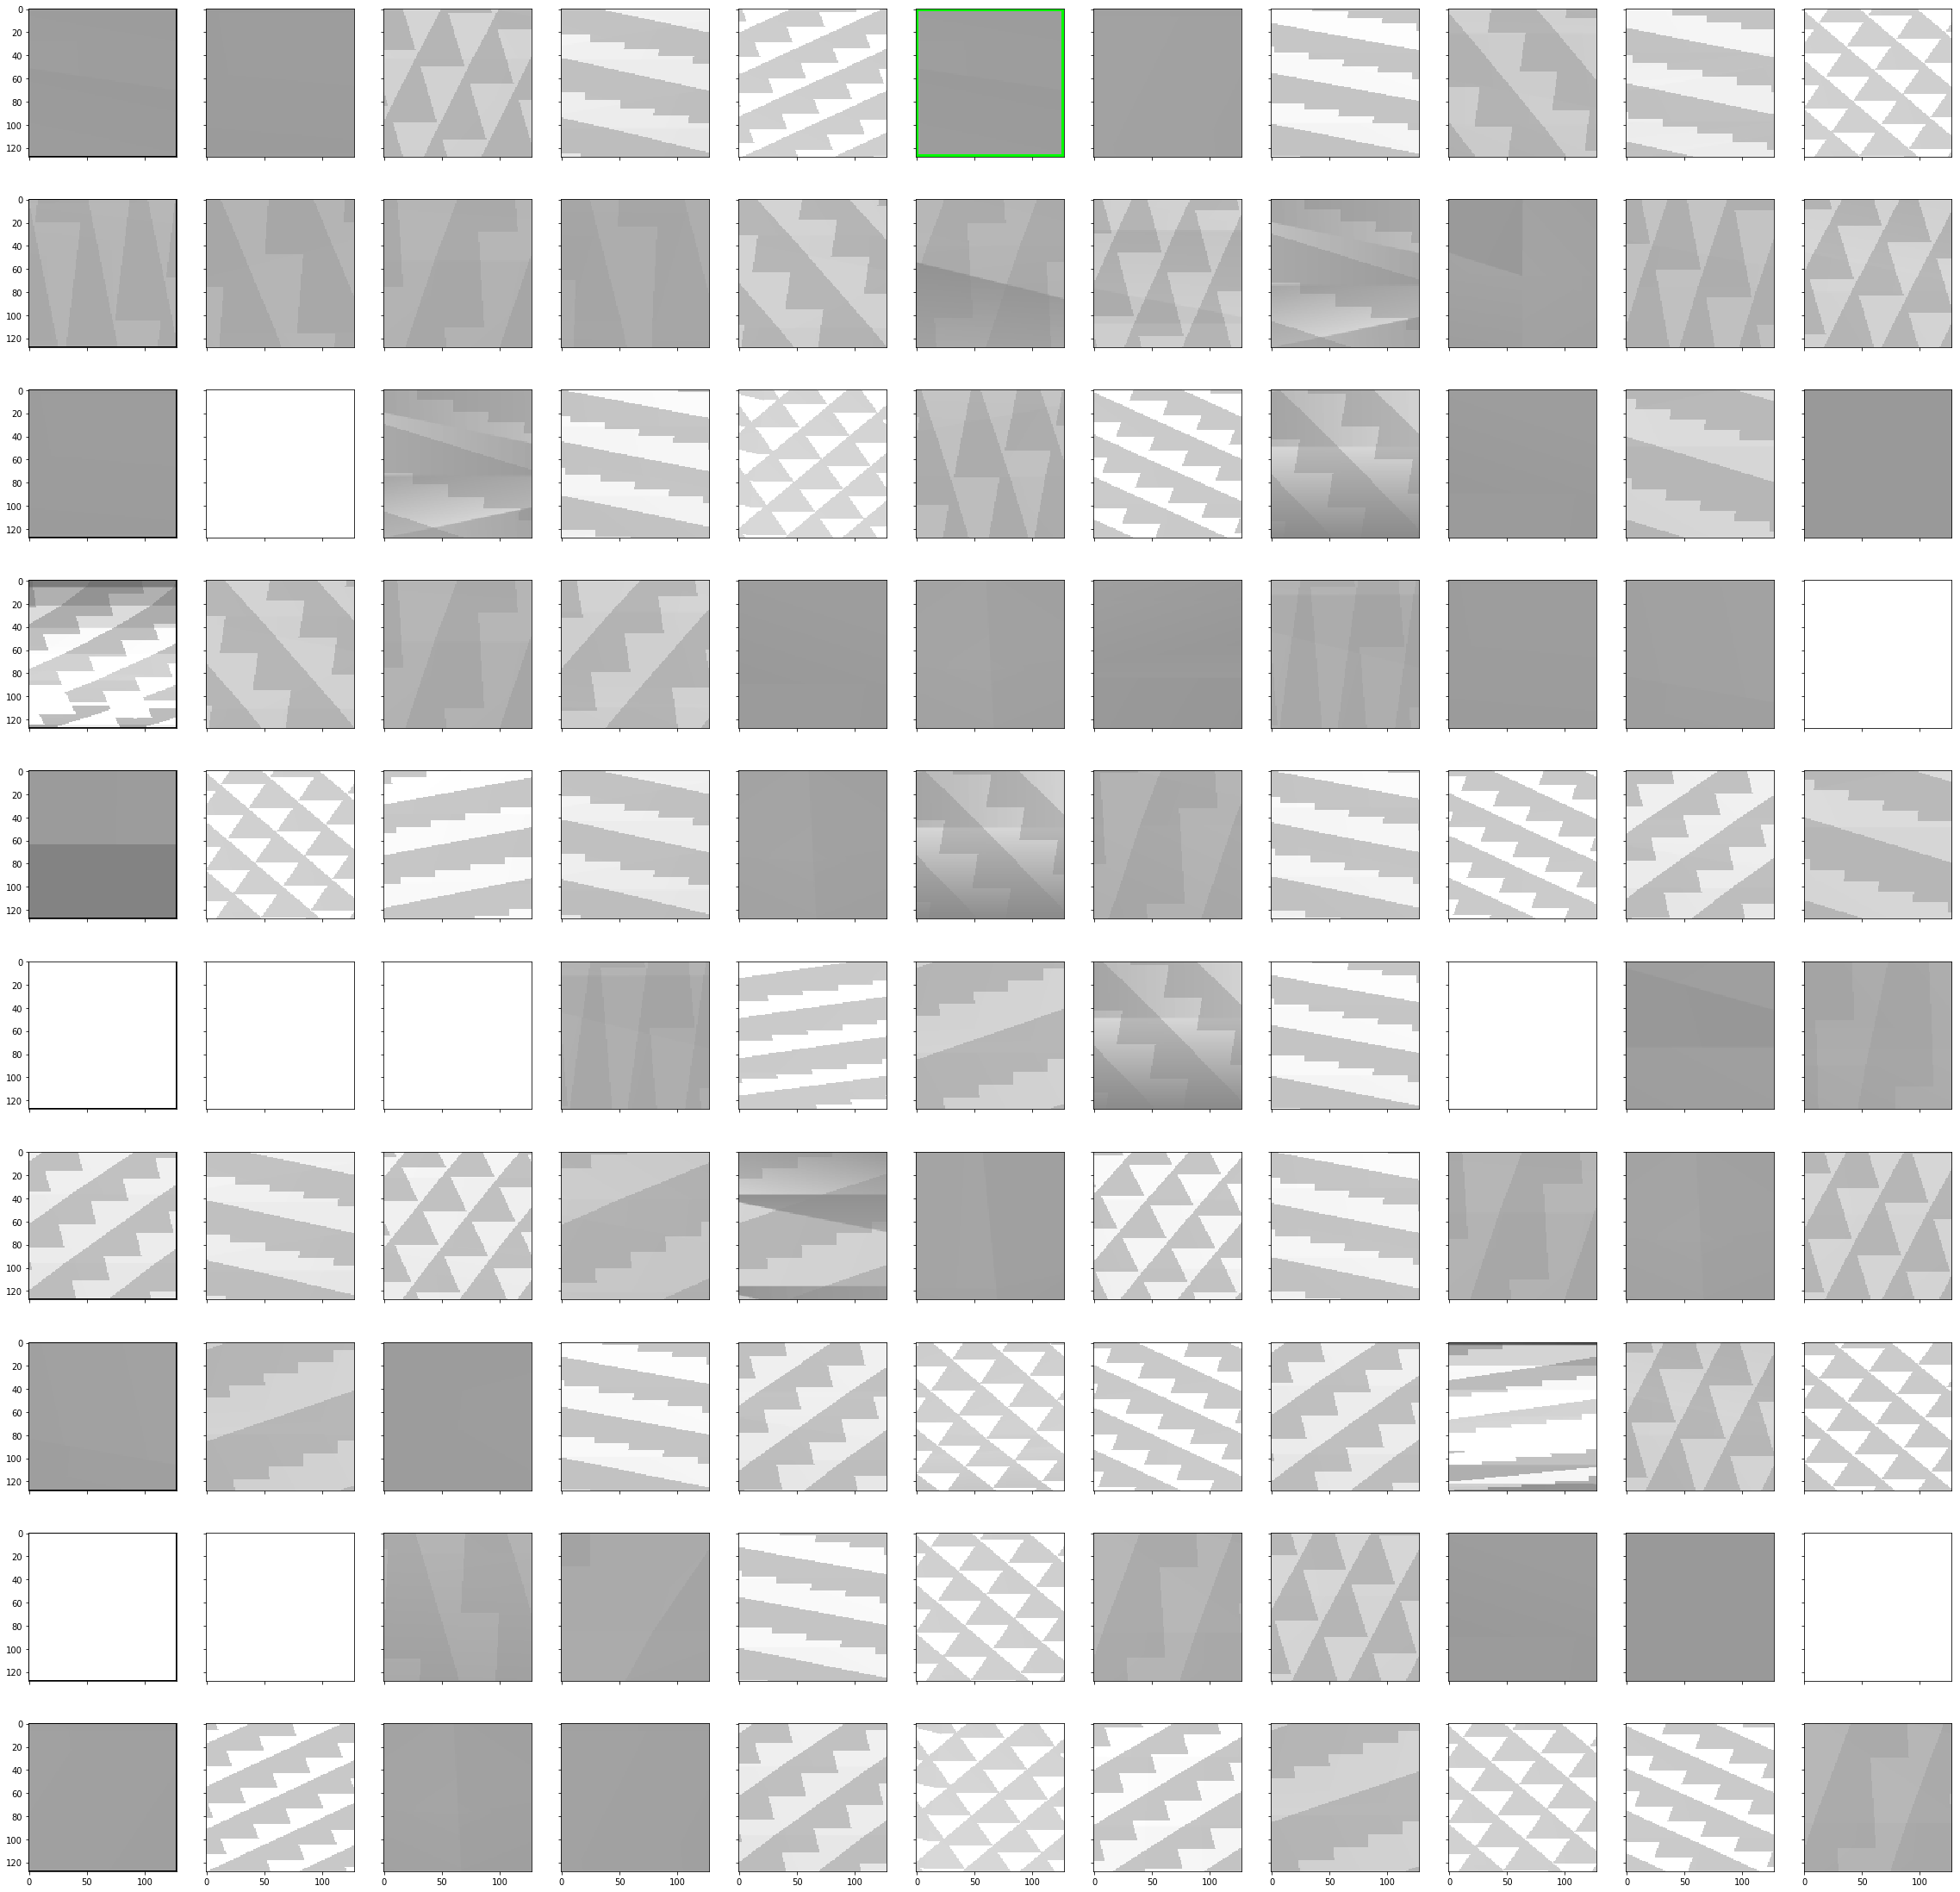

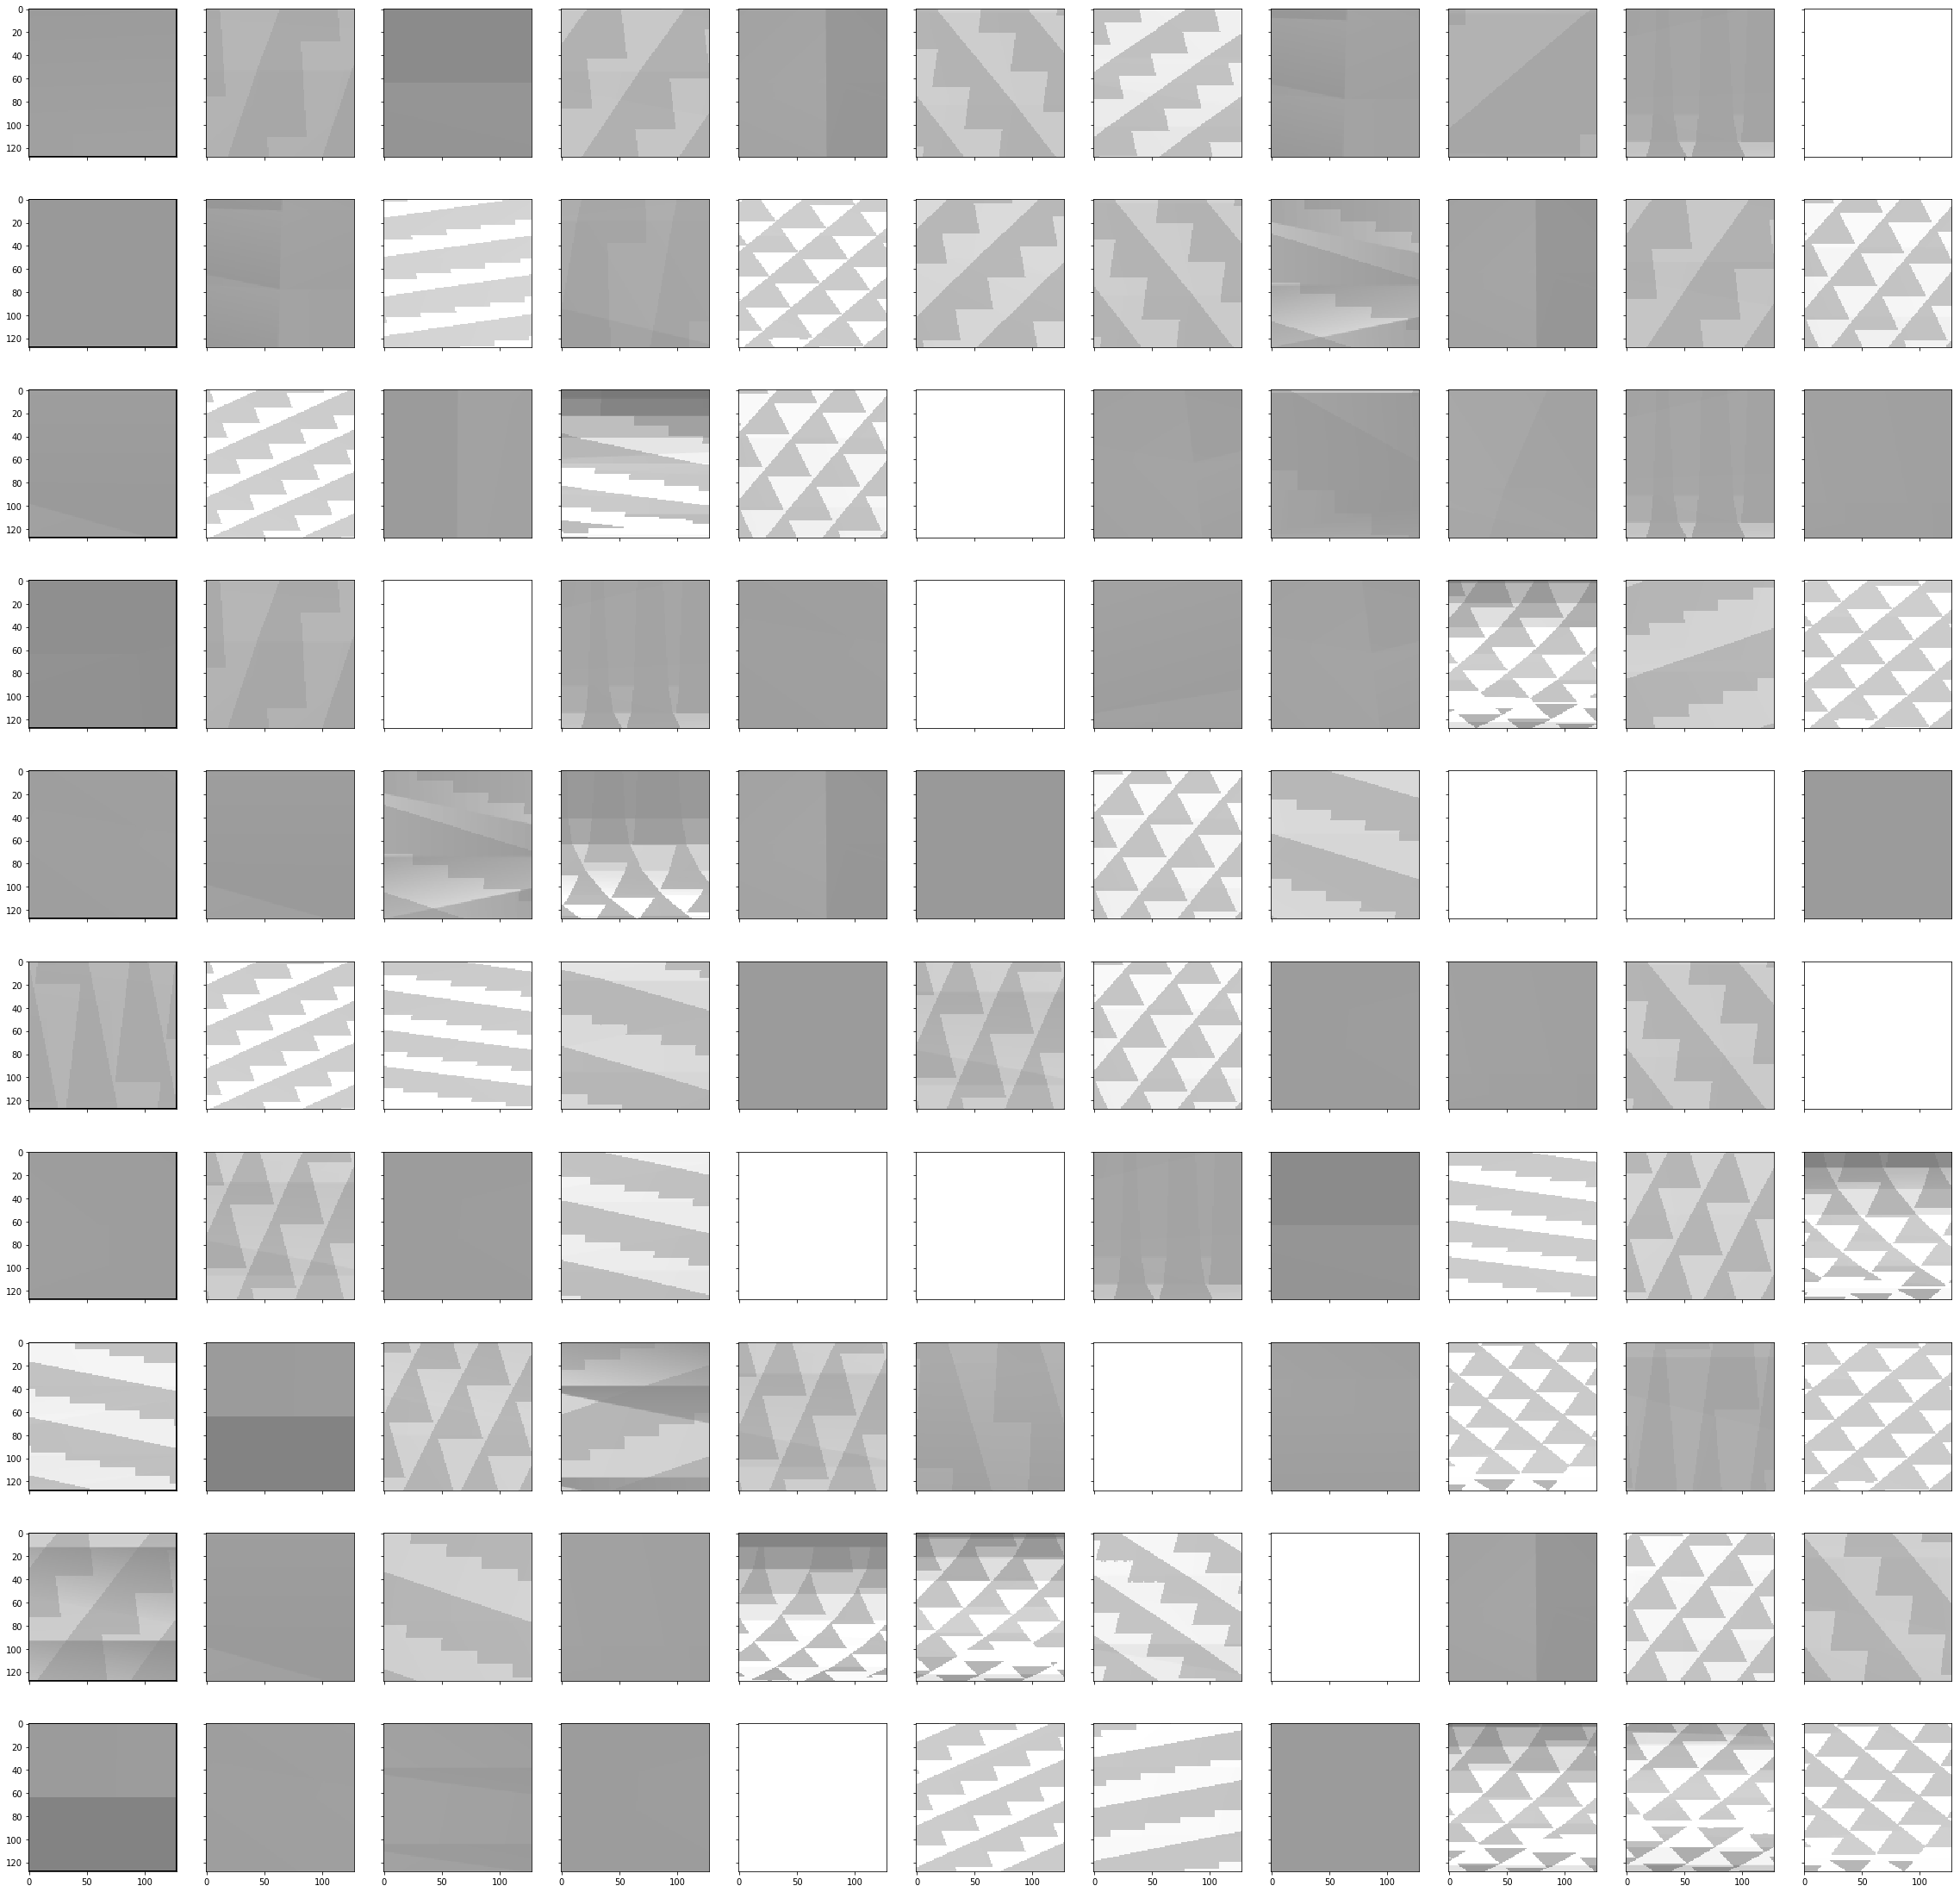

In [12]:
model.go()

In [14]:
all_results_for_object1 = model.big_list_of_results[0]
all_results_for_object2 = model.big_list_of_results[1]

In [15]:
print(all_results_for_object1.keys(), all_results_for_object2.keys())

dict_keys(['sensor_features', 'sensor_depths', 'object_img', 'sensor_imgs', 'context_features', 'sensor_depth_centers_in_world', 'sensor_depths_centers_in_ref_cam', 'object_name']) dict_keys(['sensor_features', 'sensor_depths', 'object_img', 'sensor_imgs', 'context_features', 'sensor_depth_centers_in_world', 'sensor_depths_centers_in_ref_cam', 'object_name'])


In [16]:
# getting the stuff that I require as of now
sensor_features = torch.cat((all_results_for_object1['sensor_features'],\
                             all_results_for_object2['sensor_features']), dim=0)
context_features = torch.cat((all_results_for_object1['context_features'],\
                              all_results_for_object2['context_features']), dim=0)
sensor_imgs = torch.cat((all_results_for_object1['sensor_imgs'],\
                         all_results_for_object2['sensor_imgs']), dim=0)

## Compute precision recall

Here I assume that the ```emb_e``` are the context features and ```emb_g``` are the sensor features and for each ```emb_e``` I find the **closest 10** ```emb_gs``` and plot the images of these **closest 10**.

Note that since ```emb_e``` is the 3d grid and I have not figured out the way to visualize it yet, I am just displaying black images.

One more thing that I wish to investigate is the ```requires_grad=True``` even though the model is in eval mode as shown below

In [17]:
print(sensor_features.requires_grad)
print(context_features.requires_grad)
print(sensor_imgs.requires_grad)
# I will check the model status here if it is in eval mode I will presume that BN will behave normally
print(model.model.featnet.training)
print(model.model.backbone_2D.training)
print(model.model.context_net.training)

True
True
False
False
False
False


In [18]:
emb2D_g = sensor_features
emb2D_e = context_features
vis_g = sensor_imgs
vis_e = sensor_imgs
print(emb2D_e.shape)
print(emb2D_g.shape)
print(vis_g.shape)
print(vis_e.shape)

torch.Size([400, 32])
torch.Size([400, 32])
torch.Size([400, 3, 128, 128])
torch.Size([400, 3, 128, 128])


In [23]:
# initially I will make everything compatible to the above code and then trim stuff
B, C = list(emb2D_e.shape)
print(B, C)
np_emb2D_e = emb2D_e.view(B, 1, 1, C).cpu().detach().numpy()
np_emb2D_g = emb2D_g.view(B, 1, 1, C).cpu().detach().numpy()
np_vis_g   = vis_g.cpu().detach().numpy()
np_vis_g   = np.transpose(np_vis_g, [0, 2, 3, 1])
np_vis_e   = vis_e.cpu().detach().numpy()
np_vis_e   = np.transpose(np_vis_e, [0, 2, 3, 1])

# convert this to the proper 255 side
np_vis_g = ((np_vis_g+0.5) * 255).astype(np.uint8)
np_vis_e = ((np_vis_e+0.5) * 255).astype(np.uint8)
# assume vis is all ones
# vis_e = np.zeros((B, 128, 128, 3)).astype(np.float32)
# vis_g = np.ones((B, 128, 128, 3)).astype(np.float32)

xxx_todo_changeme = [np_emb2D_e, np_vis_e]
xxx_todo_changeme1 = [np_emb2D_g, np_vis_g]
recalls = [1, 5, 10, 20, 50, 100, 200, 400]
pool_size = 200

prec, vis, _ = compute_precision(xxx_todo_changeme, xxx_todo_changeme1, recalls=recalls, pool_size=pool_size)

400 32


[0.0025 0.015  0.0225 0.0475 0.1375 0.26   0.4825 1.    ]


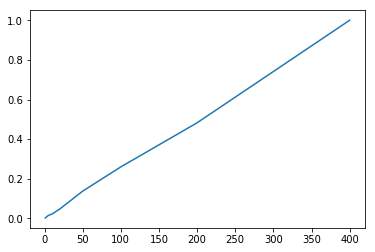

In [24]:
print(prec)
plt.plot(recalls, prec)

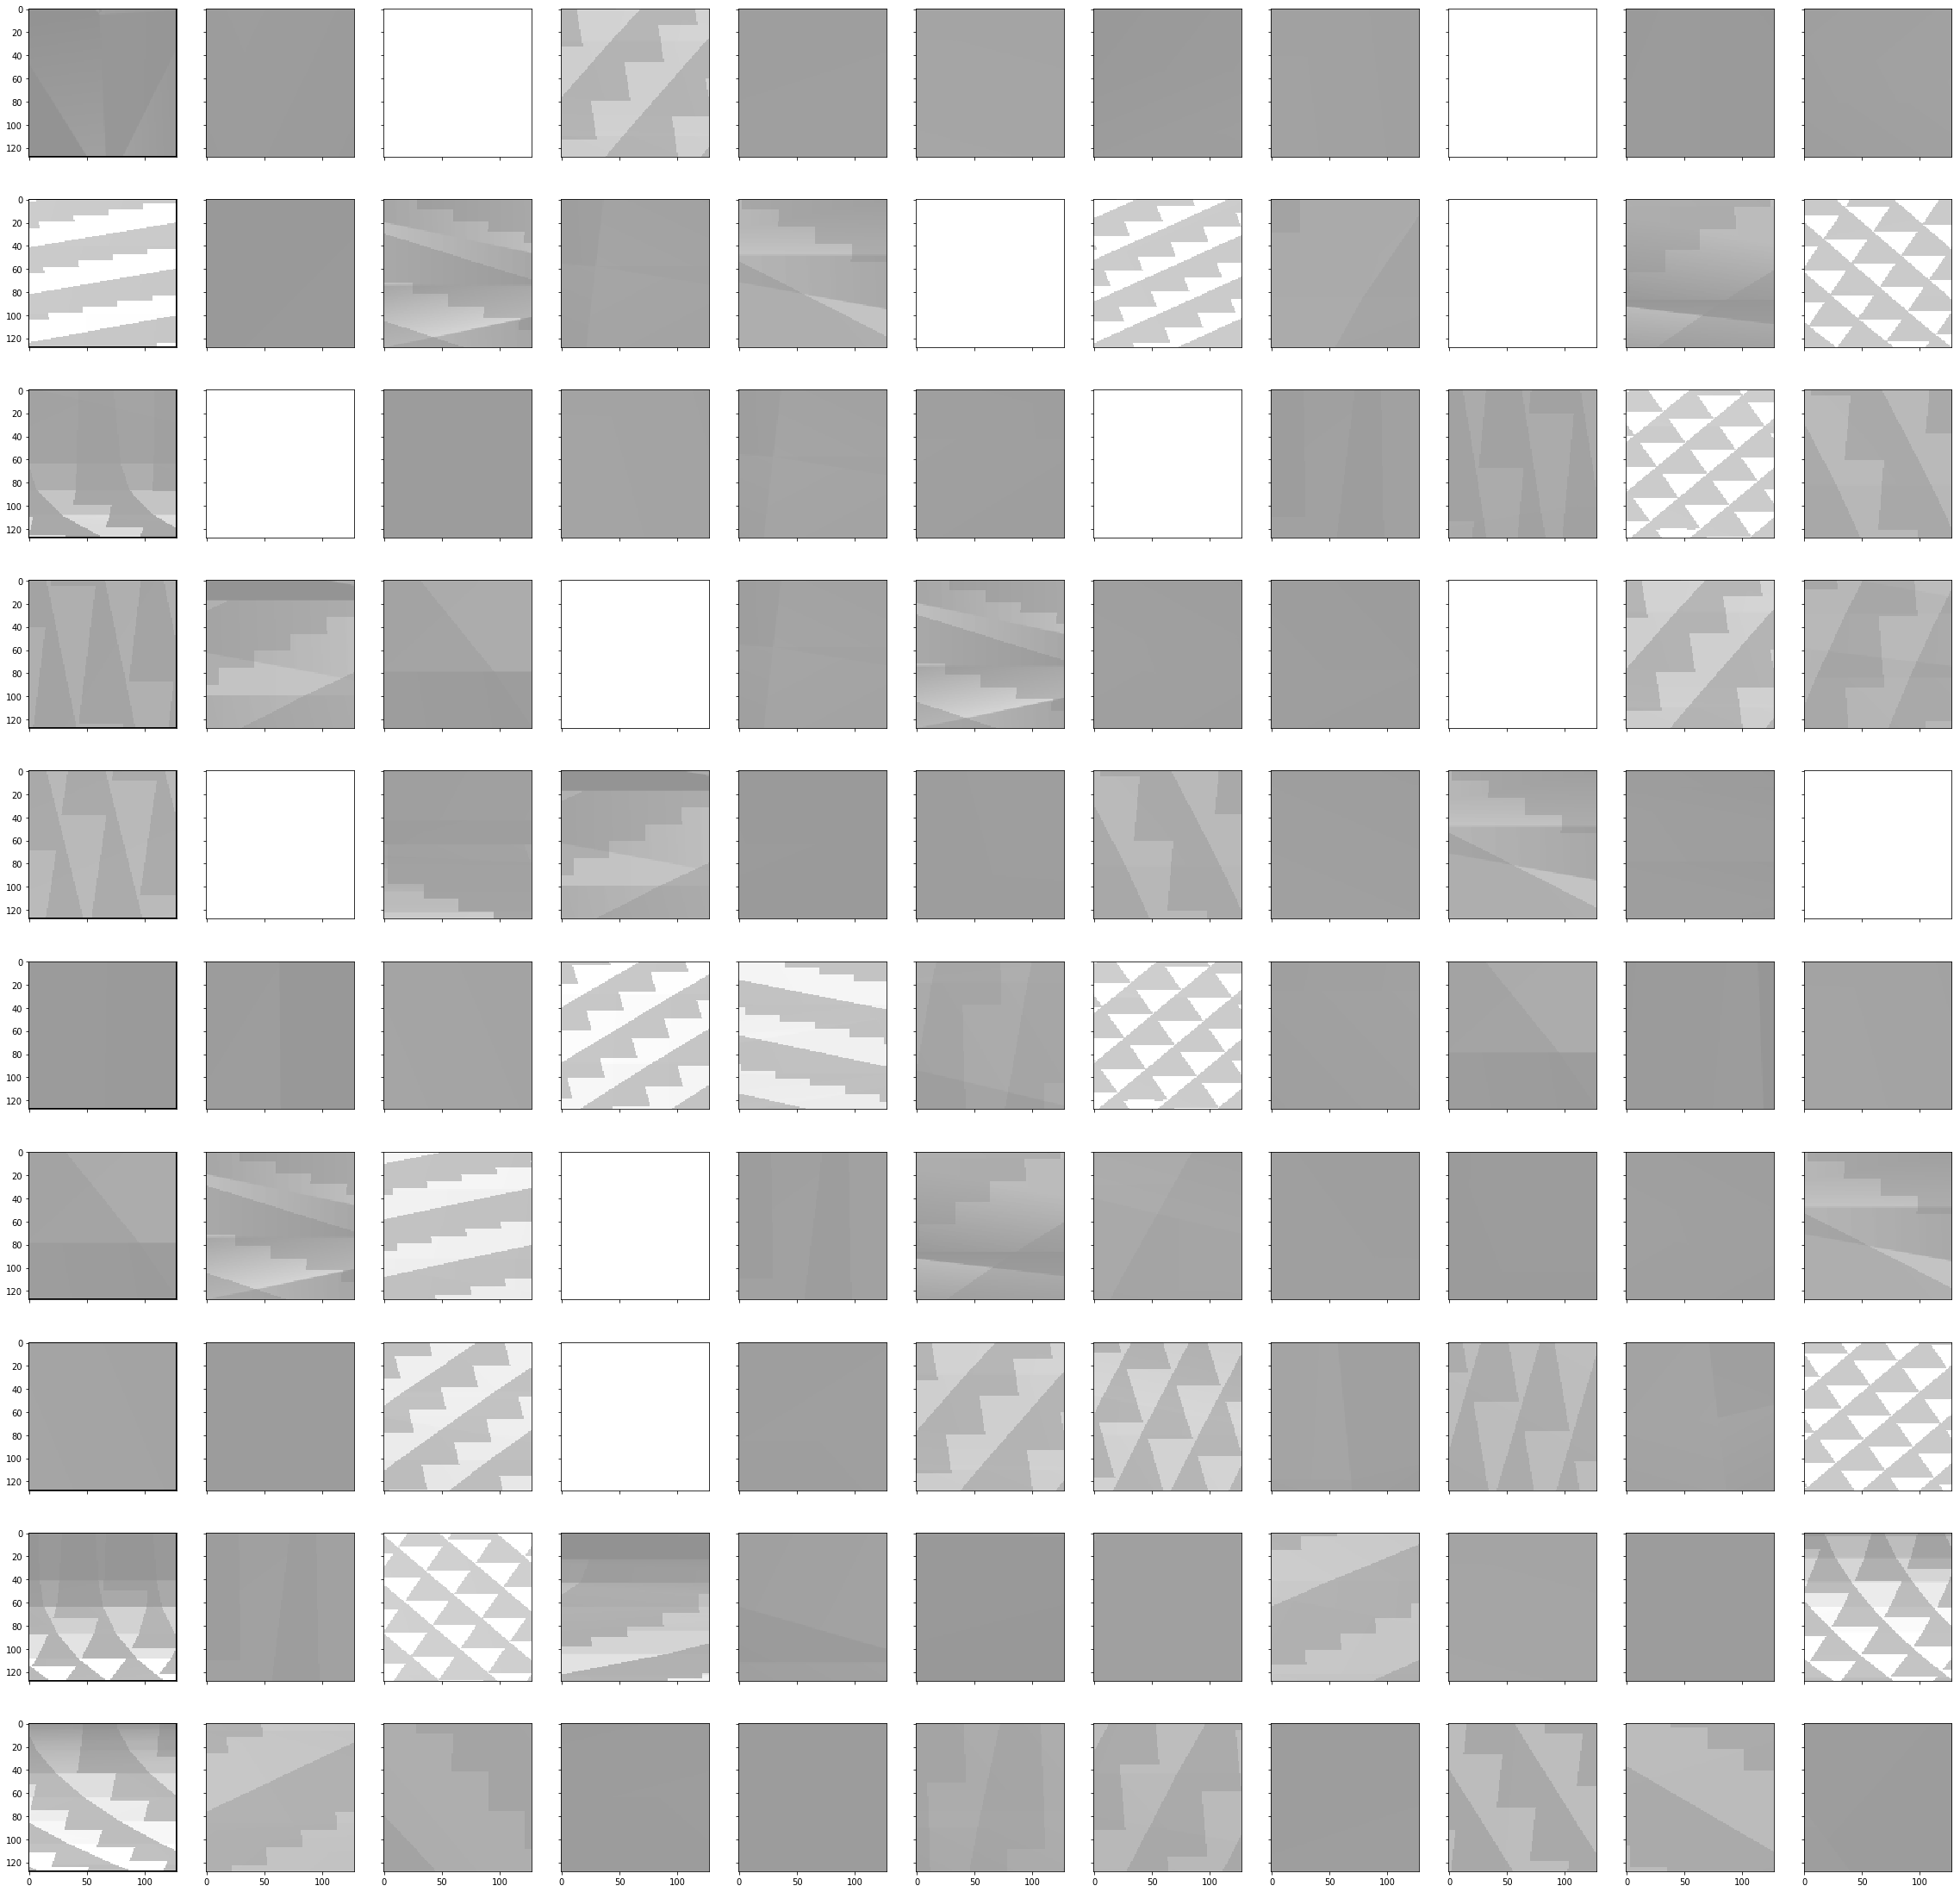

In [25]:
plot_nearest_neighbours(vis)

## Going the other way round which is the real test

Now the ```emb_e``` are going to be sensor features, and ```emb_g``` are going to be context features and my task is to find the **top_x** nearest contexts to the ```emb_e``` and visualize them, but the problem is these ```emb_gs``` are obtained from **3d context grids**, so I can not directly visualize them.

## Strategy 1: The algorithm used for now renders it amenable to pretty easy visualization atleast.

### Algorithm:
1. Imagine a cup and around it there are attached a lot of depth cameras.
2. For each of the depth camera, get a **depth image** and you crop a **3D region from the visual tensor** around this depth image's center.
3. Pass the **depth image** through a 2D->1D CNN network to get a 32 dimensional feature vector corresponding to this depth image.
4. Pass the **3D region from the visual tensor** through a 3D->1D projection CNN to get a 32 dimensional feature vector. To this region I also append the camera position and camera orientation transformed from world to reference coordinate system.
5. Step 3 and Step 4 form the positive pair and metric learning is done to bring them closer.

### Result of the training and its visualization:
1. Once the network is trained, for a **depth image** obtained from the touch sensor, find the top-10 nearest neighbors **3D regions** in the visual tensor.
2. Now to visualize these **3D regions**, a simple strategy is, since each of these **3D regions** actually come from center of the sensor **depth images**, I can just use those for visualization. 

In [26]:
emb2D_e = sensor_features
emb2D_g = context_features
vis_e   = sensor_imgs
vis_g   = sensor_imgs

In [28]:
B, C = list(emb2D_e.shape)
np_emb2D_e = emb2D_e.view(B, 1, 1, C).cpu().detach().numpy()
np_emb2D_g = emb2D_g.view(B, 1, 1, C).cpu().detach().numpy()
np_vis_e   = vis_e.cpu().detach().numpy()
np_vis_e   = np.transpose(np_vis_e, [0, 2, 3, 1])
np_vis_g   = vis_g.cpu().detach().numpy()
np_vis_g   = np.transpose(np_vis_g, [0, 2, 3, 1])

# convert to uint8, but still dont seem right
np_vis_e   = ((np_vis_e + 0.5) * 255.).astype(np.uint8)
np_vis_g   = ((np_vis_g + 0.5) * 255.).astype(np.uint8)

# assume vis is all ones
# np_vis_g = np.zeros((B, 128, 128, 3)).astype(np.float32)
# vis_g = np.ones((B, 128, 128, 3)).astype(np.float32)

xxx_todo_changeme = [np_emb2D_e, np_vis_e]
xxx_todo_changeme1 = [np_emb2D_g, np_vis_g]
recalls = [1, 5, 10, 20, 50, 100, 200, 400]
pool_size = 200

prec, vis, chosen_inds_and_neighbors_inds = compute_precision(xxx_todo_changeme, xxx_todo_changeme1, recalls=recalls, pool_size=pool_size)

[0.005  0.02   0.0375 0.0625 0.125  0.2275 0.5075 1.    ]


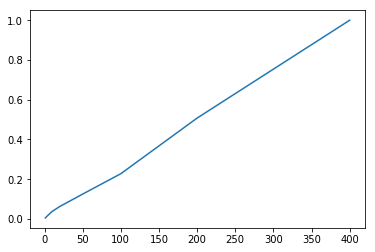

In [29]:
print(prec)
plt.plot(recalls, prec)

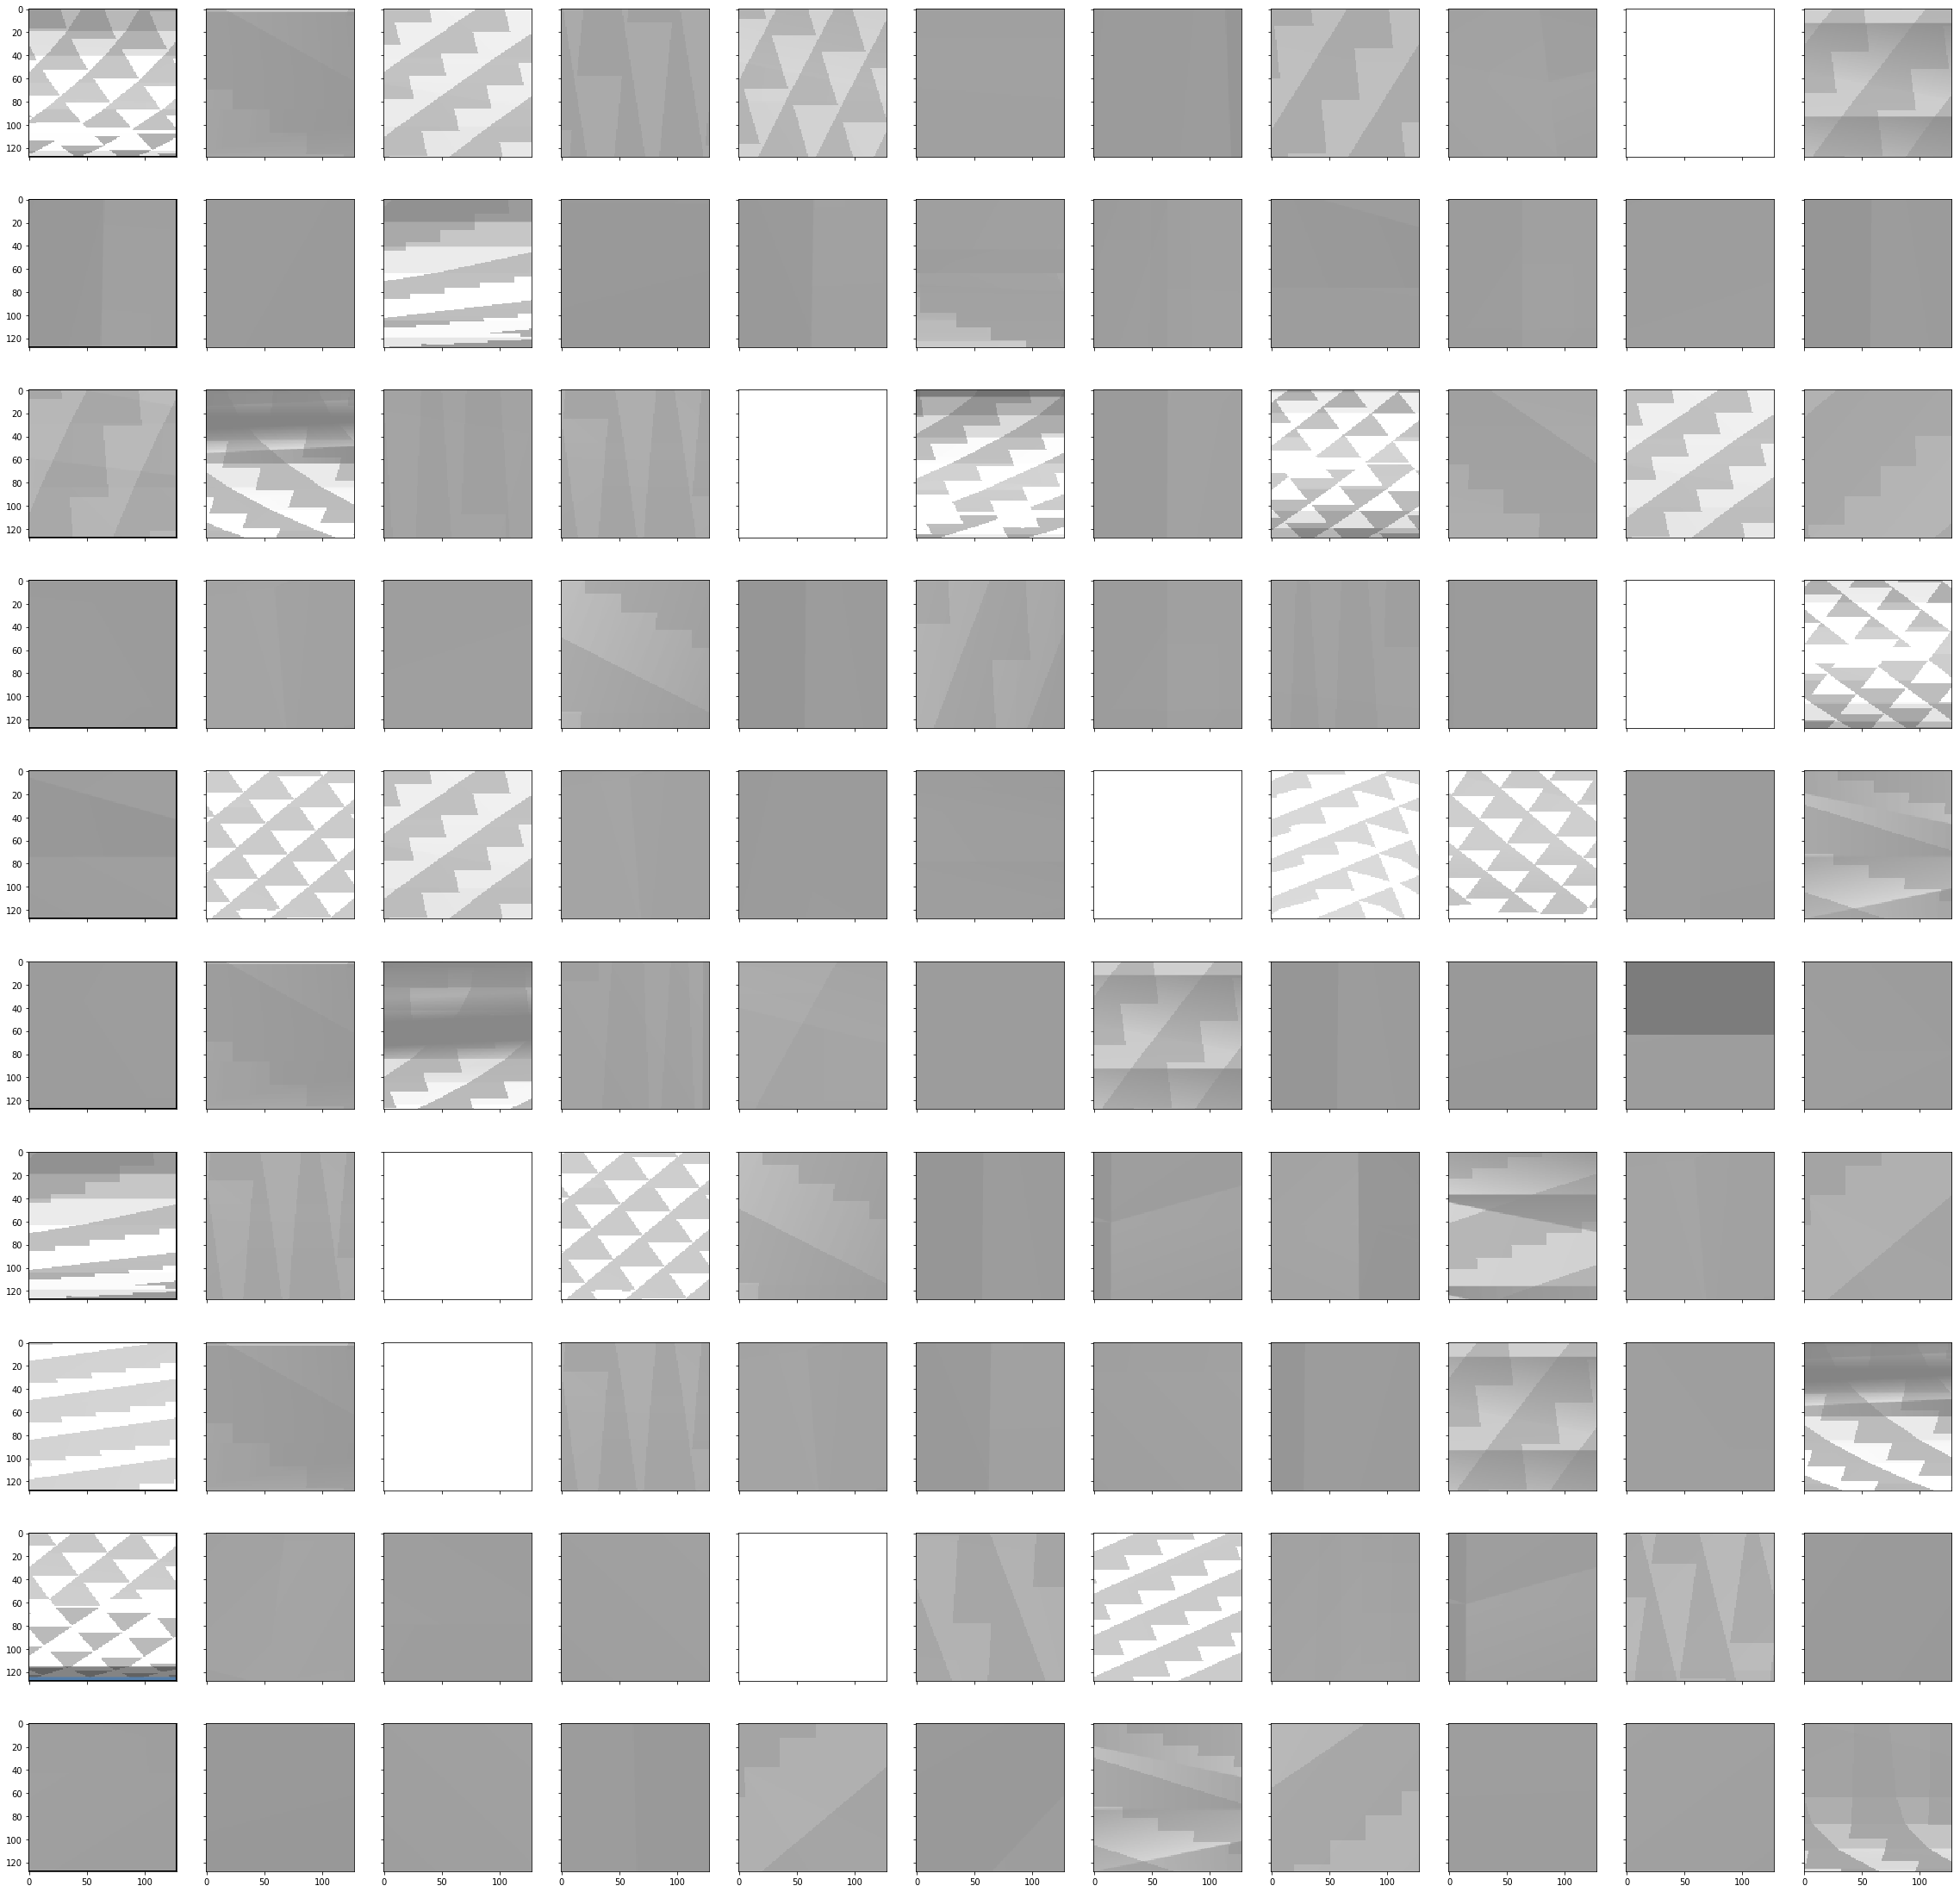

In [30]:
plot_nearest_neighbours(vis)

In [31]:
## step 0, split the indexes as belonging to object 1 or object 2
objects_classifiers = []
for i in range(len(chosen_inds_and_neighbors_inds)):
    obj1_inds, obj2_inds = list(), list()
    neighbour_list = chosen_inds_and_neighbors_inds[i][1:]
    for j in neighbour_list:
        if j // hyp.sensor_S == 1:
            obj2_inds.append(j)
        else:
            obj1_inds.append(j)
    full_list = [chosen_inds_and_neighbors_inds[i][0], obj1_inds, obj2_inds]
    objects_classifiers.append(full_list)

In [32]:
objects_classifiers

[[244, [128, 53, 17, 117], [203, 291, 213, 304, 313, 344]],
 [152, [64, 80, 41, 175, 89, 72, 58, 14], [263, 228]],
 [399, [102, 134, 110, 112], [273, 313, 312, 315, 286, 291]],
 [60, [194, 167, 14, 124, 72, 113, 69], [251, 289, 327]],
 [388, [163, 115, 114], [324, 291, 251, 271, 338, 330, 332]],
 [296, [150, 183, 136, 14, 80], [203, 372, 344, 367, 366]],
 [263, [167, 14, 130], [273, 307, 324, 241, 207, 310, 251]],
 [368, [41, 40, 20, 90, 102], [203, 287, 273, 251, 344]],
 [341, [126, 138, 51, 184, 9, 171], [371, 232, 253, 241]],
 [319, [80, 138, 199, 130, 154, 141, 139, 135], [332, 343]]]

## Visualization continued.

1. Now corresponding to 11 I know its world position, and I also know the world position of all the 10 nearest neighbours, I will load up the mesh corresponding to the object and draw bounding box in 3D for each of the nearest neighbors, then I can think about the projection stuff.

In [33]:
shapenet_dir = "/home/gauravp/trimmed_shapenet/03797390"

In [34]:
object1_name = all_results_for_object1['object_name']
object2_name = all_results_for_object2['object_name']
print('object1 name = {}'.format(object1_name))
print('object2 name = {}'.format(object2_name))

assert osp.exists(osp.join(shapenet_dir, object1_name[0]))
assert osp.exists(osp.join(shapenet_dir, object2_name[0]))

object1_model_path = shapenet_dir + '/' + str(object1_name[0]) + '/models/' + 'model_normalized.obj'
object2_model_path = shapenet_dir + '/' + str(object2_name[0]) + '/models/' + 'model_normalized.obj'

object1 name = ['6e884701bfddd1f71e1138649f4c219']
object2 name = ['6661c0b9b9b8450c4ee002d643e7b29e']


In [30]:
mesh_object1 = trimesh.load(object1_model_path)
scene_object1 = trimesh.Scene([mesh_object1])
mesh_object2 = trimesh.load(object2_model_path)
scene_object2 = trimesh.Scene([mesh_object2])

In [31]:
cups_transformations = [90, 0, 0]

In [32]:
mesh_object1.apply_transform(trimesh.transformations.euler_matrix(*np.deg2rad(cups_transformations)))
mesh_object2.apply_transform(trimesh.transformations.euler_matrix(*np.deg2rad(cups_transformations)))

In [33]:
# next I need to get the nearest neighbours world coordinates, I am already saving these so getting them should be pretty easy
object1_sensor_depth_centers_in_world = all_results_for_object1['sensor_depth_centers_in_world'].cpu().numpy().squeeze(1)
object2_sensor_depth_centers_in_world = all_results_for_object2['sensor_depth_centers_in_world'].cpu().numpy().squeeze(1)

In [34]:
print(object1_sensor_depth_centers_in_world.shape)
print(object2_sensor_depth_centers_in_world.shape)

(200, 3)
(200, 3)


In [35]:
# for those particular things I need to get the sensor depths
plot_list = []
for vis_inds in objects_classifiers:
    object_id = vis_inds[0]
    plot_dict = {}
    if object_id // 200 == 0:
        print('current object is object 1')
        plot_dict['object'] = 'object1'
        plot_dict['object_name'] = object1_name
        object1_true_location = object1_sensor_depth_centers_in_world[object_id]
        plot_dict['true_location'] = object1_true_location
        object1_locations = object1_sensor_depth_centers_in_world[vis_inds[1]]
        plot_dict['neighbour_locations_on_same_object'] = object1_locations
        object2_locations = object2_sensor_depth_centers_in_world[list(np.mod(vis_inds[2], 200))]
        plot_dict['neighbour_locations_on_other_object'] = object2_locations    
    elif object_id // 200 == 1:
        print('current object is object 2')
        plot_dict['object'] = 'object2'
        plot_dict['object_name'] = object2_name
        object2_true_location = object2_sensor_depth_centers_in_world[object_id % 200]
        plot_dict['true_location'] = object2_true_location
        object2_locations = object2_sensor_depth_centers_in_world[list(np.mod(vis_inds[2], 200))]
        plot_dict['neighbour_locations_on_same_object'] = object2_locations
        object1_locations = object1_sensor_depth_centers_in_world[vis_inds[1]]
        plot_dict['neighbour_locations_on_other_object'] = object1_locations
    plot_list.append(plot_dict)

current object is object 1
current object is object 1
current object is object 1
current object is object 2
current object is object 2
current object is object 2
current object is object 2
current object is object 1
current object is object 2
current object is object 1


In [36]:
plot_list

[{'object': 'object1',
  'object_name': ['e6dedae946ff5265a95fb60c110b25aa'],
  'true_location': array([0.01431, 0.21817, 0.156  ], dtype=float32),
  'neighbour_locations_on_same_object': array([[-0.02297,  0.24657, -0.14167],
         [-0.00228,  0.19835,  0.18868],
         [-0.03575,  0.21891, -0.1273 ],
         [ 0.01439,  0.1732 ,  0.18596],
         [ 0.01431,  0.21817,  0.156  ],
         [-0.03305,  0.16699, -0.169  ],
         [-0.03662,  0.21684, -0.14664]], dtype=float32),
  'neighbour_locations_on_other_object': array([[ 0.01239,  0.32123,  0.08758],
         [-0.01759,  0.29329, -0.13653],
         [-0.01714,  0.30573, -0.08927]], dtype=float32)},
 {'object': 'object1',
  'object_name': ['e6dedae946ff5265a95fb60c110b25aa'],
  'true_location': array([-0.02297,  0.24657, -0.14167], dtype=float32),
  'neighbour_locations_on_same_object': array([[-0.01639,  0.24219,  0.14488],
         [-0.03583,  0.23803, -0.10695],
         [-0.02865,  0.25047, -0.10722]], dtype=float32),
 

In [37]:
# save this plot list and plot it on xian's computer
save_path = "/home/gauravp/pytorch_disco/touch_nearest_neighbour_results_on_val_data.npy"
np.save(save_path, plot_list)

In [39]:
a = np.load(save_path, allow_pickle=True)
print(len(a))

10
